# Table of Contents

* [Profie](#Profie)
* [Introduction](#Introduction)
  * [Import and Install Necessary Libraries](#Import-and-Install-Necessary-Libraries)
  * [Loading-the-Data](#Loading-the-Data)
* [Exploratory Data Analysis](#Exploratory-Data-Analysis)
  * [Target Variable](#Target-Variable)
  * [Sweetviz](#Sweetviz)
  * [CategoricalAgainst the Target Variable](#Categorical-Against-the-Target-Variable)
  * [Correlation](#Correlation)
* [Feature Engineering](#Feature-Engineering)
  * [Missing values](#Missing-values)
  * [Prepare the Data and Create New Features](#Prepare-the-Data-and-Create-New-Features)
* [Modeling](#Modeling)
  * [Pick an Estimator](#Pick-an-Estimator)
  * [Polynomial Degree](#Polynomial-Degree)
  * [Feature Selection](#Feature-Selection)
  * [Hyper-parameter Analysis](#Hyper-parameter-Analysis)
    * [Learning Rate](#Learning-Rate)
    * [Max Iterations](#Max-Iterations)
    * [Regularization Term](#Regularization-Term)
* [Prediction](#Prediction)
* [Submission](#Submission)
* [Summary](#Summary)
* [References](#References)

# Profie

Author: Nisan Dalva  
[Kaggle](https://www.kaggle.com/nisandalva)

# Introduction

![image](https://user-images.githubusercontent.com/32777579/102567660-a2a24300-40ea-11eb-9cd0-c165454c94d0.png)



In this competition we'll try to predict the price of houses at Ames, Iowa.  
With 80 explanatory variables describing a lot about the house.  
So at first we'll try to find out which variables are probably helpful to predict the price only with EDA.  
After that, we'll do some feature engineering to get the most of our dataset.  
To build our model, we'll try some familiar algorithms like **SGD**, **Linear Regression**, **Lasso**, **Ridge** and **Gradient Boosting Regression**, and try to play with their hyper-parameters. We'll use also feature selection algorithm based on ```sklearn``` (**RFE**).

## Import and Install Necessary Libraries

Update plotly version and install new package ```sweetviz``` to visualize datasets.

In [2]:
!pip install --upgrade plotly
!pip install sweetviz
!pip install -U scikit-learn

     |████████████████████████████████| 13.2MB 323kB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1
     |████████████████████████████████| 15.1MB 340kB/s 
     |████████████████████████████████| 81kB 8.9MB/s 
  Found existing installation: tqdm 4.41.1
    Uninstalling tqdm-4.41.1:
      Successfully uninstalled tqdm-4.41.1
     |████████████████████████████████| 22.2MB 1.4MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [3]:
# import numpy, matplotlib, etc.
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from scipy.stats import norm
import math
from tqdm.auto import tqdm
import sweetviz as sw

# sklearn imports
import sklearn
from sklearn import set_config
from sklearn import metrics
from sklearn.metrics import mean_squared_error

from sklearn import linear_model
from sklearn.linear_model import LinearRegression, SGDRegressor, Lasso, ElasticNet, Ridge

from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.preprocessing import PolynomialFeatures

from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import RFE
from sklearn.ensemble import GradientBoostingRegressor


## Loading the Data

In [4]:
!wget https://gist.githubusercontent.com/NisanDalva/7d86471c4af68d1b5a1cc87effe853f7/raw/b617a2e0ee4e9220d094424c142fcf86e8147245/train_house_df.csv #train set
!wget https://gist.githubusercontent.com/NisanDalva/37eb2b754cfbeb5df1ca7a0c413beb05/raw/fa930e97152ed33a031f1e29714f0438e2f3a645/test_house_df.csv #test set
house_df = pd.read_csv('train_house_df.csv')
house_df_test = pd.read_csv('test_house_df.csv')

display(house_df.head())
print(house_df.shape)
display(house_df_test.head())
print(house_df_test.shape)

--2021-02-14 18:45:10--  https://gist.githubusercontent.com/NisanDalva/7d86471c4af68d1b5a1cc87effe853f7/raw/b617a2e0ee4e9220d094424c142fcf86e8147245/train_house_df.csv
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 460676 (450K) [text/plain]
Saving to: ‘train_house_df.csv’

train_house_df.csv  100%[===================>] 449.88K  --.-KB/s    in 0.08s   

2021-02-14 18:45:10 (5.74 MB/s) - ‘train_house_df.csv’ saved [460676/460676]

--2021-02-14 18:45:11--  https://gist.githubusercontent.com/NisanDalva/37eb2b754cfbeb5df1ca7a0c413beb05/raw/fa930e97152ed33a031f1e29714f0438e2f3a645/test_house_df.csv
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to gist.githubusercontent.c

Id  MSSubClass MSZoning  ...  SaleType  SaleCondition SalePrice
0   1          60       RL  ...        WD         Normal    208500
1   2          20       RL  ...        WD         Normal    181500
2   3          60       RL  ...        WD         Normal    223500
3   4          70       RL  ...        WD        Abnorml    140000
4   5          60       RL  ...        WD         Normal    250000

[5 rows x 81 columns]

(1460, 81)


Id  MSSubClass MSZoning  ...  YrSold  SaleType SaleCondition
0  1461          20       RH  ...    2010        WD        Normal
1  1462          20       RL  ...    2010        WD        Normal
2  1463          60       RL  ...    2010        WD        Normal
3  1464          60       RL  ...    2010        WD        Normal
4  1465         120       RL  ...    2010        WD        Normal

[5 rows x 80 columns]

(1459, 80)


As we can see we have 1460 samples on the train set and 1459 on the test set.   
for explore the data, we use the ```house_df``` (which is the train set).

NOTE: To impute the missing values we'll use the ```all_df``` (which is the train and test sets combained).  

# Exploratory Data Analysis

Let's see some information about:

In [5]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

So we have 80 features of different types - ```float64```, ```int64``` and ```object```.  
We also have a lot of missing values, we will see later how they can be filled so that we will achieve a better result.

Some statistics of the data.

In [6]:
print('For types of `int64 or `float64`:')
display(house_df.describe().T)

display(house_df.describe(include='object').T)

For types of `int64 or `float64`:


count           mean  ...        75%       max
Id             1460.0     730.500000  ...    1095.25    1460.0
MSSubClass     1460.0      56.897260  ...      70.00     190.0
LotFrontage    1201.0      70.049958  ...      80.00     313.0
LotArea        1460.0   10516.828082  ...   11601.50  215245.0
OverallQual    1460.0       6.099315  ...       7.00      10.0
OverallCond    1460.0       5.575342  ...       6.00       9.0
YearBuilt      1460.0    1971.267808  ...    2000.00    2010.0
YearRemodAdd   1460.0    1984.865753  ...    2004.00    2010.0
MasVnrArea     1452.0     103.685262  ...     166.00    1600.0
BsmtFinSF1     1460.0     443.639726  ...     712.25    5644.0
BsmtFinSF2     1460.0      46.549315  ...       0.00    1474.0
BsmtUnfSF      1460.0     567.240411  ...     808.00    2336.0
TotalBsmtSF    1460.0    1057.429452  ...    1298.25    6110.0
1stFlrSF       1460.0    1162.626712  ...    1391.25    4692.0
2ndFlrSF       1460.0     346.992466  ...     728.00    2065.0
LowQualFinSF   1460.0       5.844521  ...       0.00     572.0
GrLivArea      1460.0    1515.463699  ...    1776.75    5642.0
BsmtFullBath   1460.0       0.425342  ...       1.00       3.0
BsmtHalfBath   1460.0       0.057534  ...       0.00       2.0
FullBath       1460.0       1.565068  ...       2.00       3.0
HalfBath       1460.0       0.382877  ...       1.00       2.0
BedroomAbvGr   1460.0       2.866438  ...       3.00       8.0
KitchenAbvGr   1460.0       1.046575  ...       1.00       3.0
TotRmsAbvGrd   1460.0       6.517808  ...       7.00      14.0
Fireplaces     1460.0       0.613014  ...       1.00       3.0
GarageYrBlt    1379.0    1978.506164  ...    2002.00    2010.0
GarageCars     1460.0       1.767123  ...       2.00       4.0
GarageArea     1460.0     472.980137  ...     576.00    1418.0
WoodDeckSF     1460.0      94.244521  ...     168.00     857.0
OpenPorchSF    1460.0      46.660274  ...      68.00     547.0
EnclosedPorch  1460.0      21.954110  ...       0.00     552.0
3SsnPorch      1460.0       3.409589  ...       0.00     508.0
ScreenPorch    1460.0      15.060959  ...       0.00     480.0
PoolArea       1460.0       2.758904  ...       0.00     738.0
MiscVal        1460.0      43.489041  ...       0.00   15500.0
MoSold         1460.0       6.321918  ...       8.00      12.0
YrSold         1460.0    2007.815753  ...    2009.00    2010.0
SalePrice      1460.0  180921.195890  ...  214000.00  755000.0

[38 rows x 8 columns]

count unique      top  freq
MSZoning       1460      5       RL  1151
Street         1460      2     Pave  1454
Alley            91      2     Grvl    50
LotShape       1460      4      Reg   925
LandContour    1460      4      Lvl  1311
Utilities      1460      2   AllPub  1459
LotConfig      1460      5   Inside  1052
LandSlope      1460      3      Gtl  1382
Neighborhood   1460     25    NAmes   225
Condition1     1460      9     Norm  1260
Condition2     1460      8     Norm  1445
BldgType       1460      5     1Fam  1220
HouseStyle     1460      8   1Story   726
RoofStyle      1460      6    Gable  1141
RoofMatl       1460      8  CompShg  1434
Exterior1st    1460     15  VinylSd   515
Exterior2nd    1460     16  VinylSd   504
MasVnrType     1452      4     None   864
ExterQual      1460      4       TA   906
ExterCond      1460      5       TA  1282
Foundation     1460      6    PConc   647
BsmtQual       1423      4       TA   649
BsmtCond       1423      4       TA  1311
BsmtExposure   1422      4       No   953
BsmtFinType1   1423      6      Unf   430
BsmtFinType2   1422      6      Unf  1256
Heating        1460      6     GasA  1428
HeatingQC      1460      5       Ex   741
CentralAir     1460      2        Y  1365
Electrical     1459      5    SBrkr  1334
KitchenQual    1460      4       TA   735
Functional     1460      7      Typ  1360
FireplaceQu     770      5       Gd   380
GarageType     1379      6   Attchd   870
GarageFinish   1379      3      Unf   605
GarageQual     1379      5       TA  1311
GarageCond     1379      5       TA  1326
PavedDrive     1460      3        Y  1340
PoolQC            7      3       Gd     3
Fence           281      4    MnPrv   157
MiscFeature      54      4     Shed    49
SaleType       1460      9       WD  1267
SaleCondition  1460      6   Normal  1198

Get the numerical and categorical features.

In [7]:
def determine_dtypes(df):
  num_cols = df.select_dtypes(include=[np.int64, np.float64]).columns
  cat_cols = df.select_dtypes(include=['object', 'bool']).columns
  return num_cols, cat_cols

## Target Variable

Let's take a look on the terget variable ```SalePrice ```.

In [8]:
# Get the fitted parameters used by the function norm
mu, sigma = norm.fit(house_df['SalePrice'])

fig = px.histogram(data_frame=house_df, x='SalePrice')
fig.update_layout(
    title_text=f'SalePrice distribution - mu= {mu:.3f}, sigma= {sigma:.3f}',
    xaxis_title_text='SalePrice',
    yaxis_title_text='Count',
    bargap=0.2, # gap between bars of adjacent location coordinates
)
fig.show()

We can see the most common price is between 140,000 and 149,999 dollars.

## Sweetviz

Since we have a lot of features, let's use ```sweetviz``` to summarize all our data.

                                             |          | [  0%]   00:00 -> (? left)


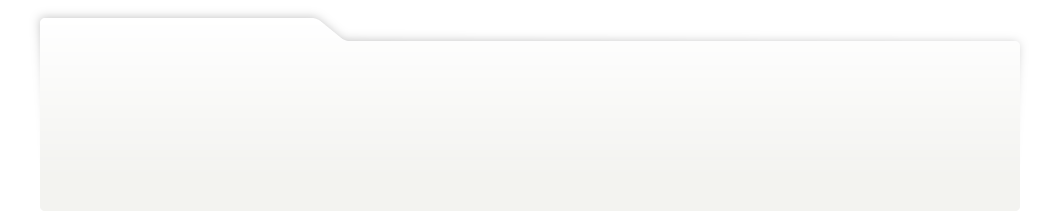
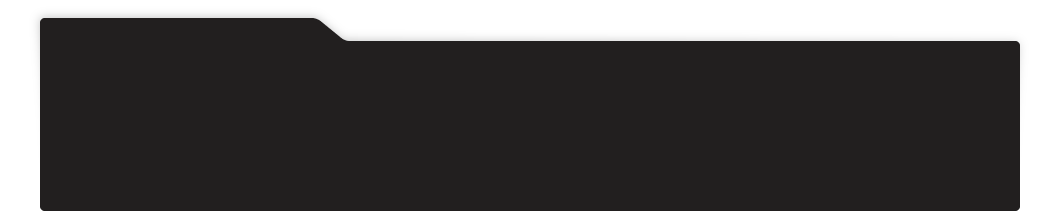
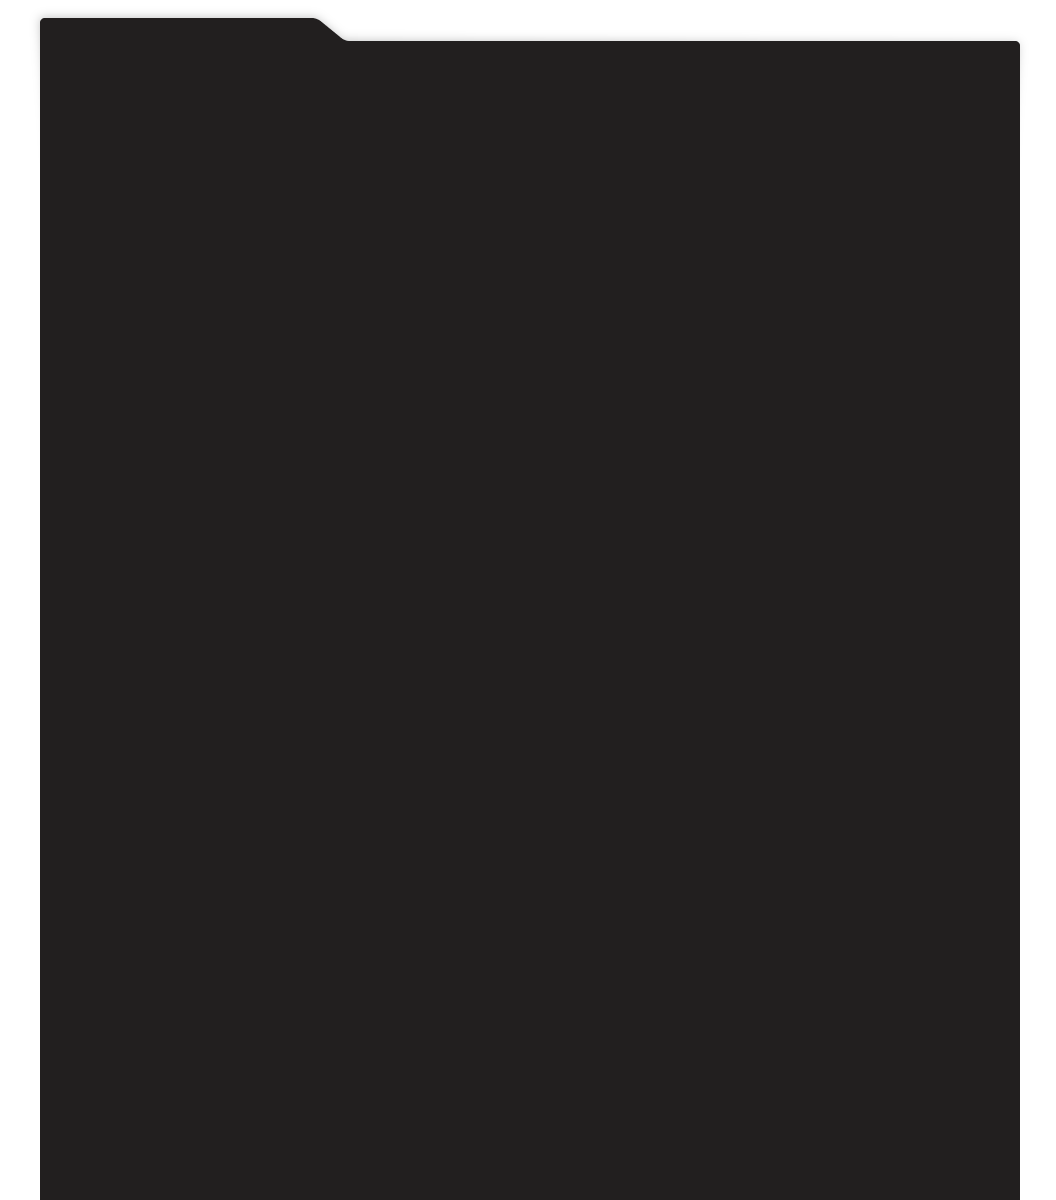
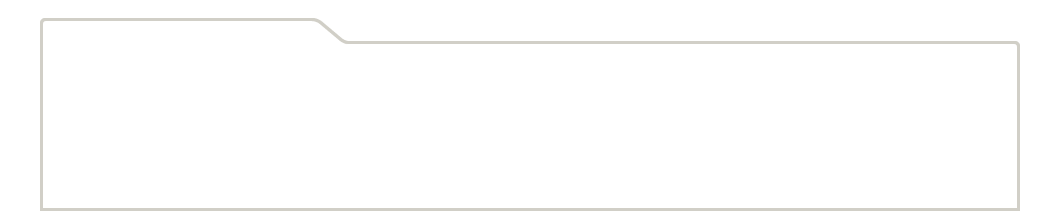
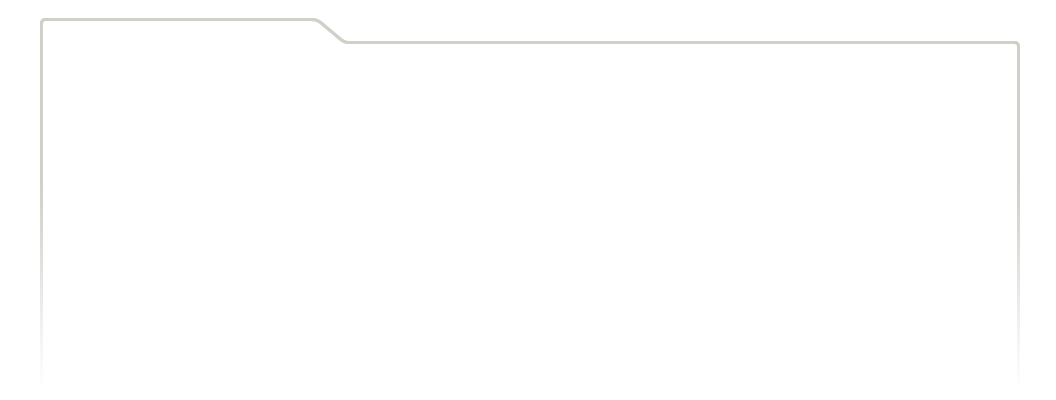
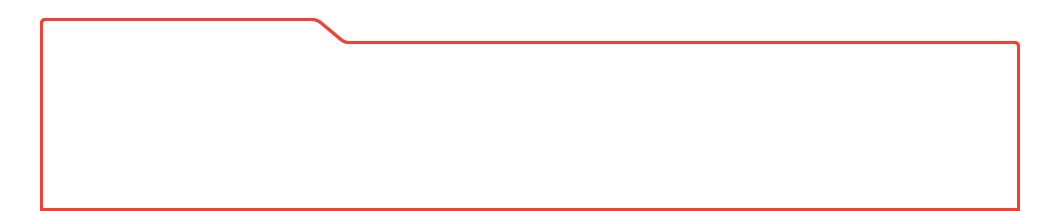
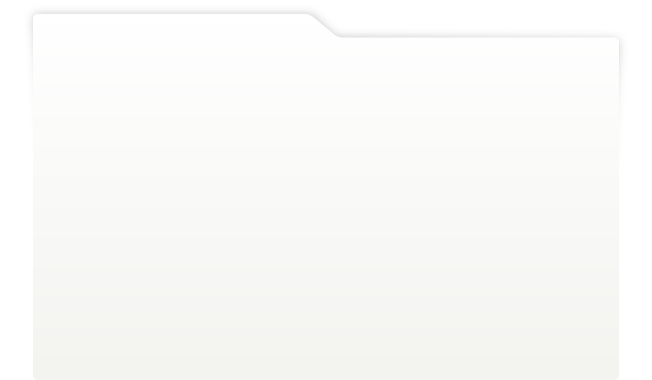
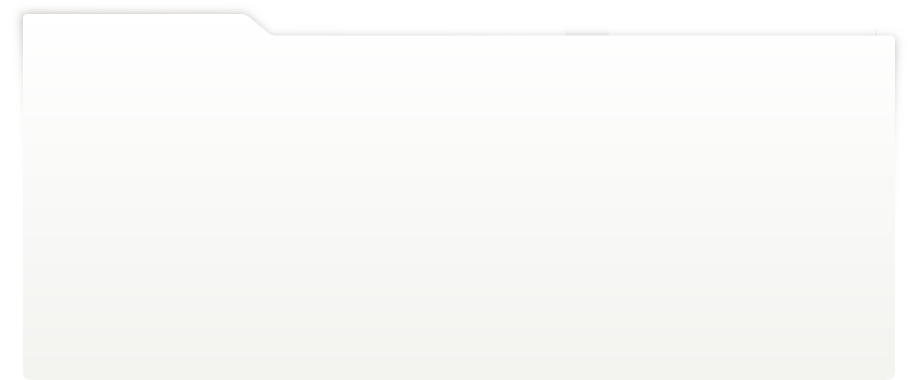
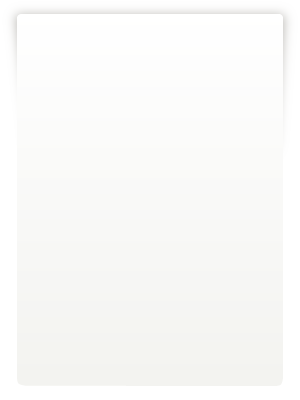
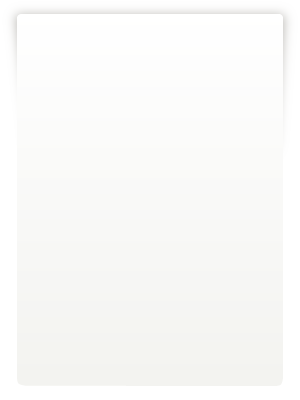
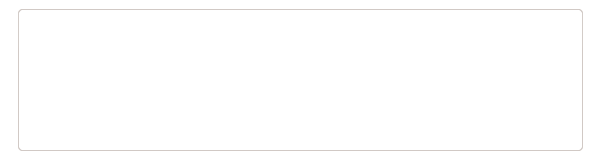
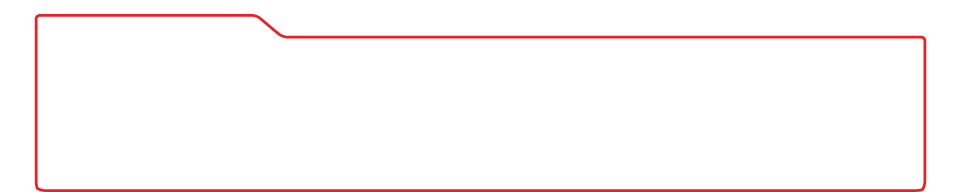
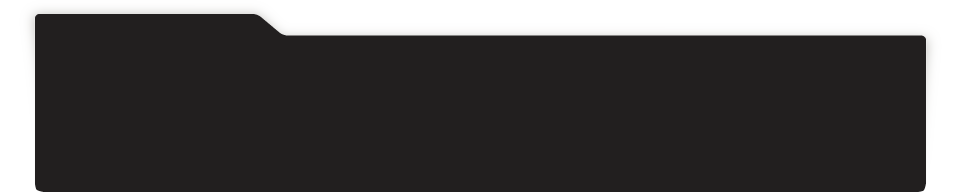
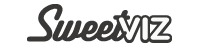
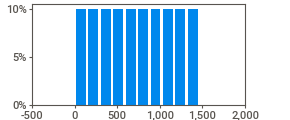
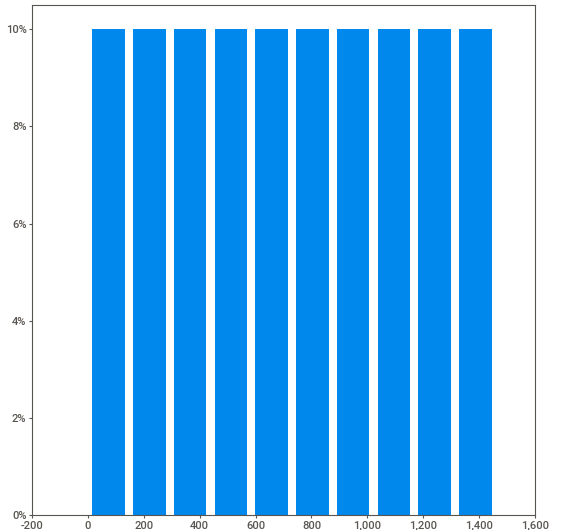
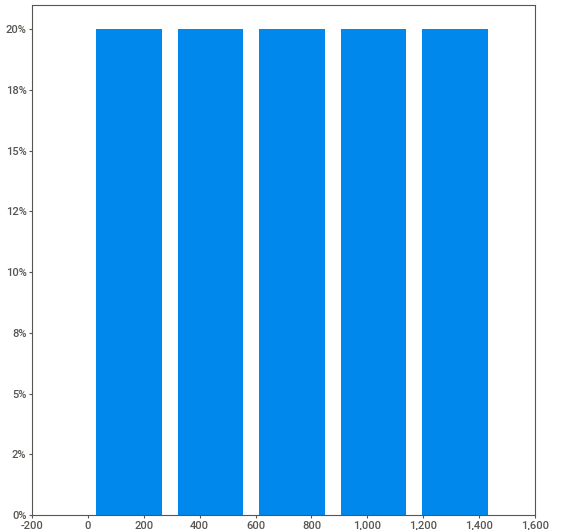
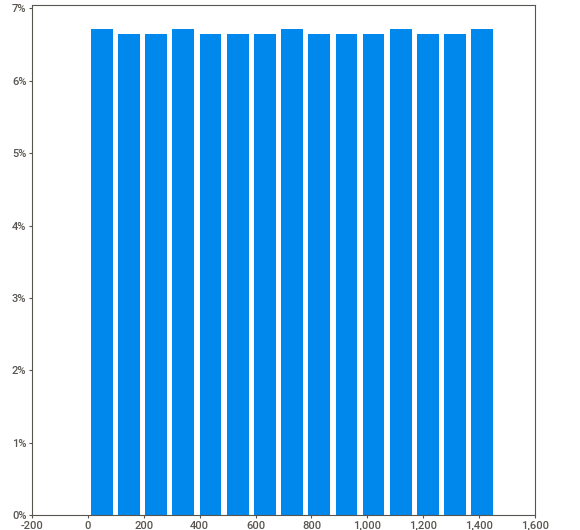
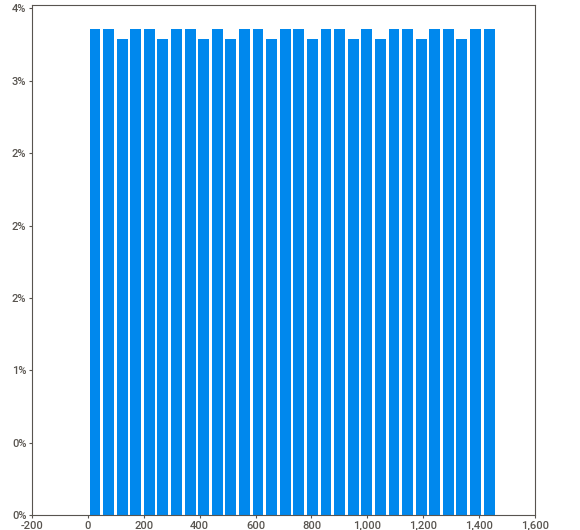
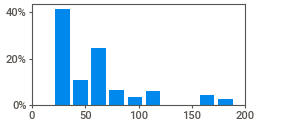
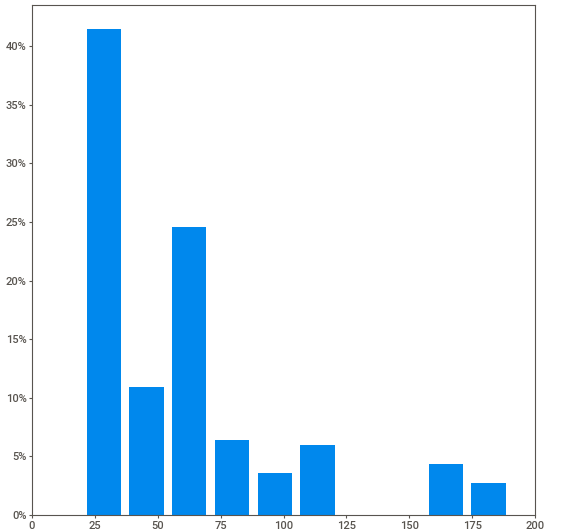
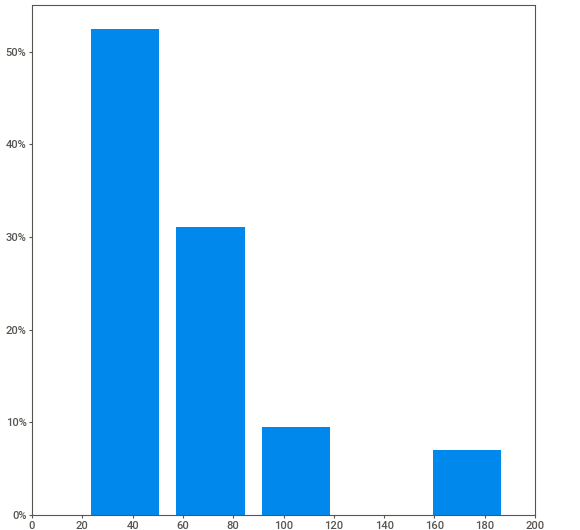
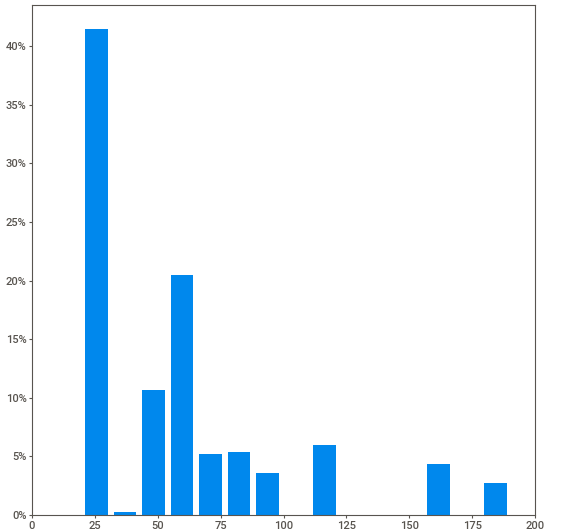
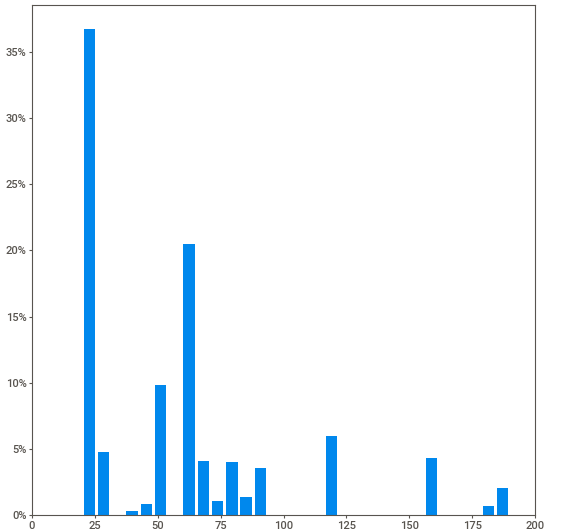
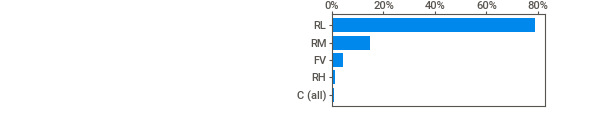
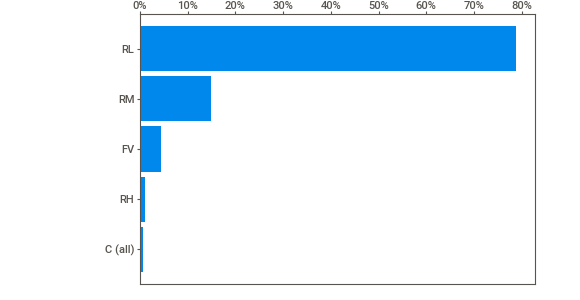
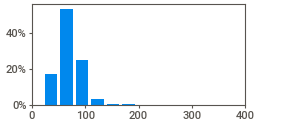
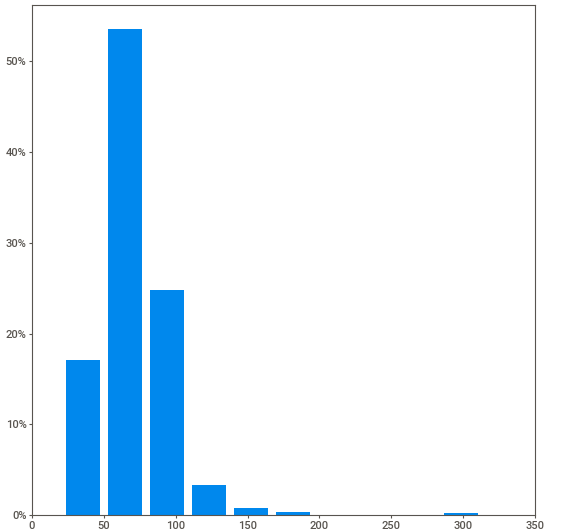
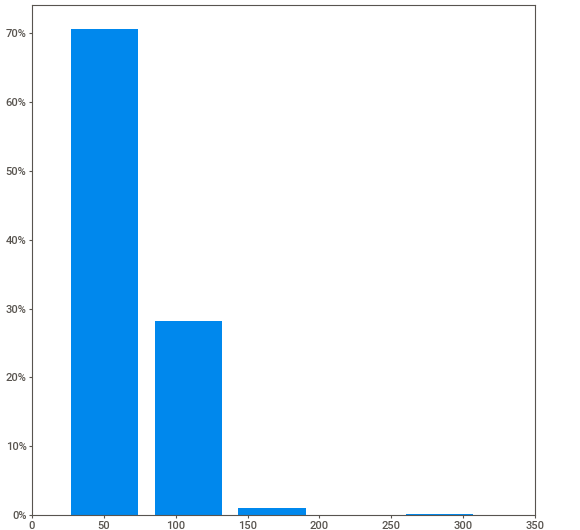
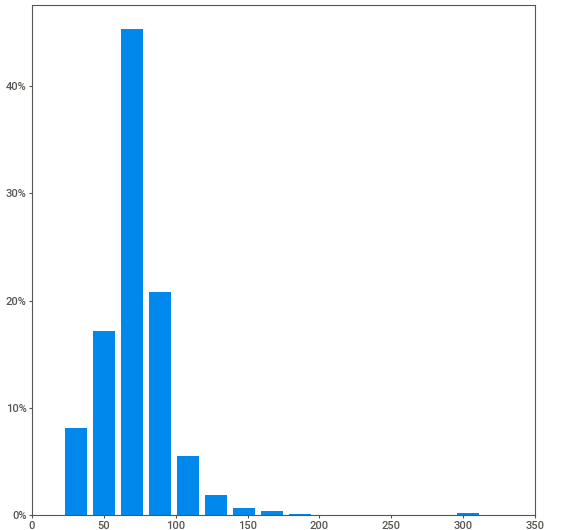
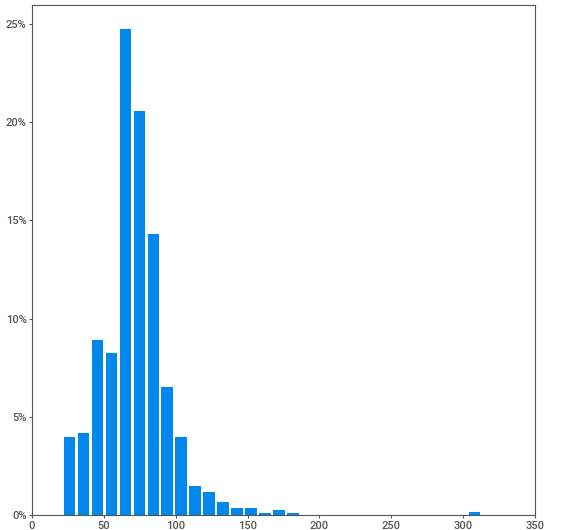
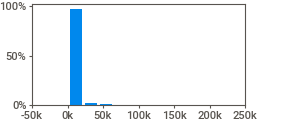
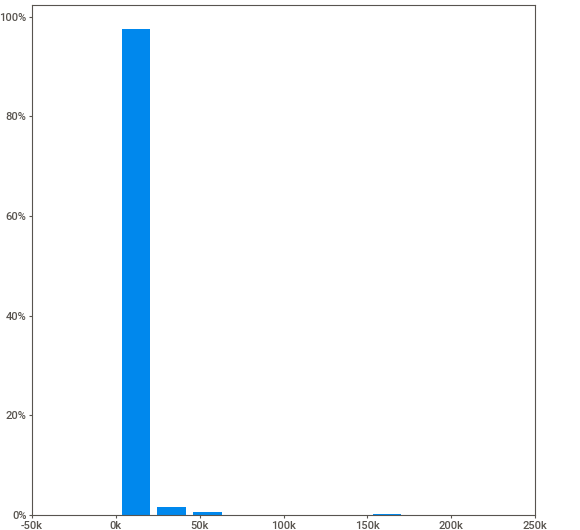
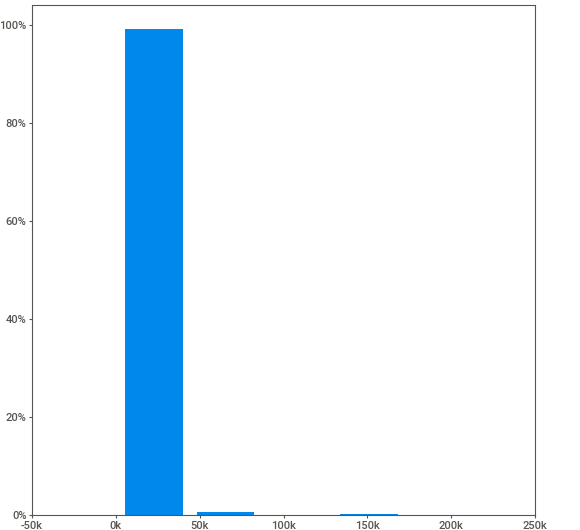
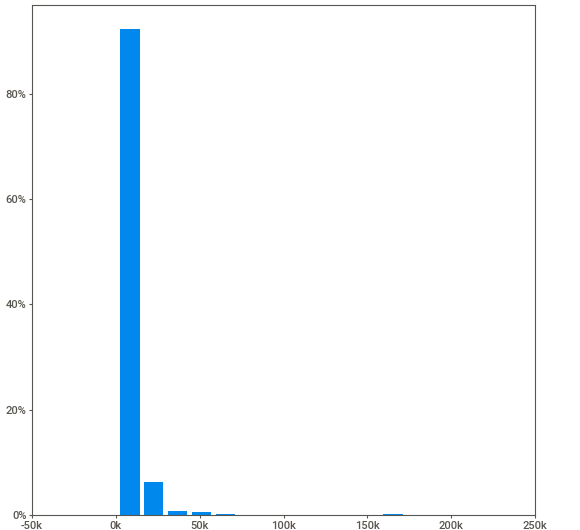
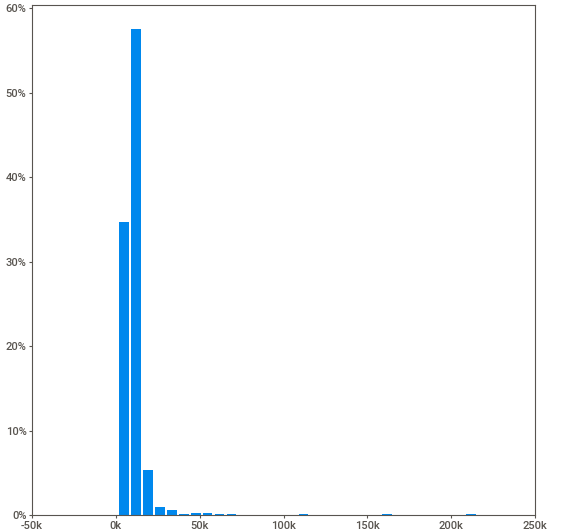
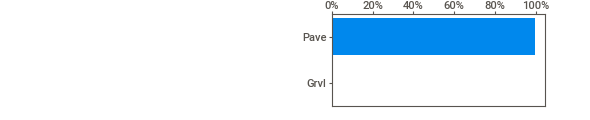
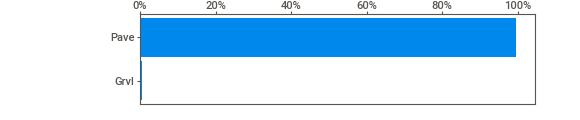
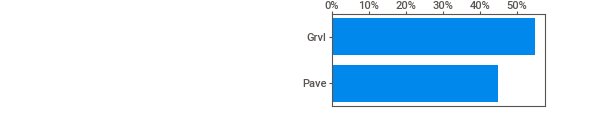
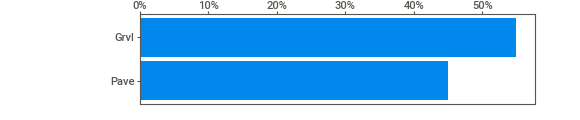
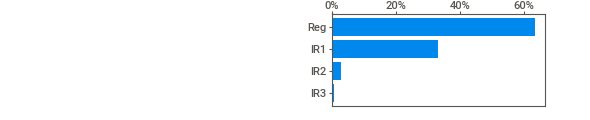
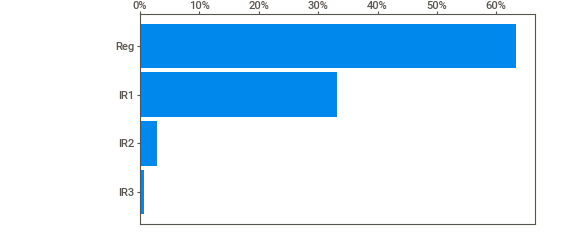
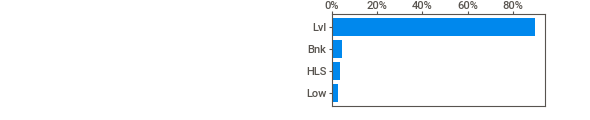
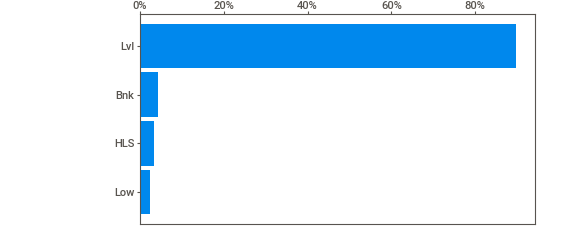
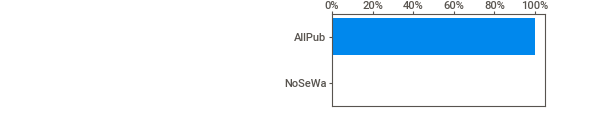
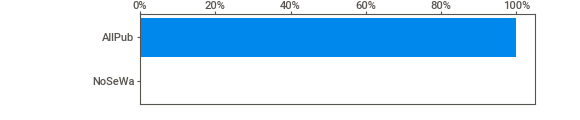
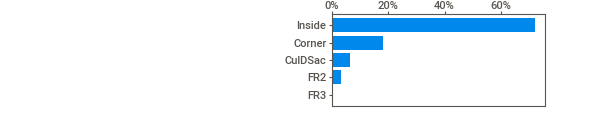
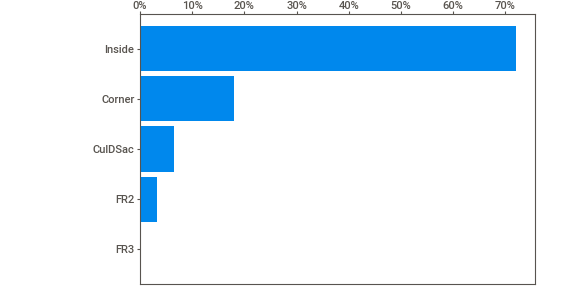
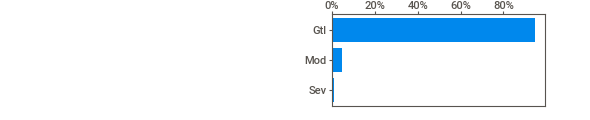
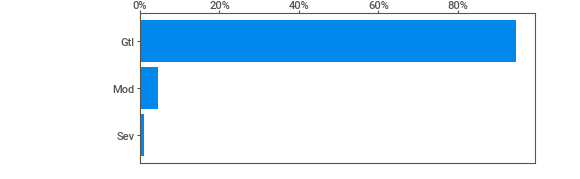
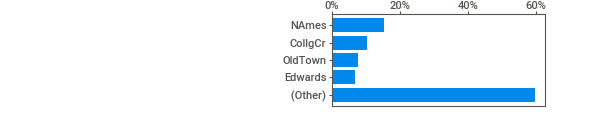
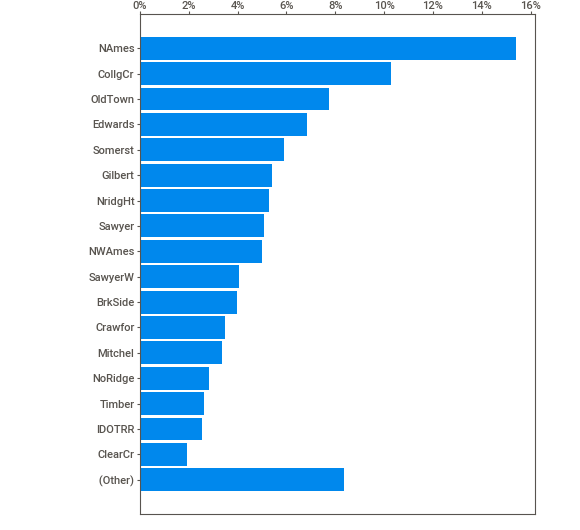
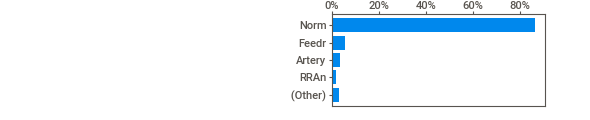
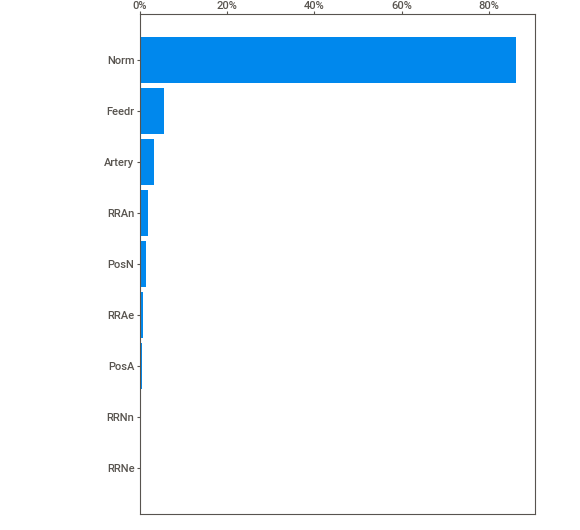
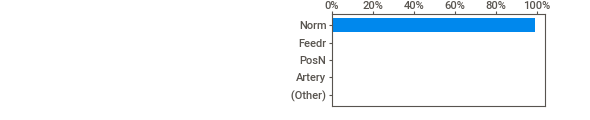
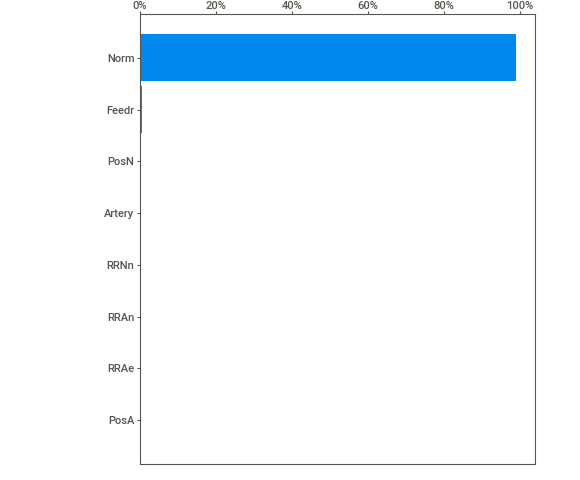
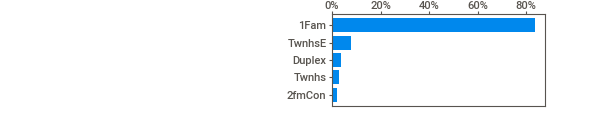
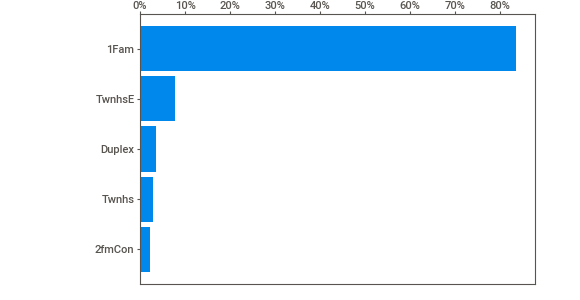
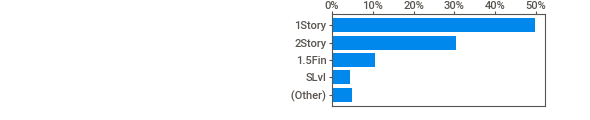
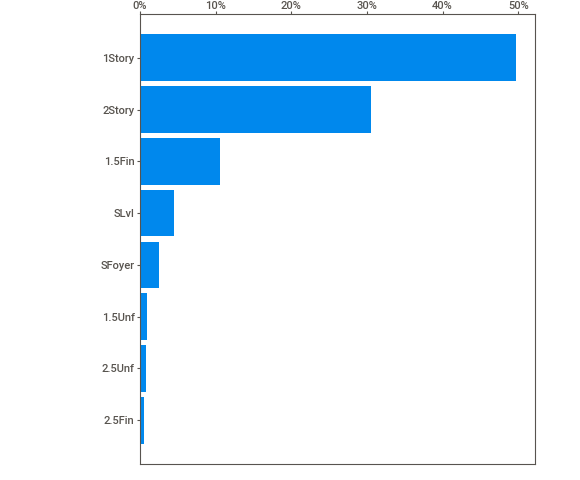
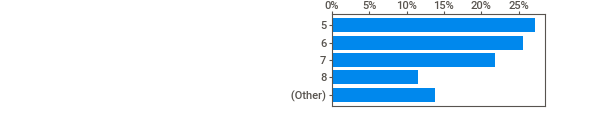
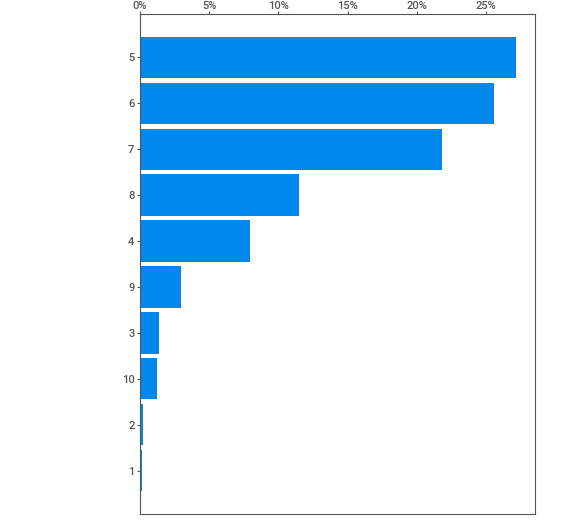
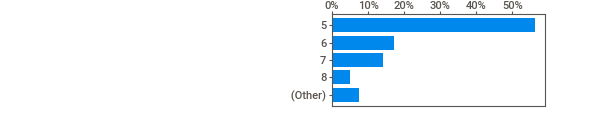
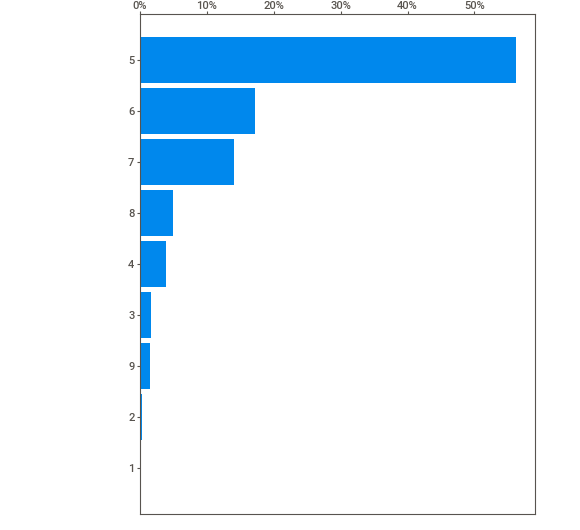
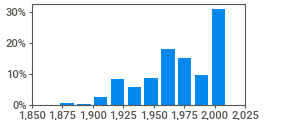
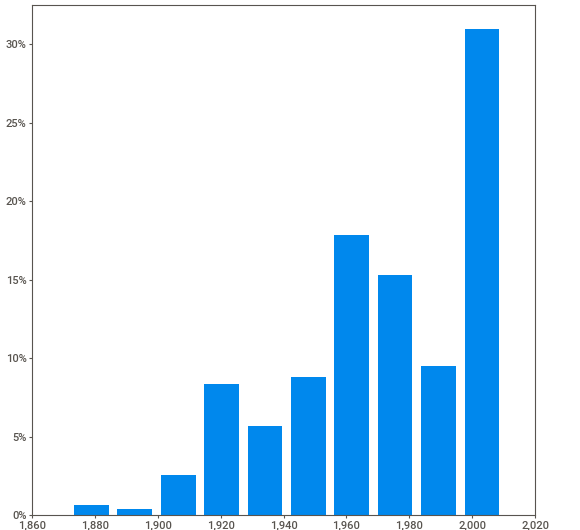
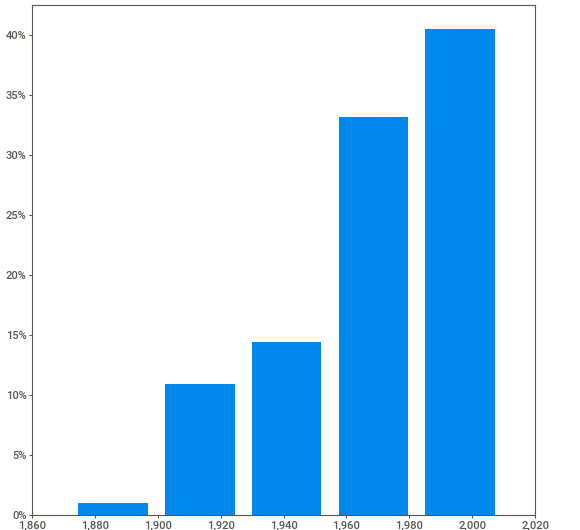
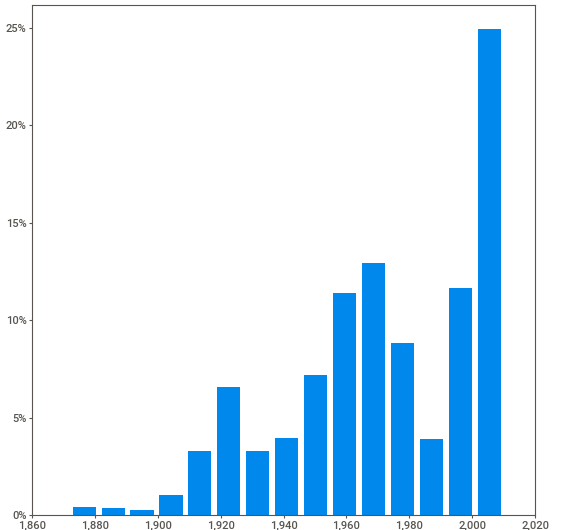
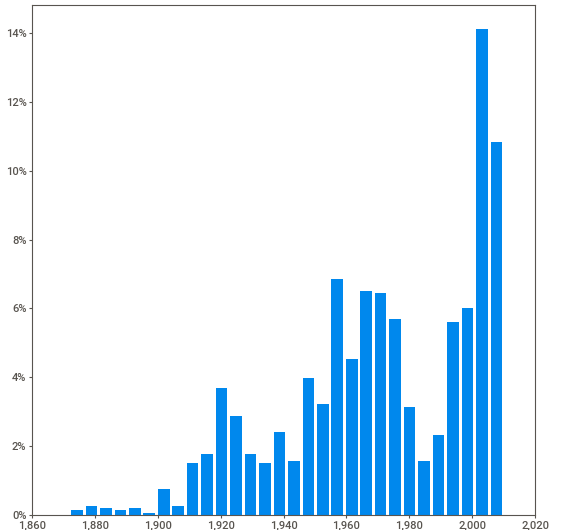
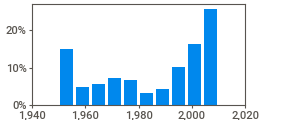
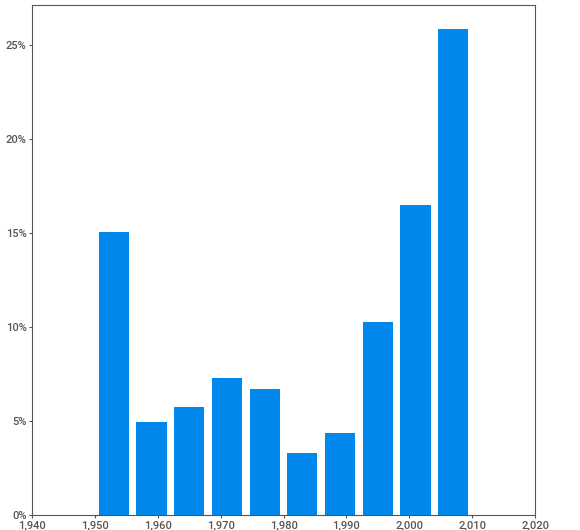
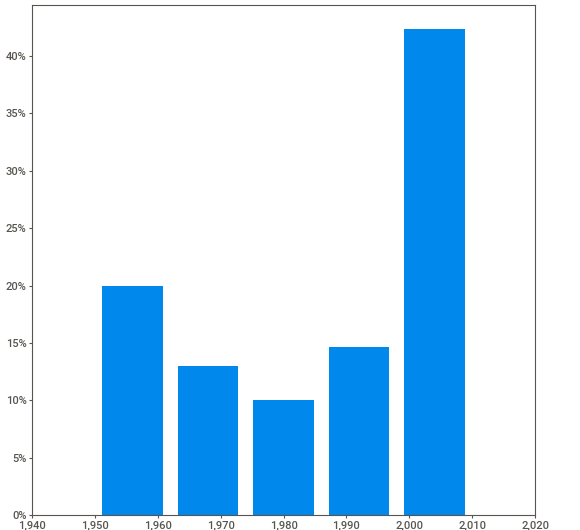
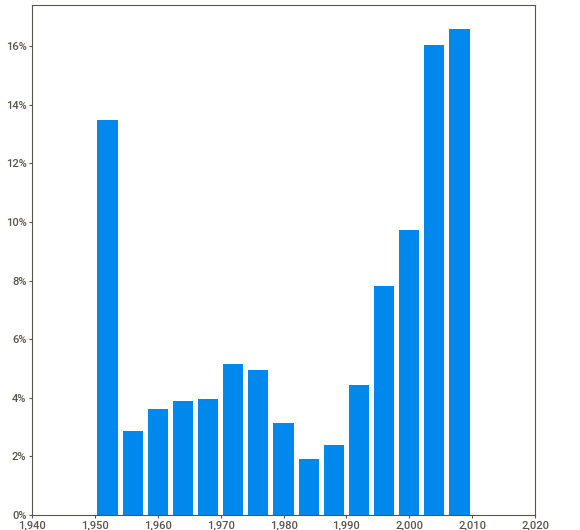
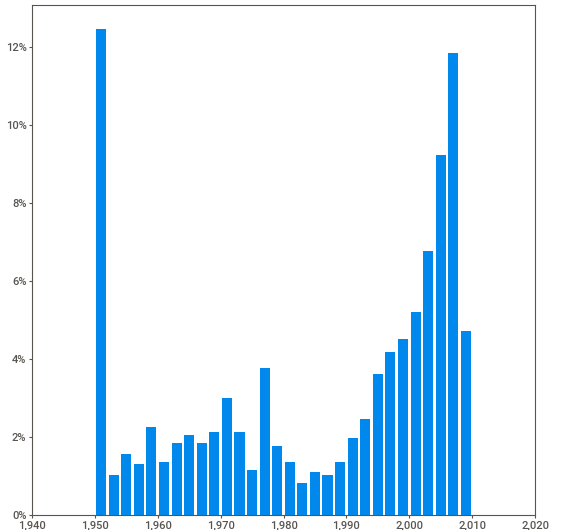
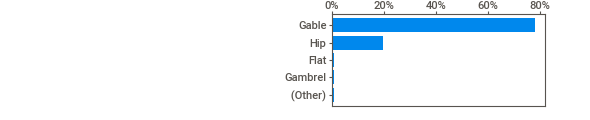
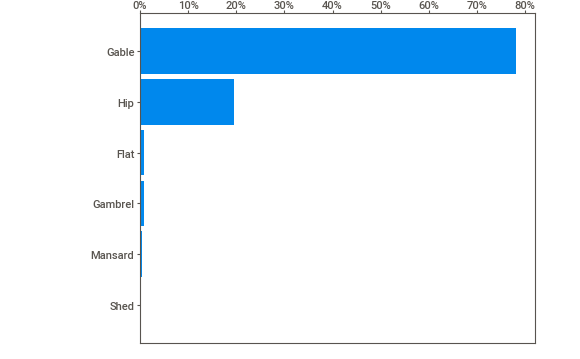
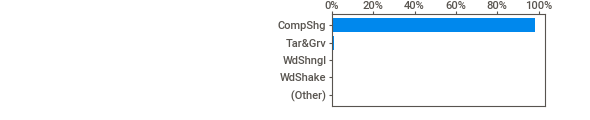
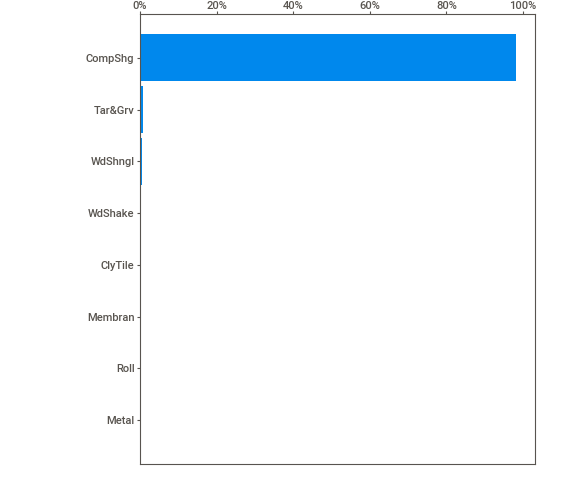
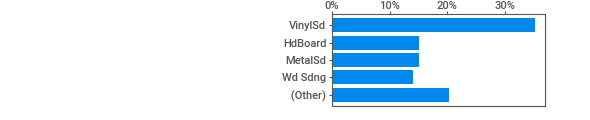
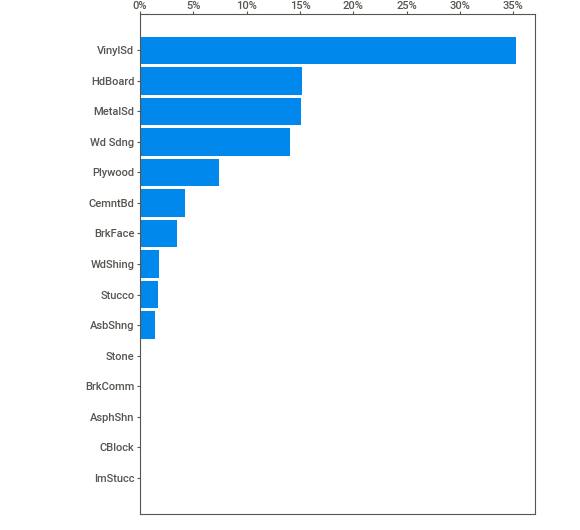
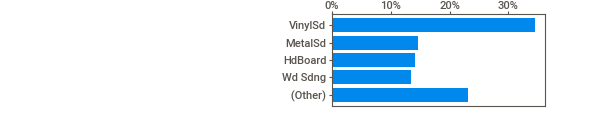
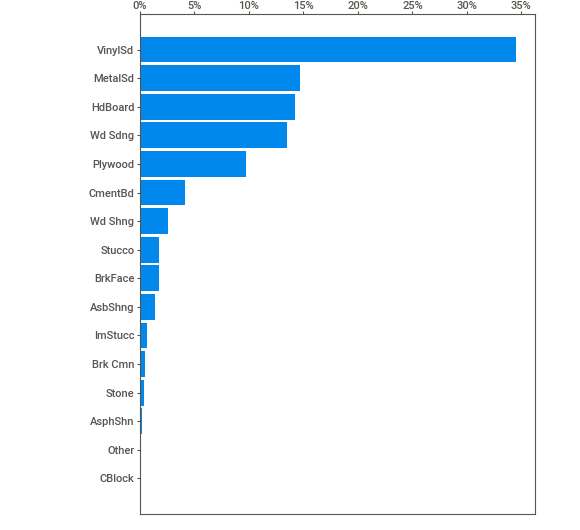
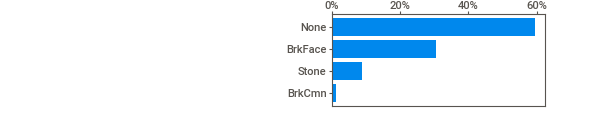
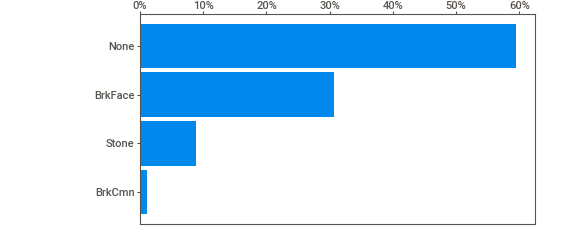
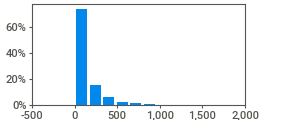
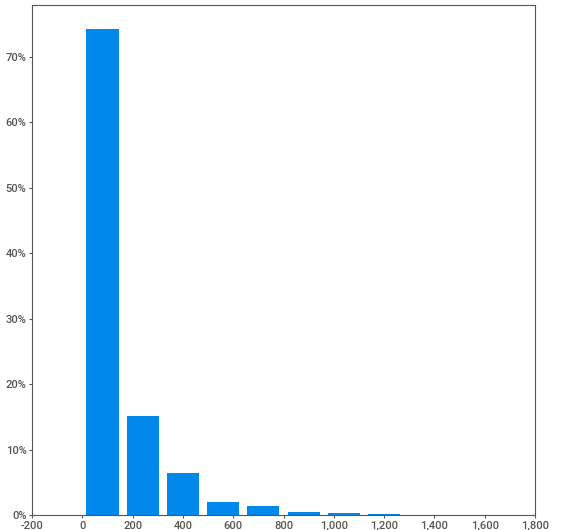
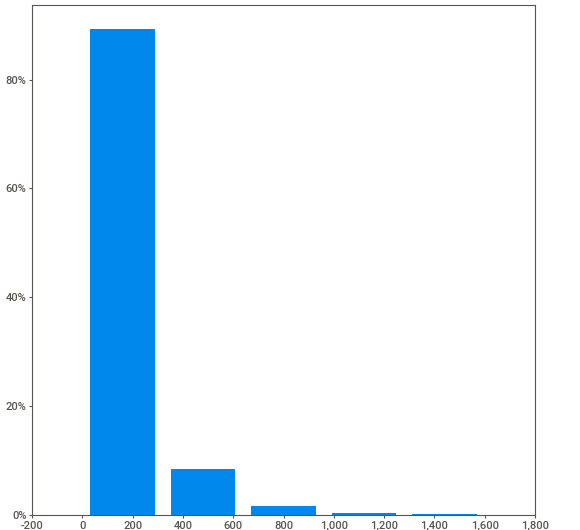
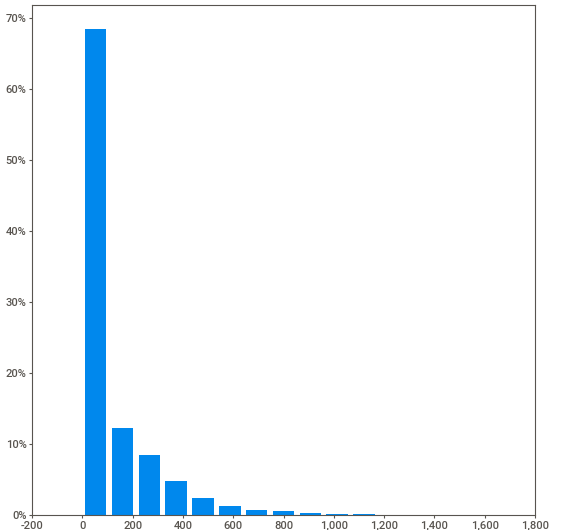
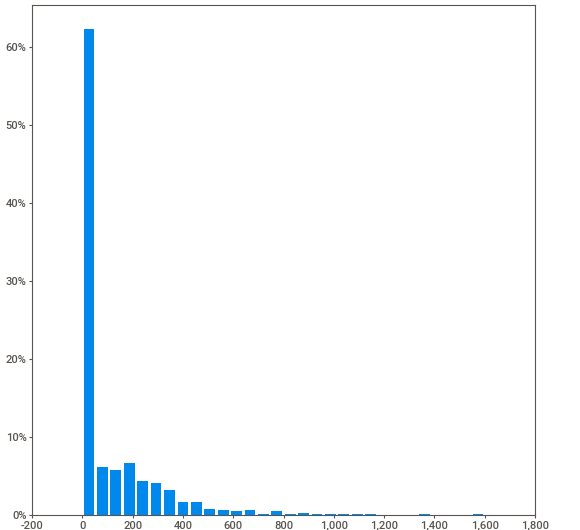
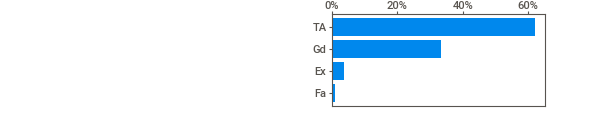
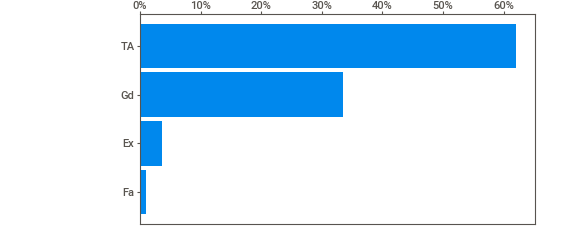
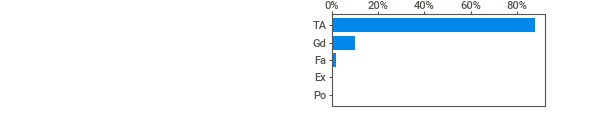
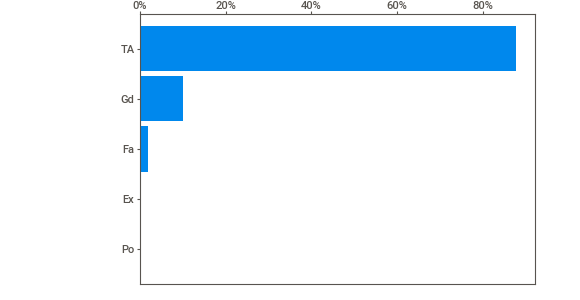
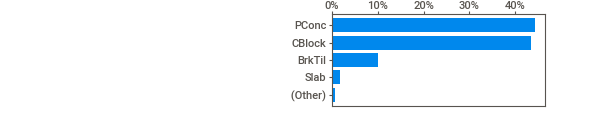
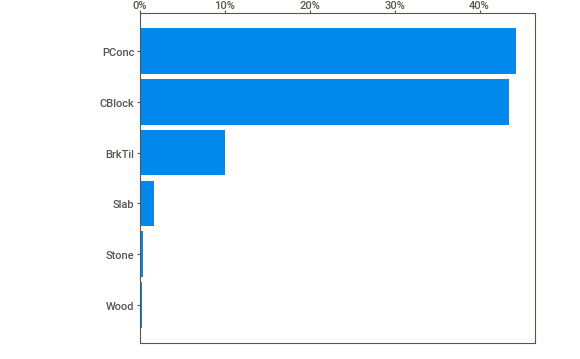
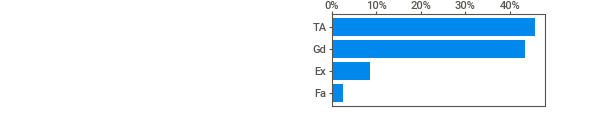
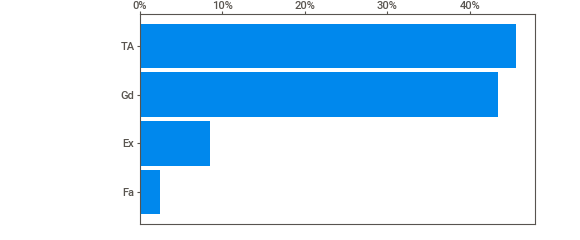
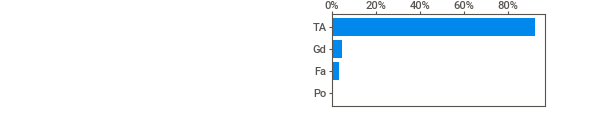
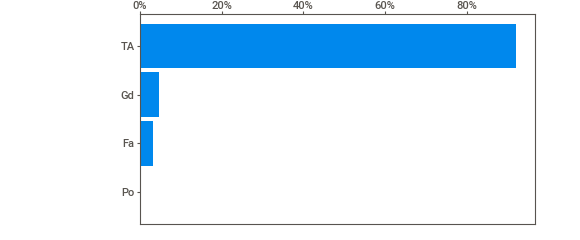
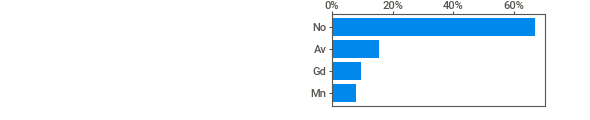
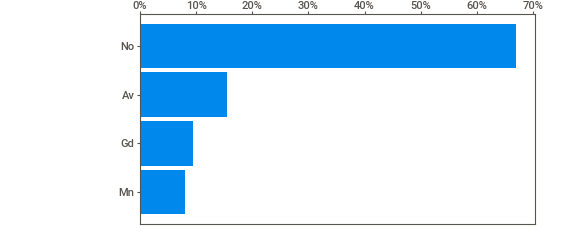
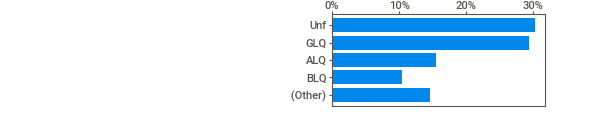
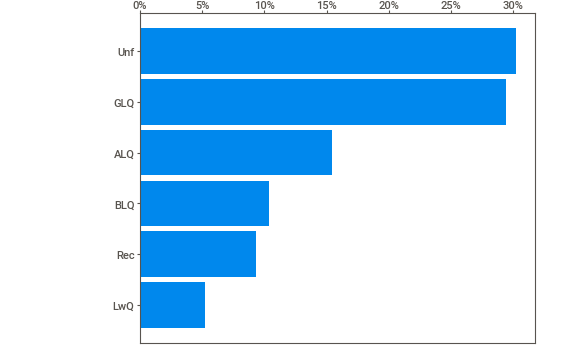
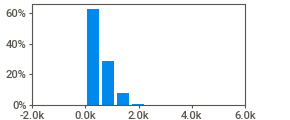
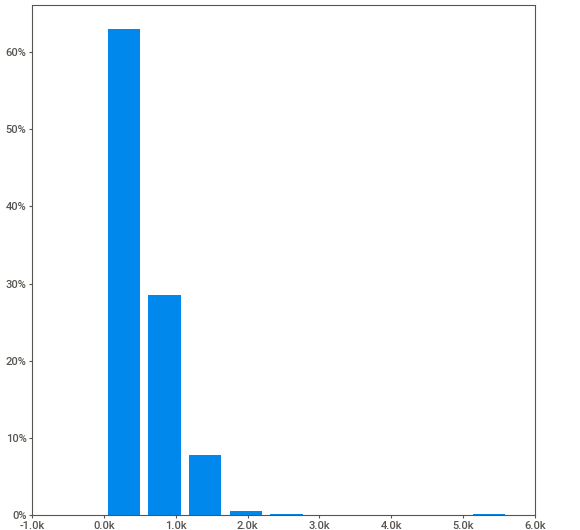
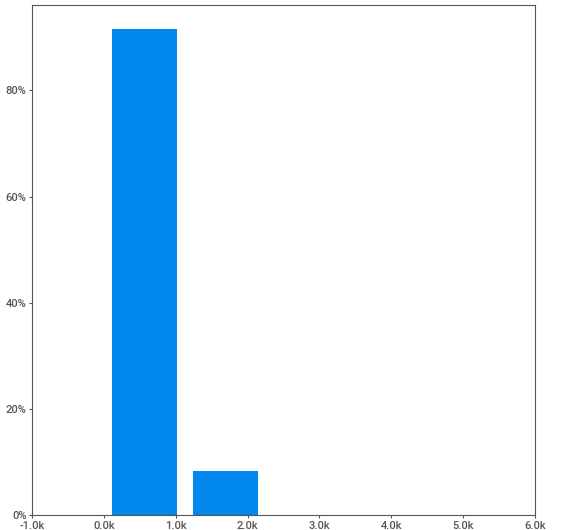
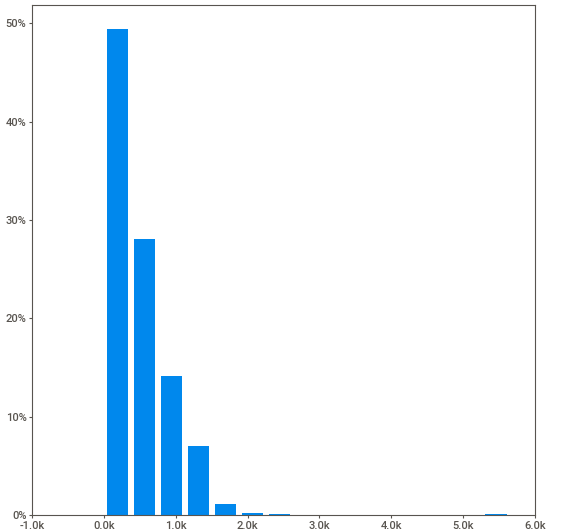
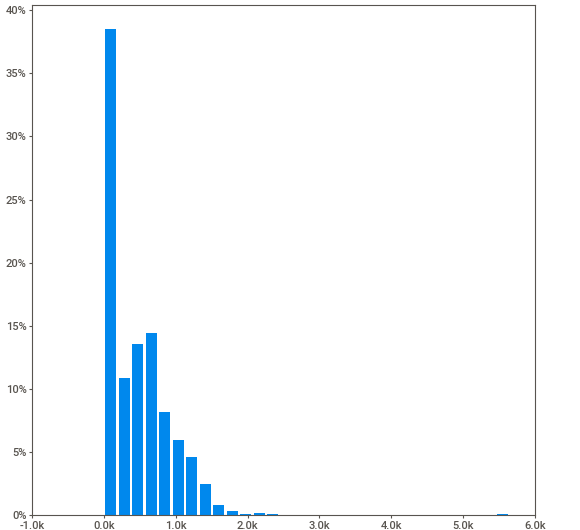
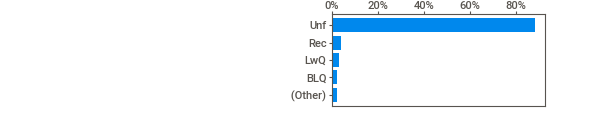
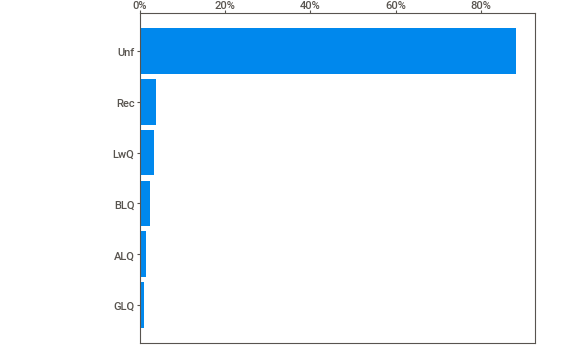
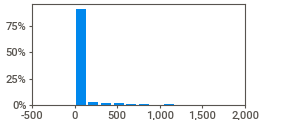
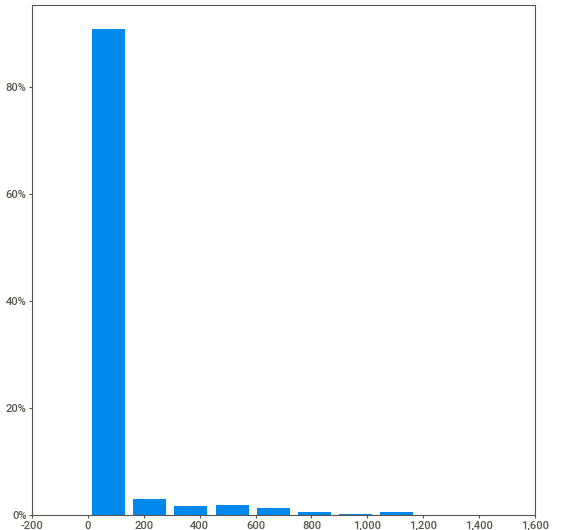
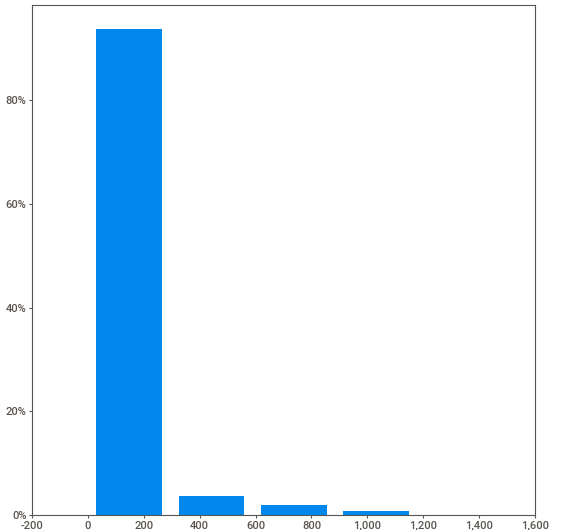
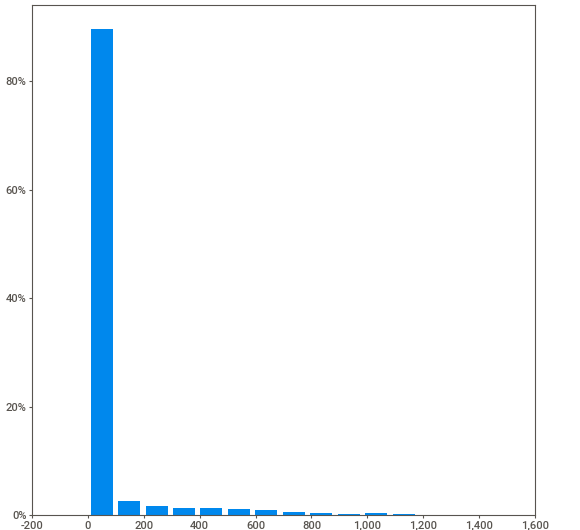
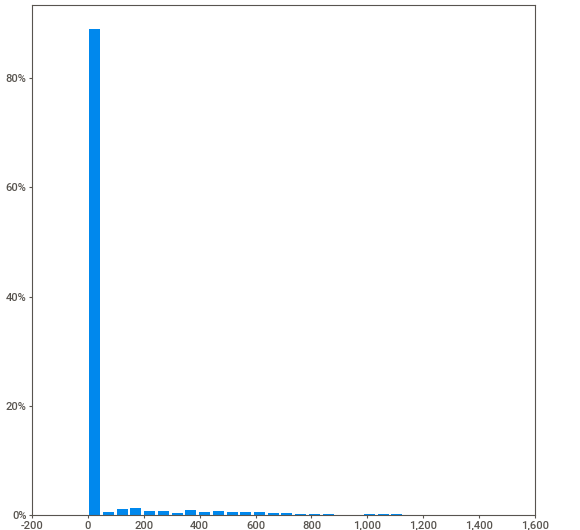
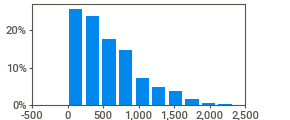
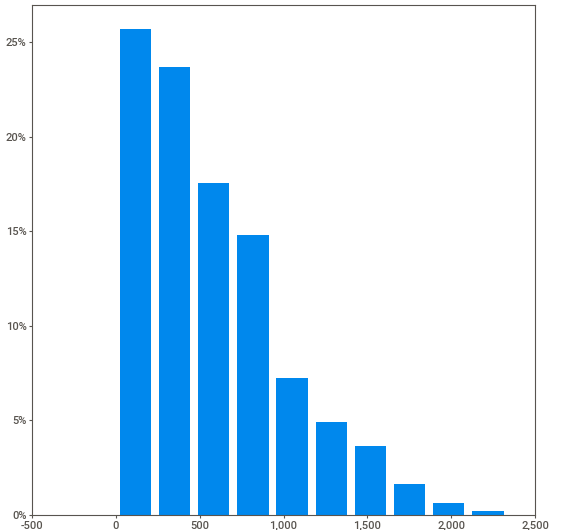
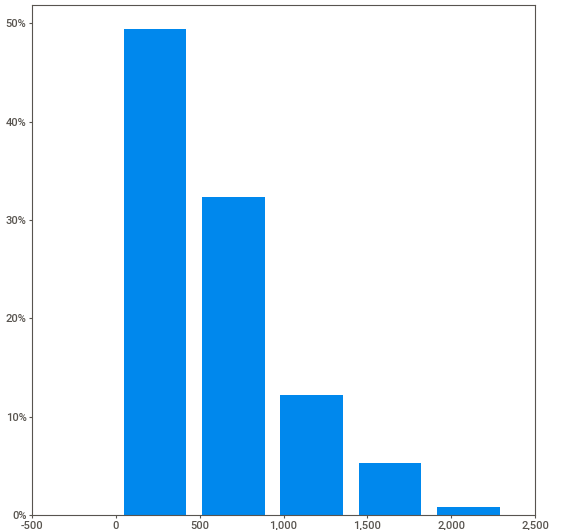
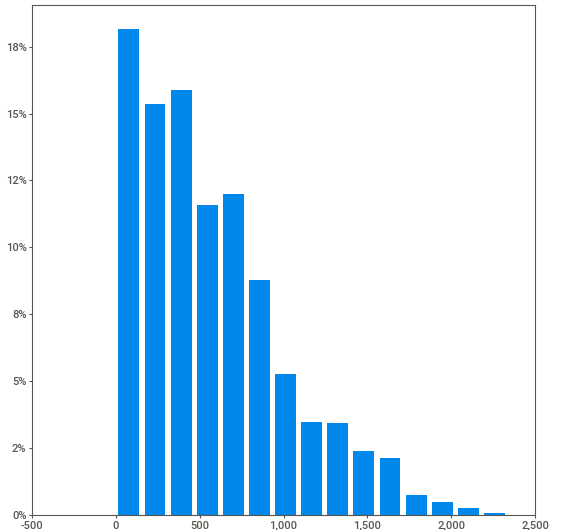
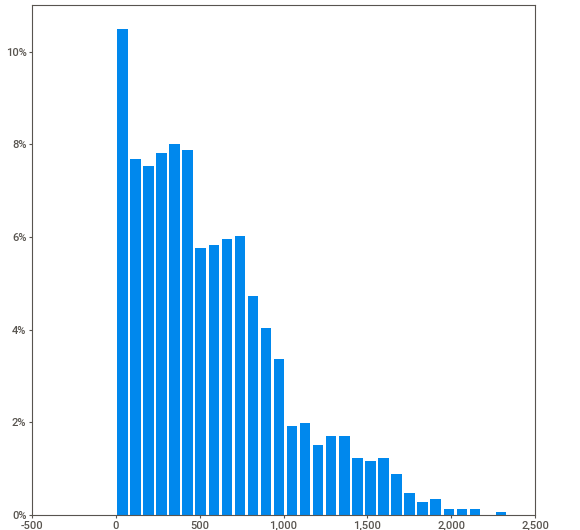
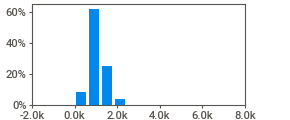
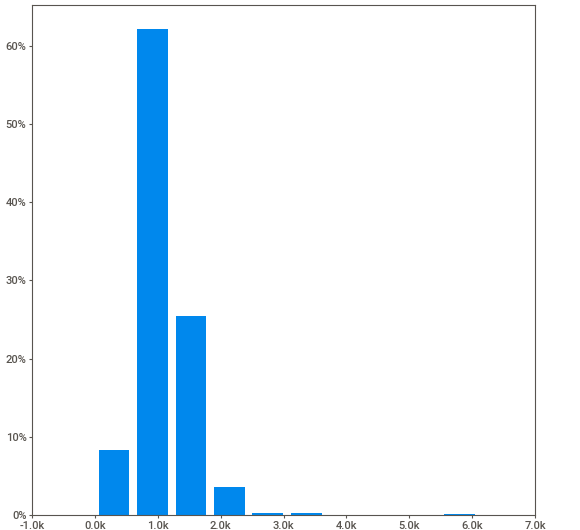
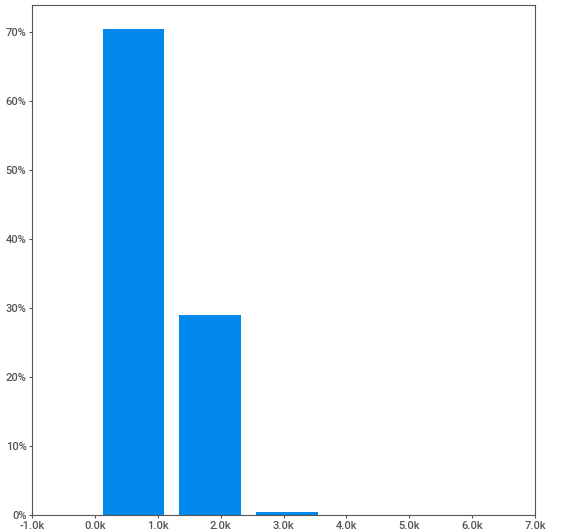
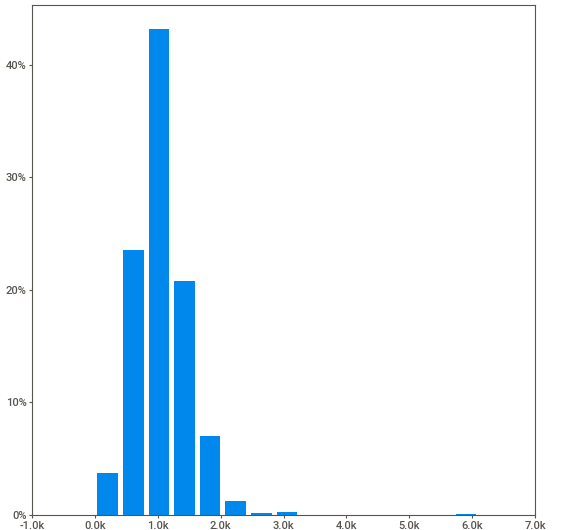
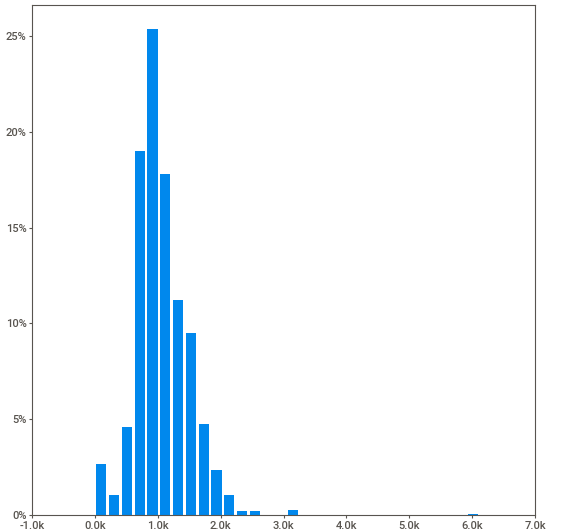
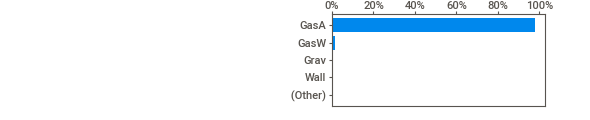
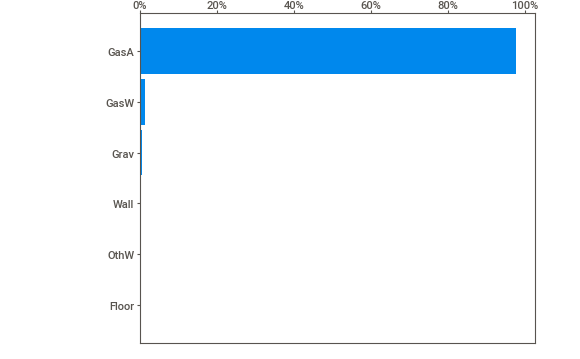
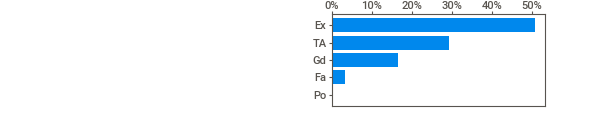
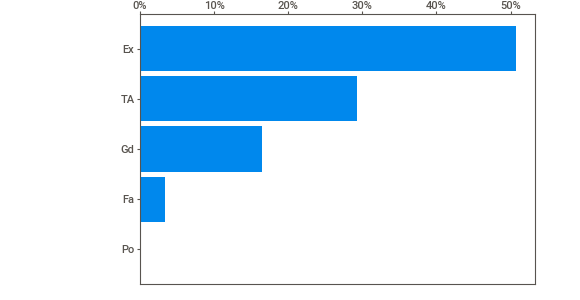
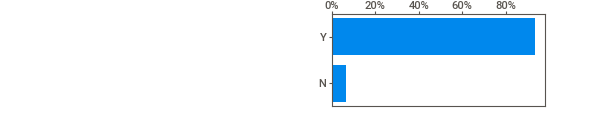
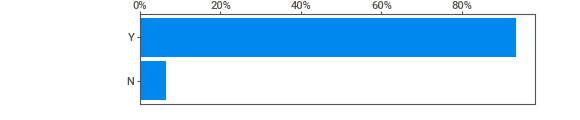
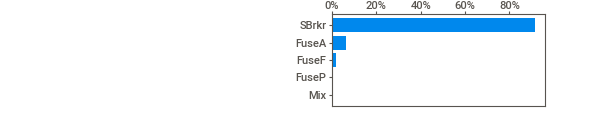
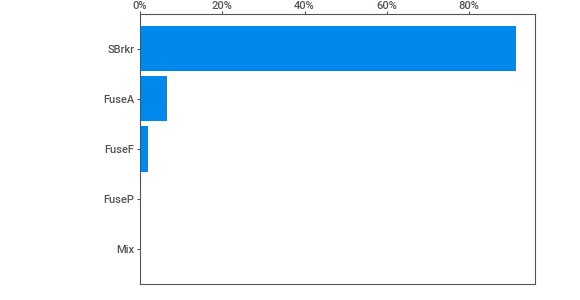
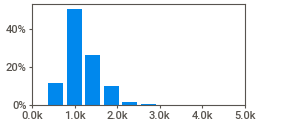
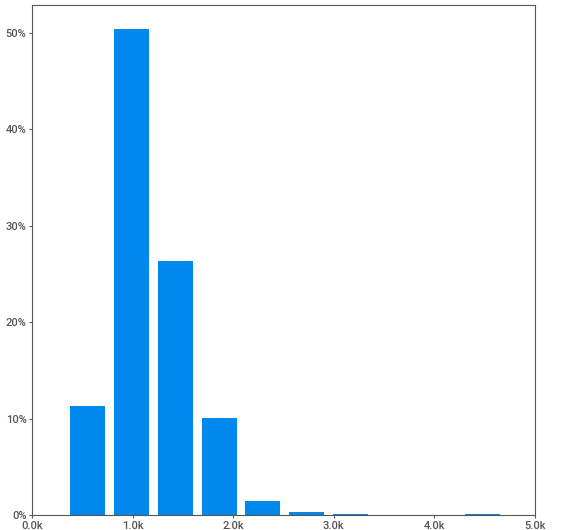
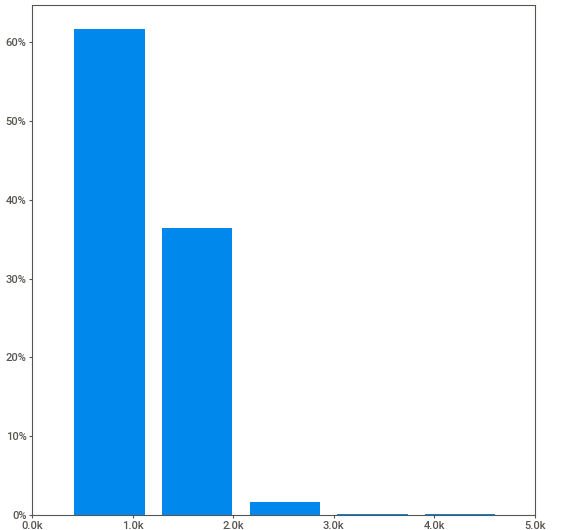
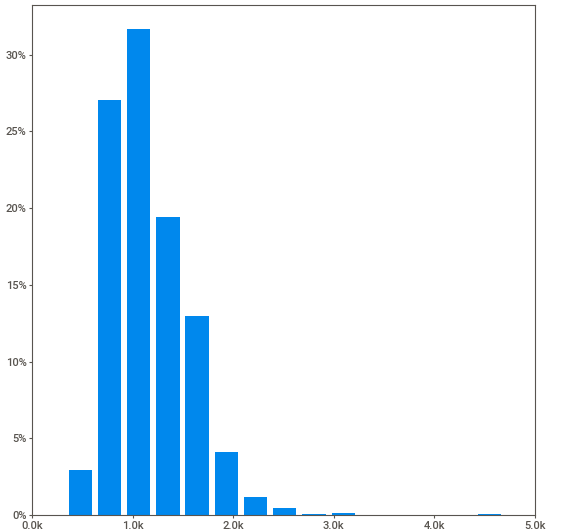
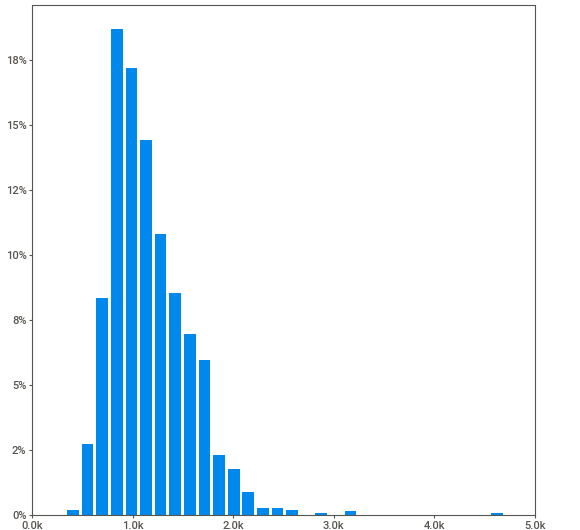
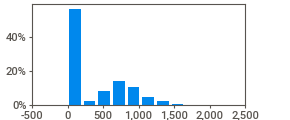
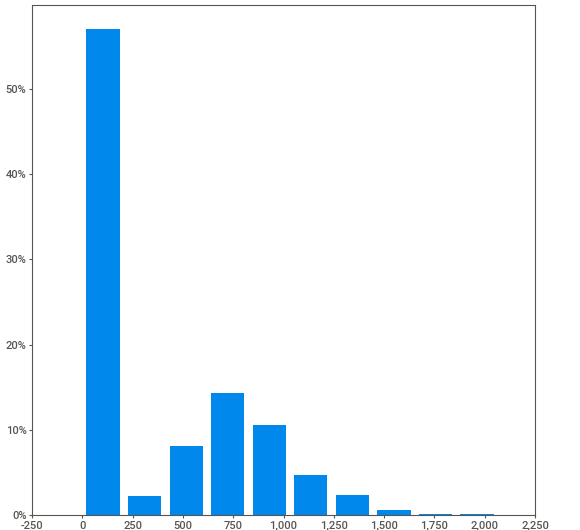
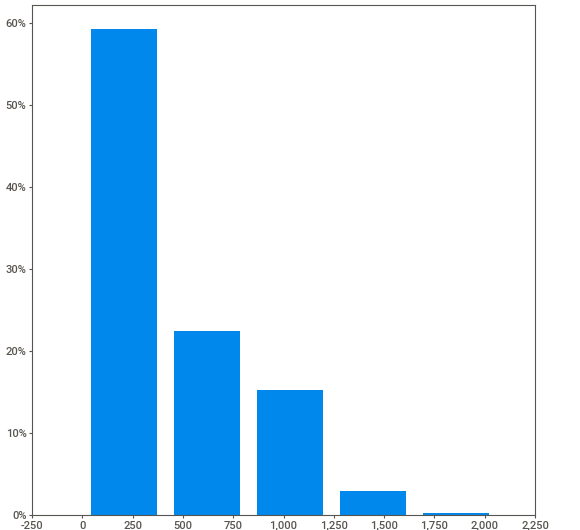
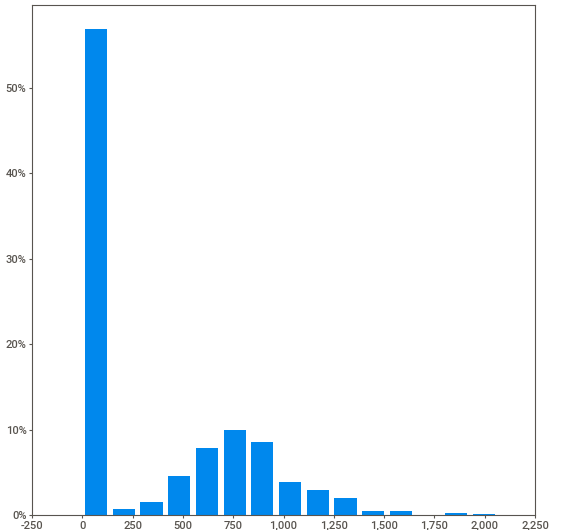
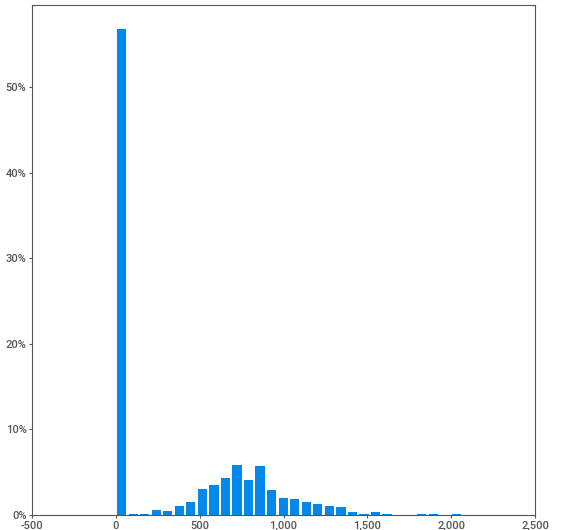
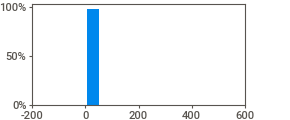
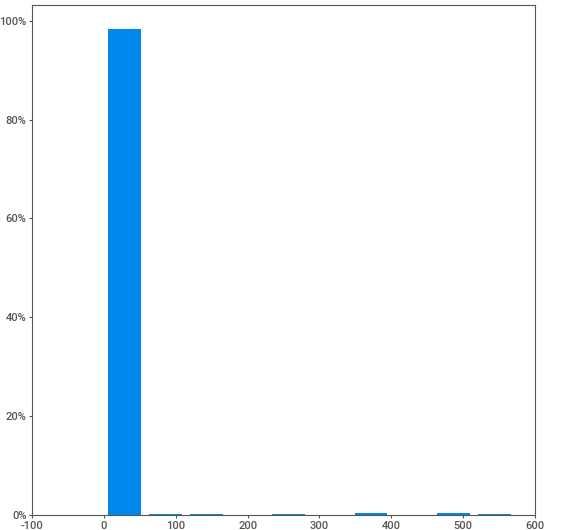
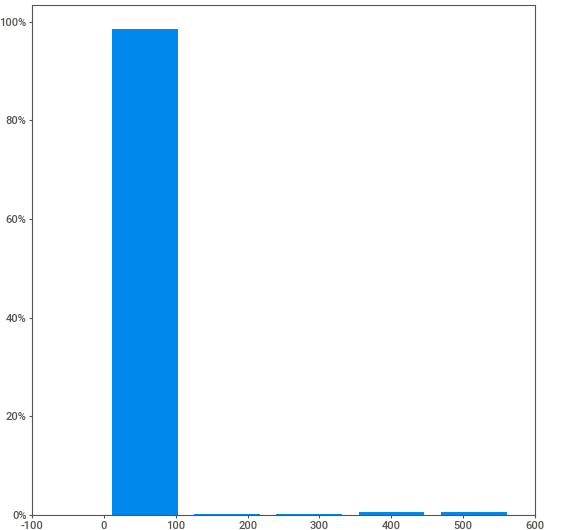
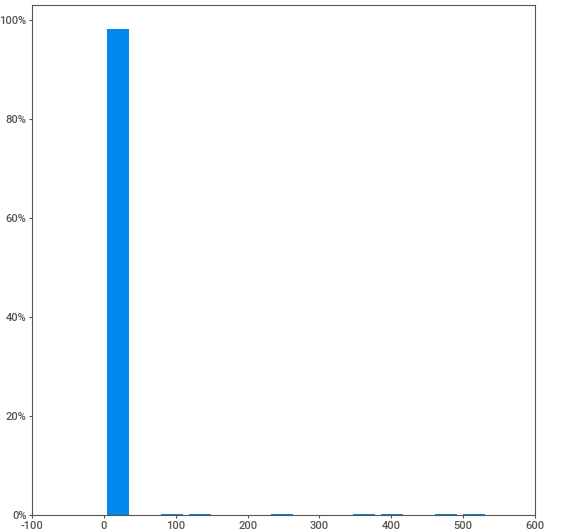
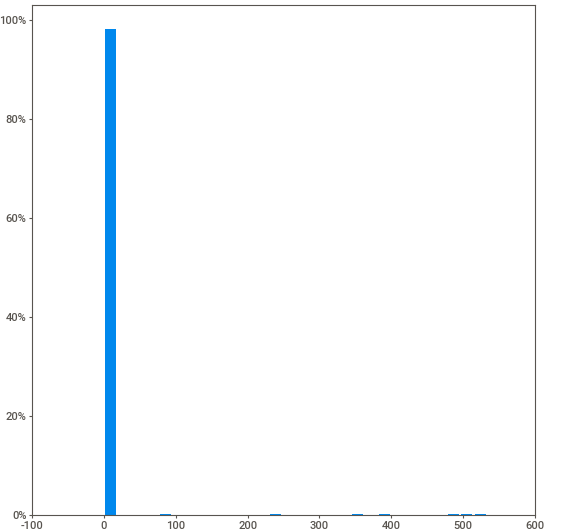
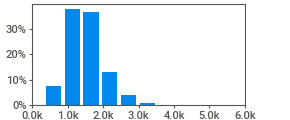
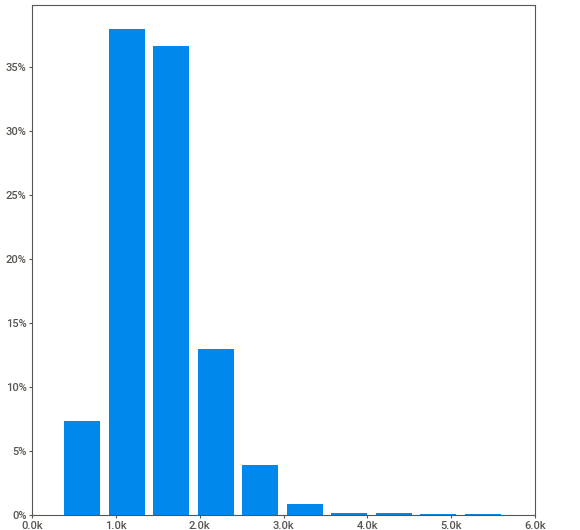
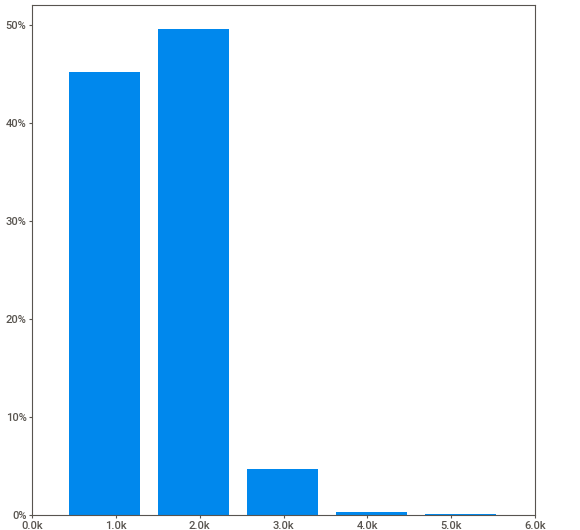
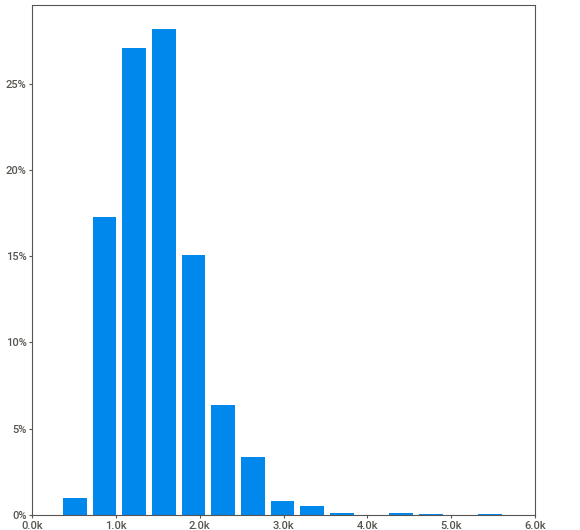
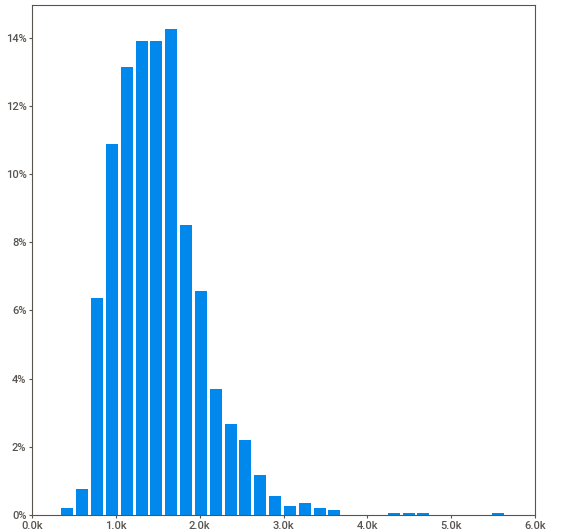
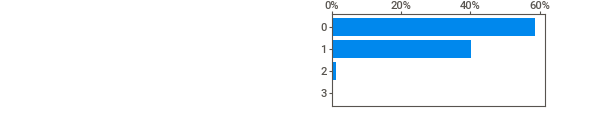
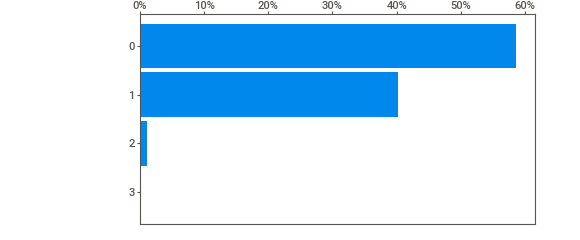
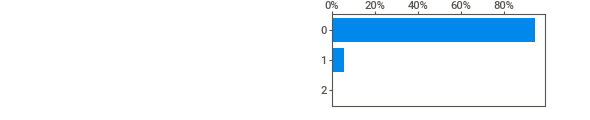
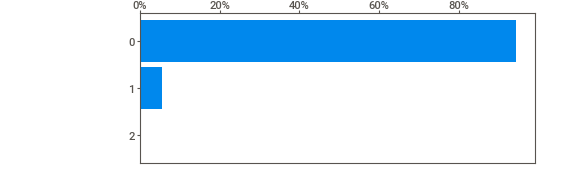
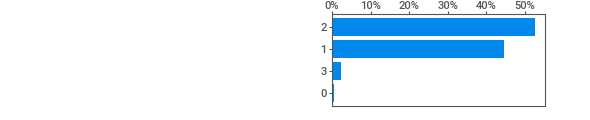
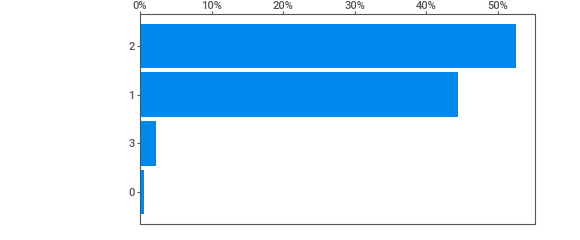
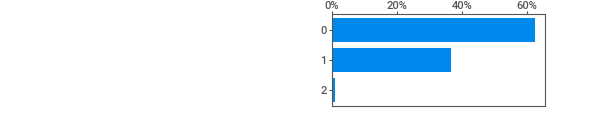
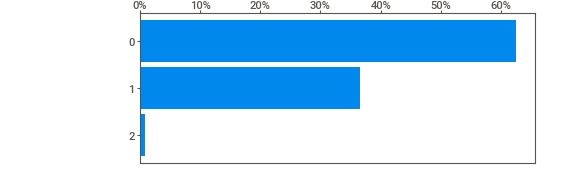
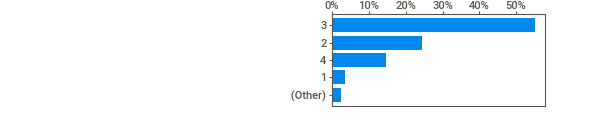
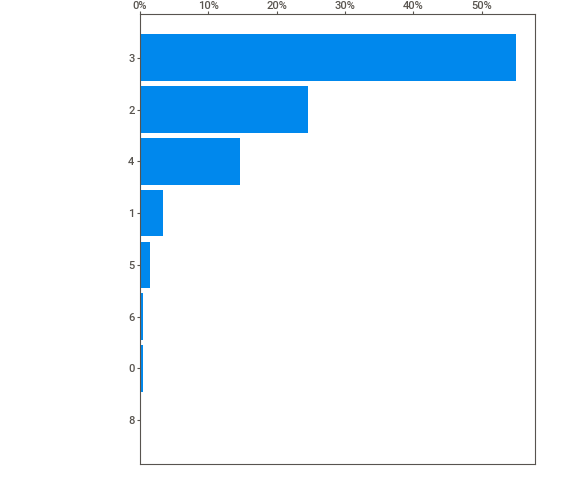
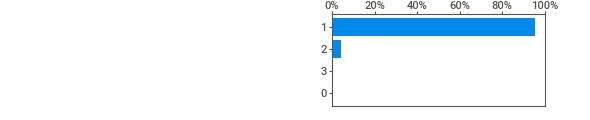
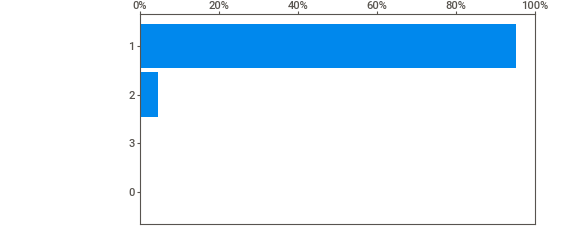
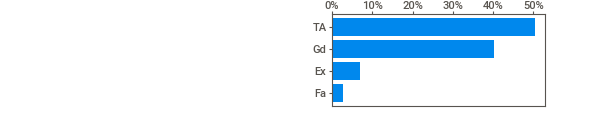
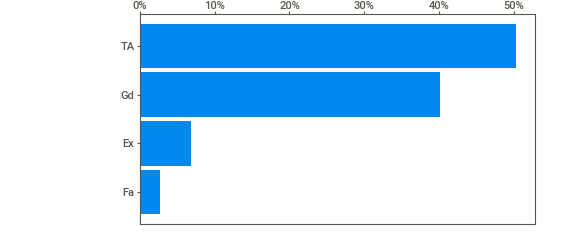
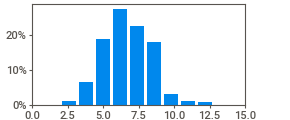
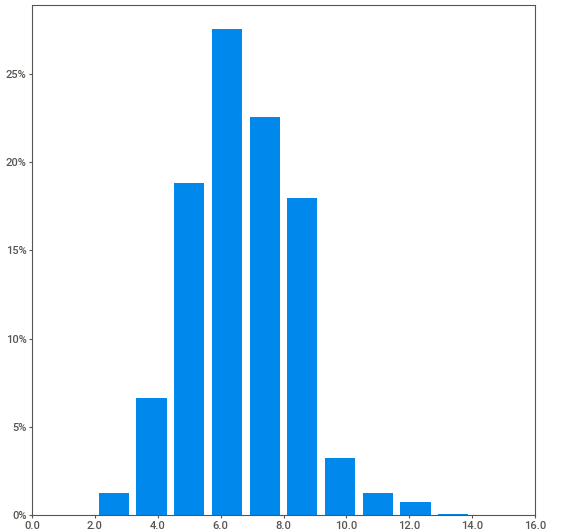
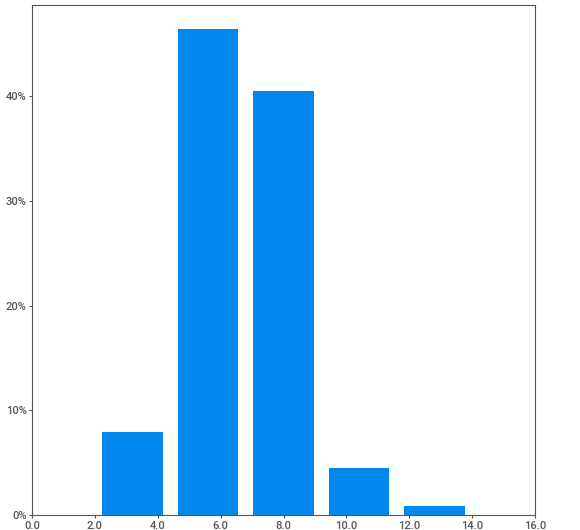
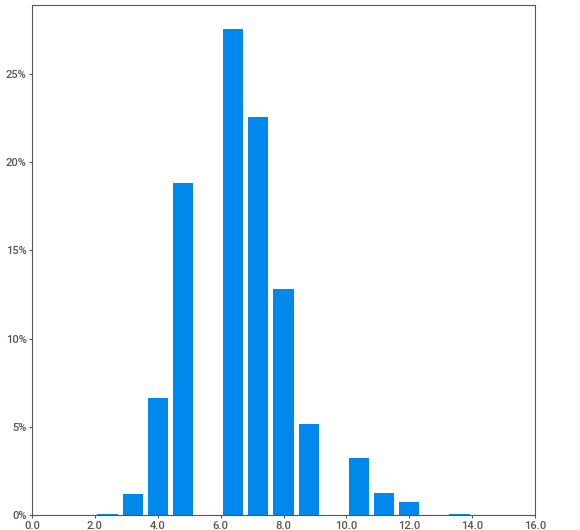
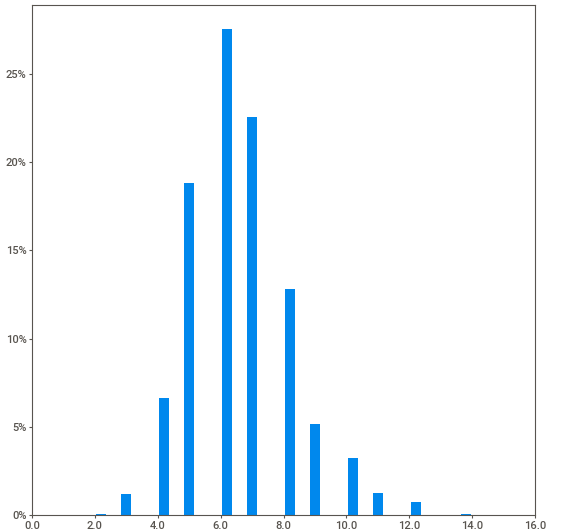
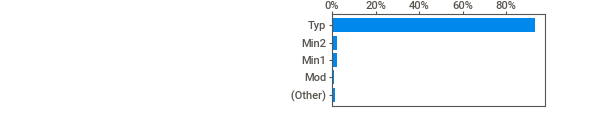
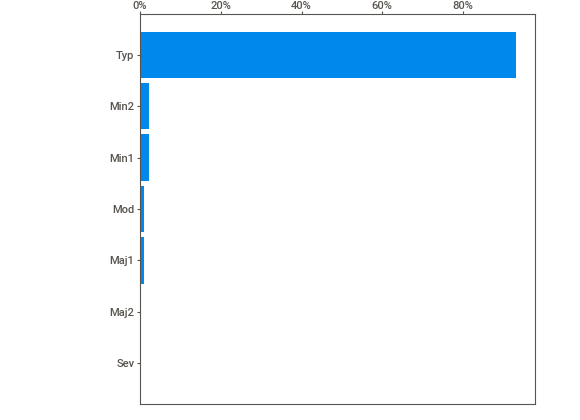
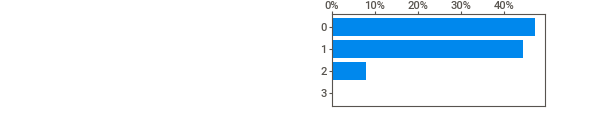
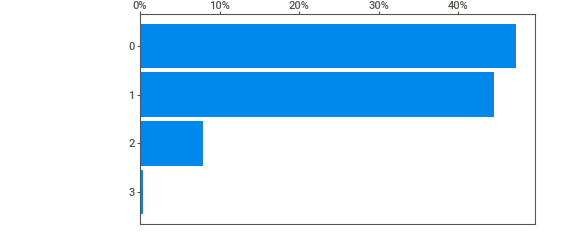
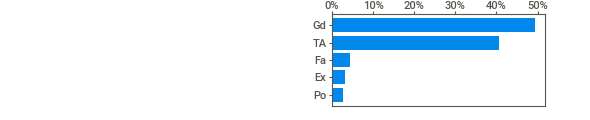
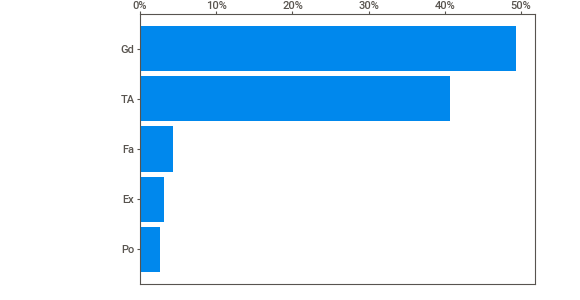
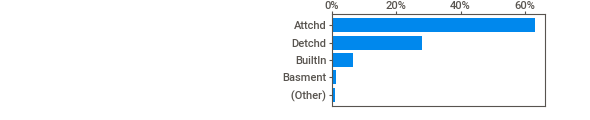
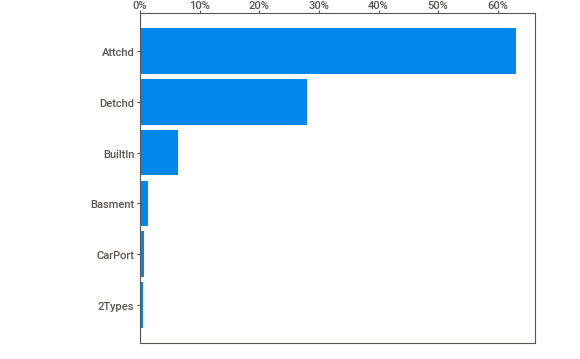
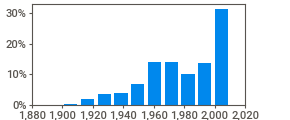
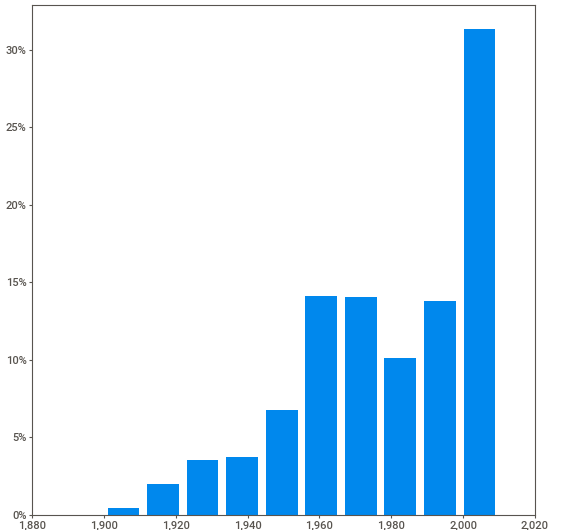
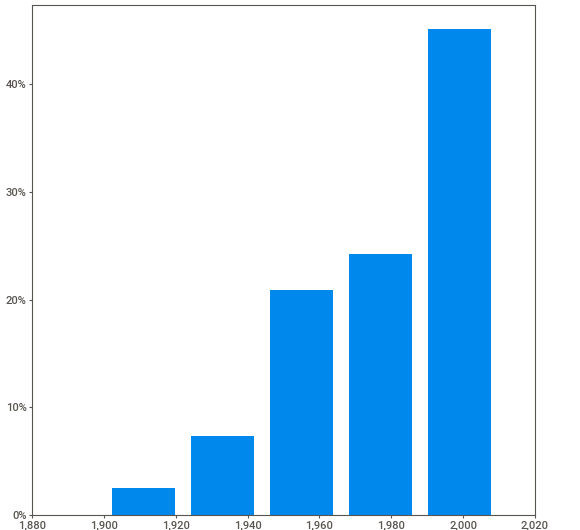
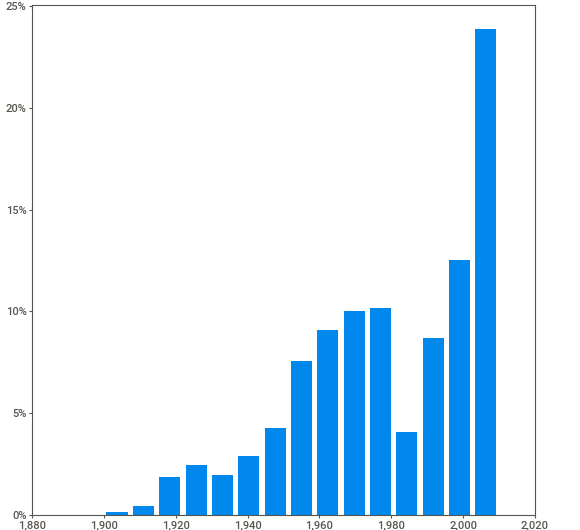
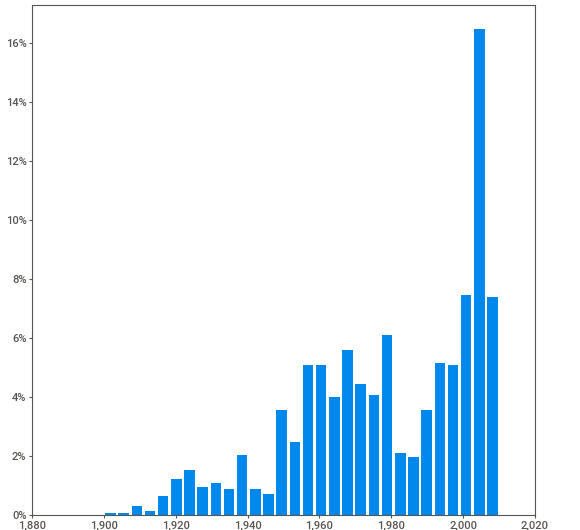
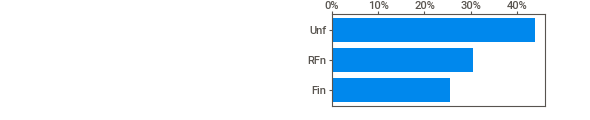
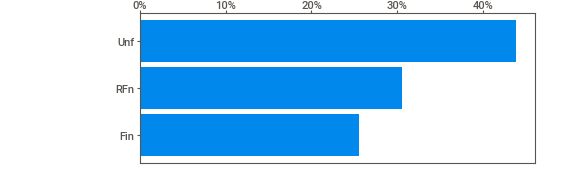
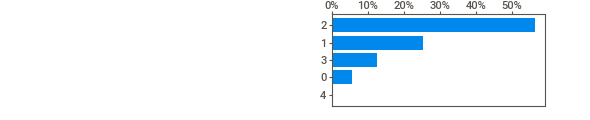
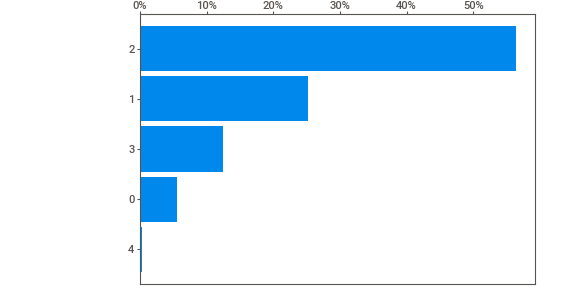
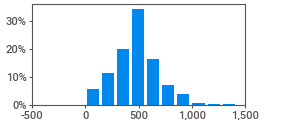
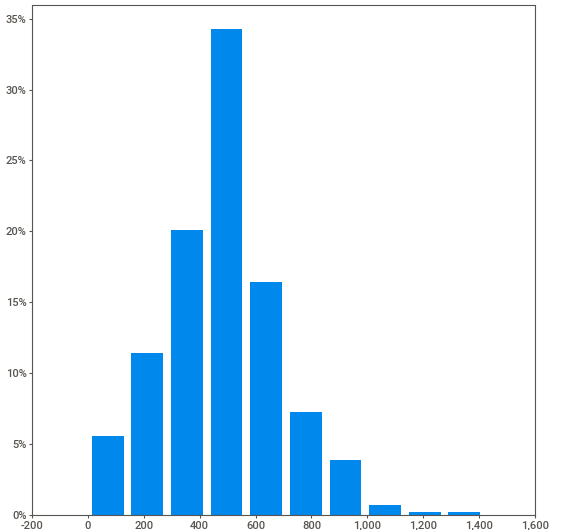
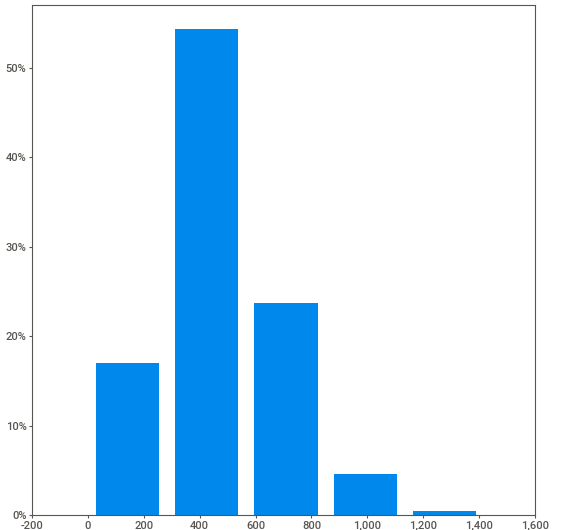
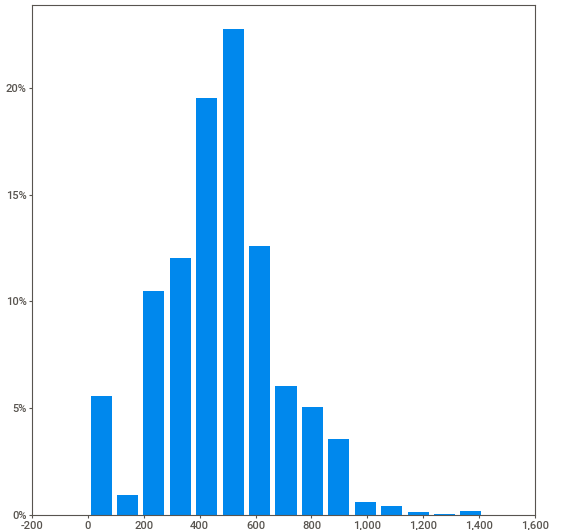
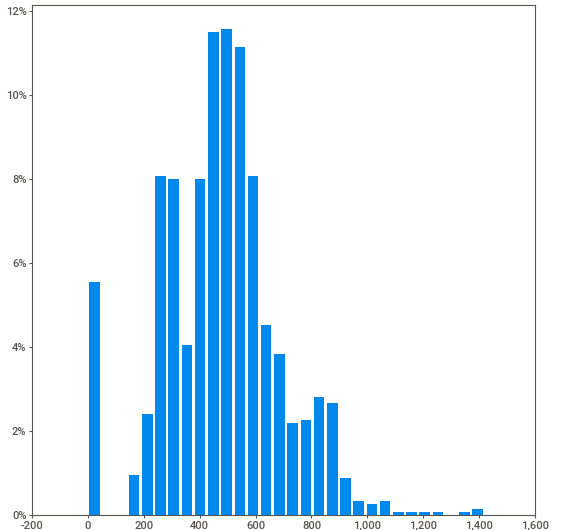
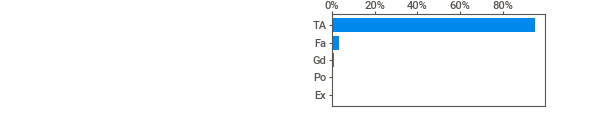
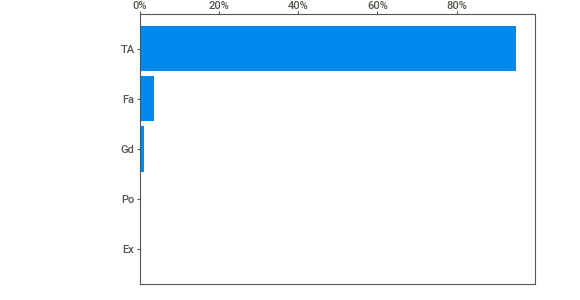
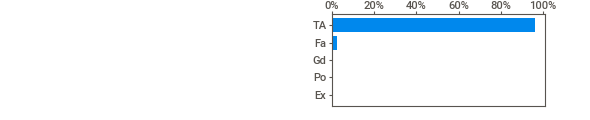
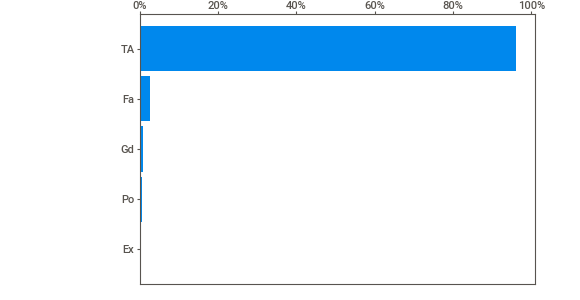
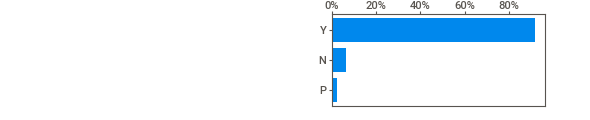
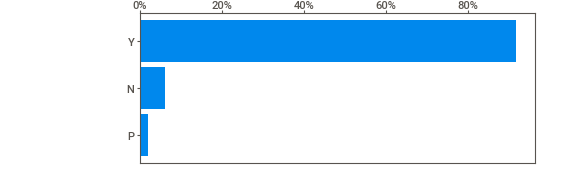
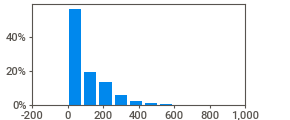
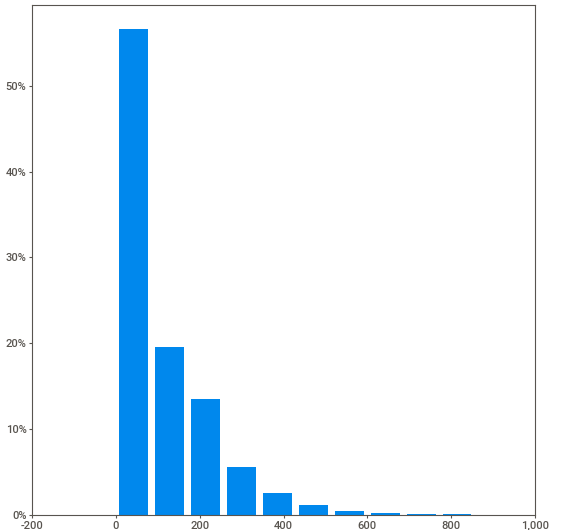
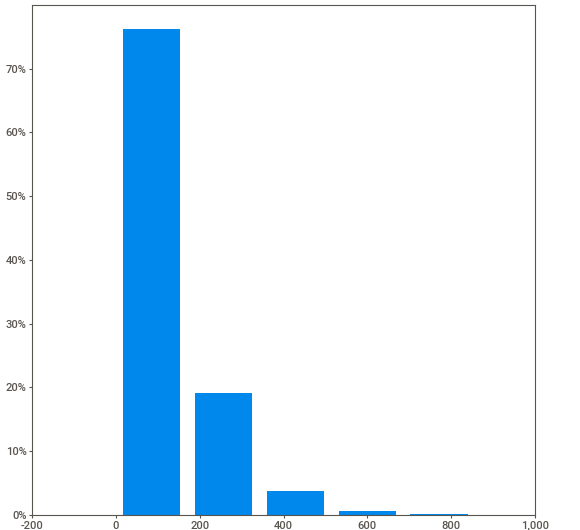
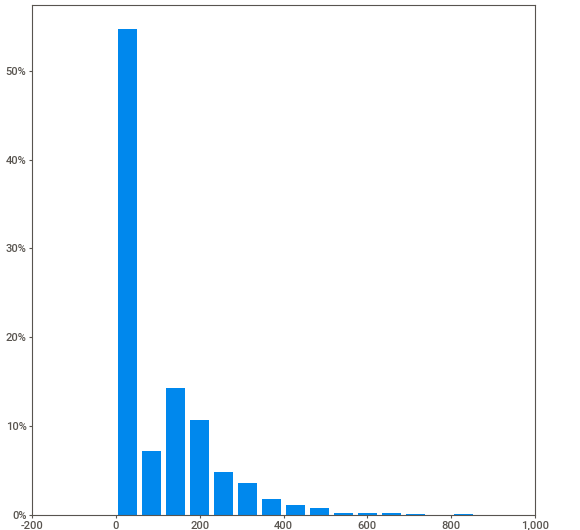
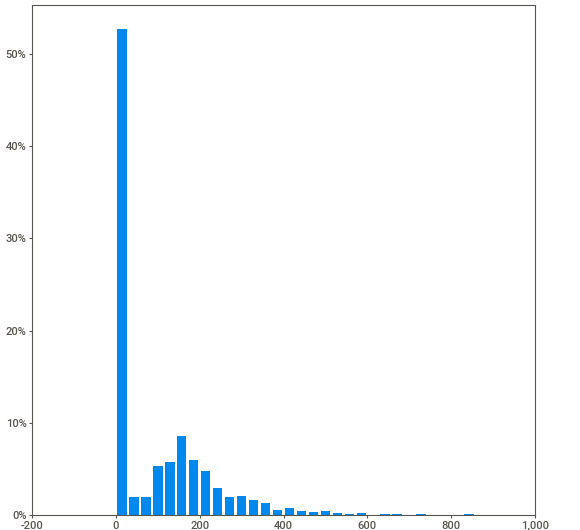
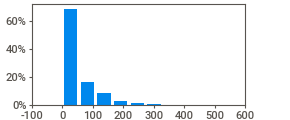
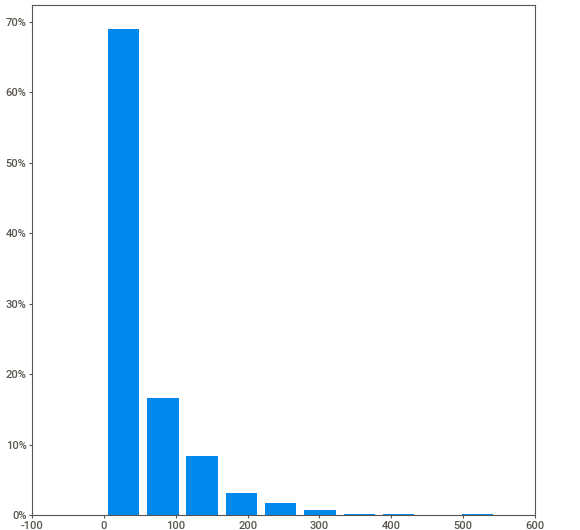
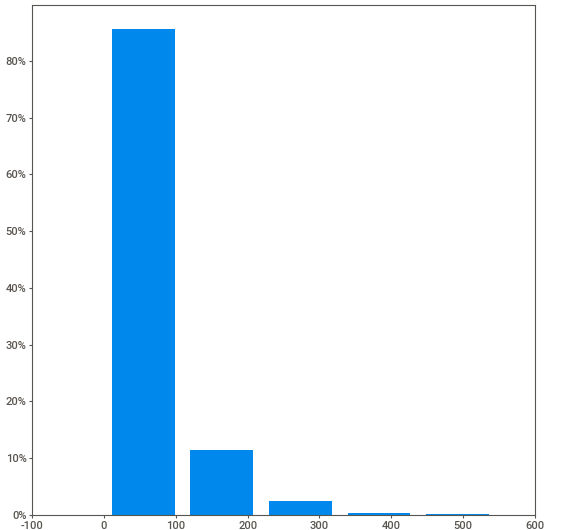
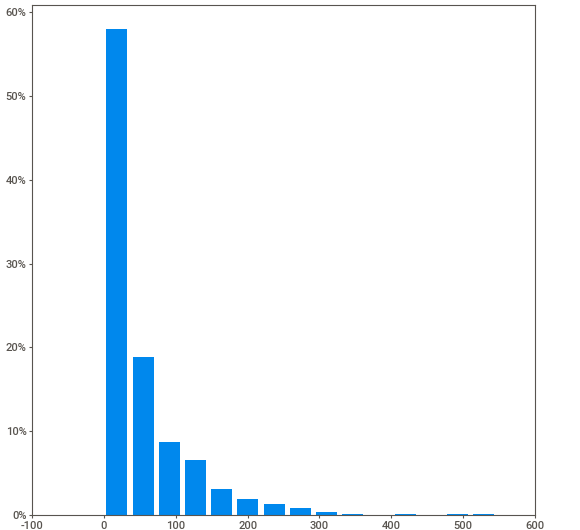
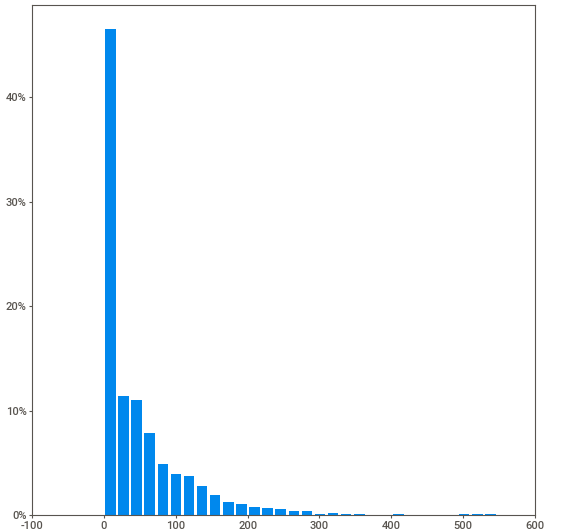
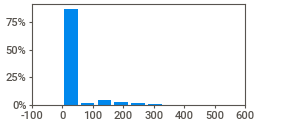
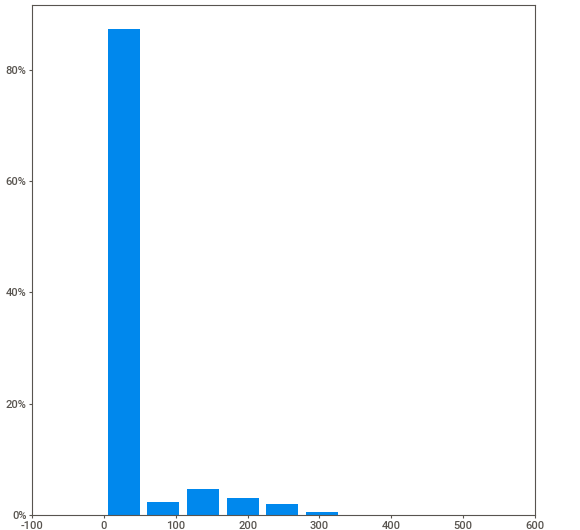
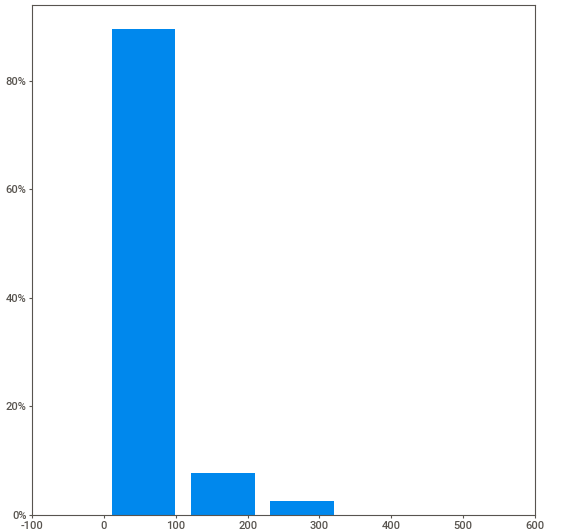
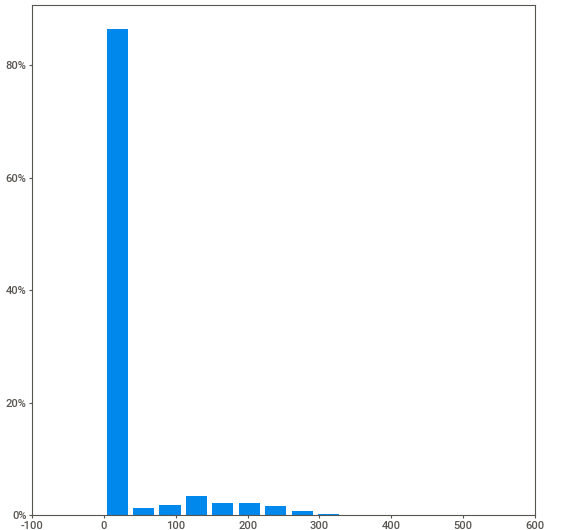
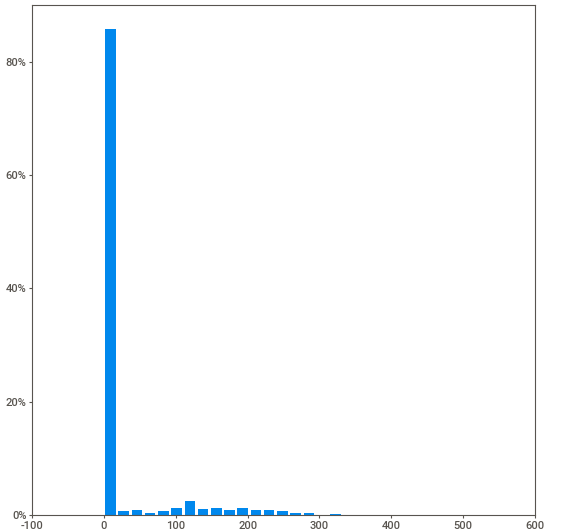
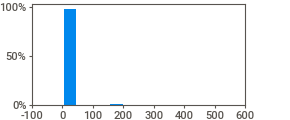
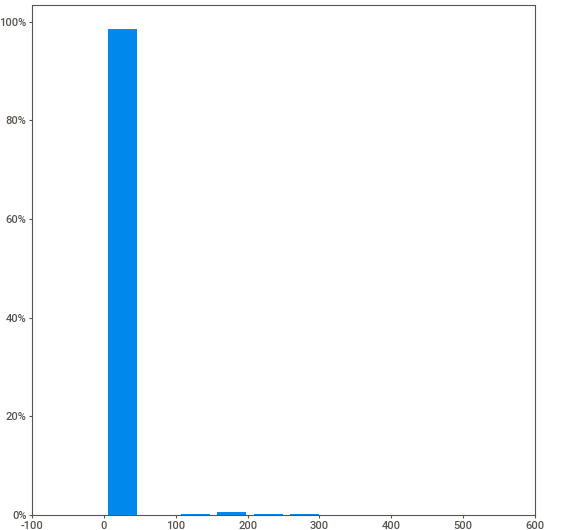
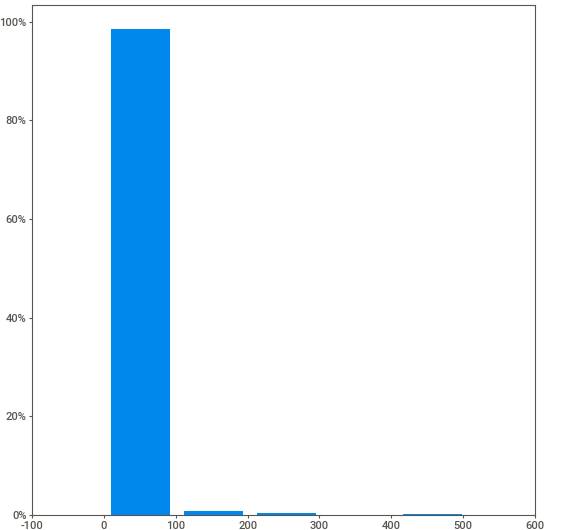
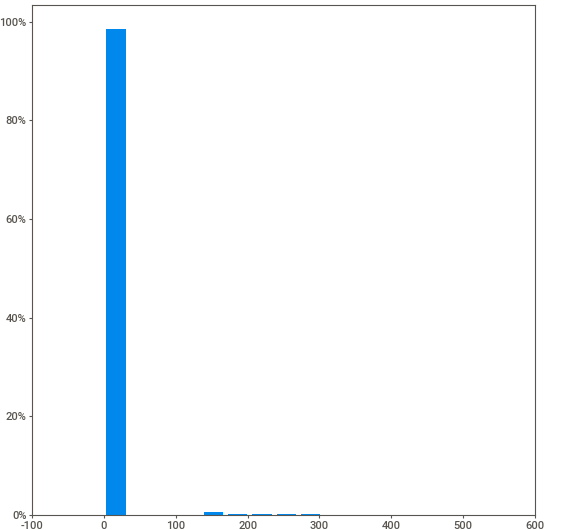
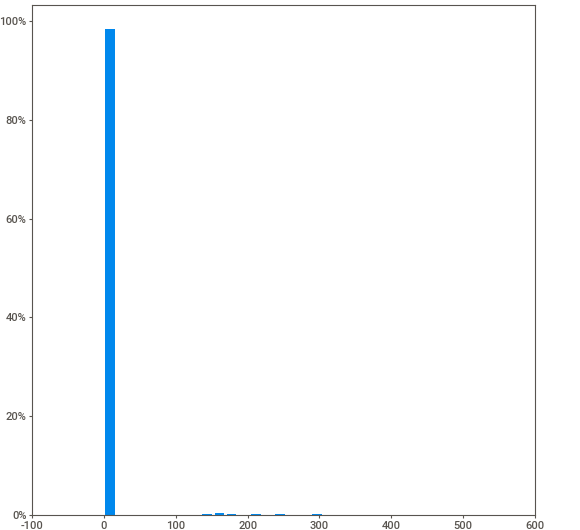
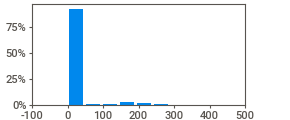
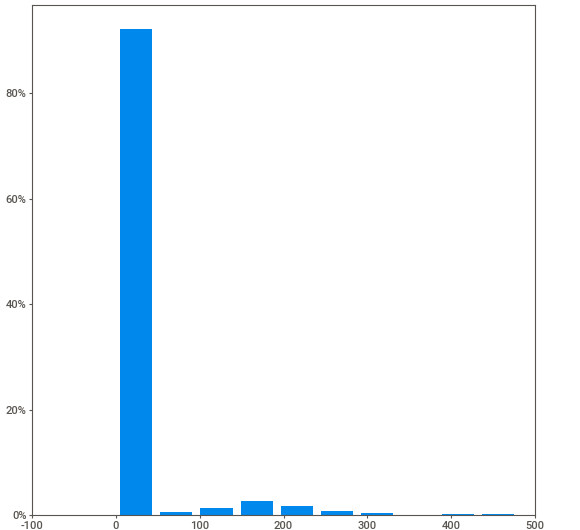
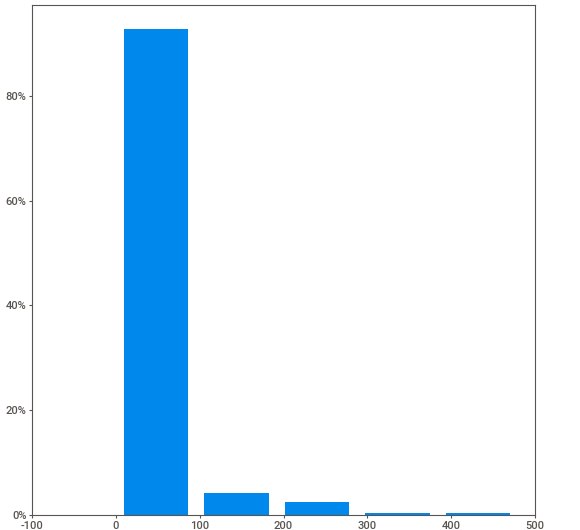
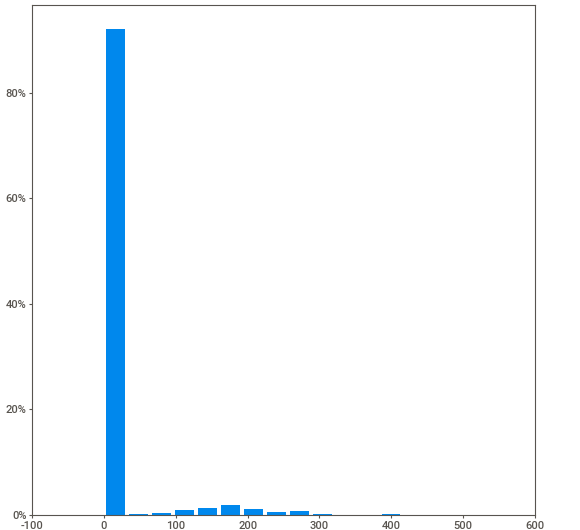
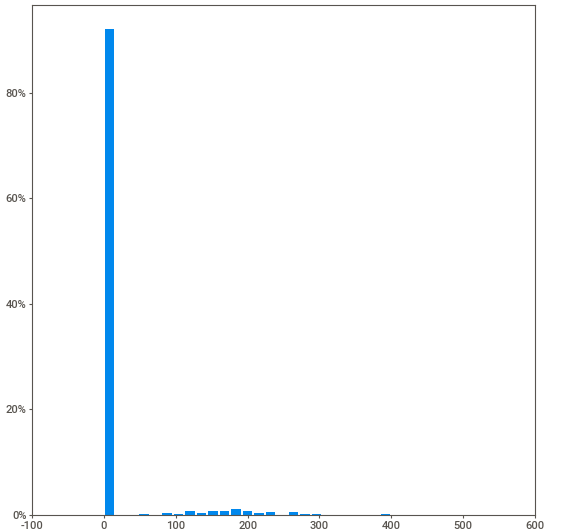
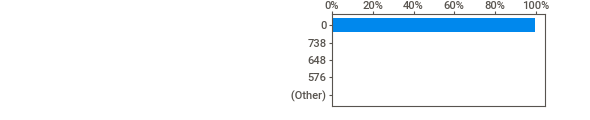
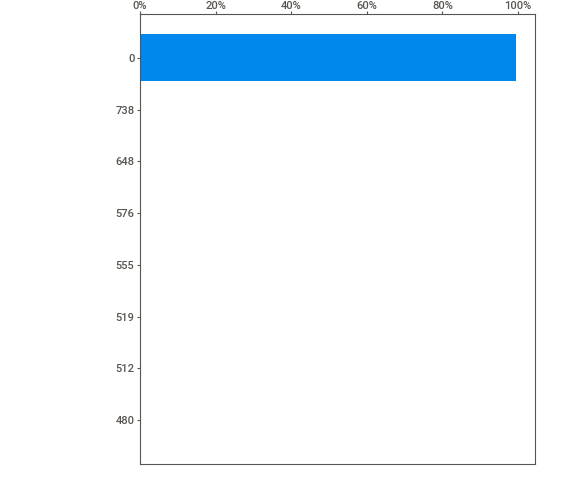
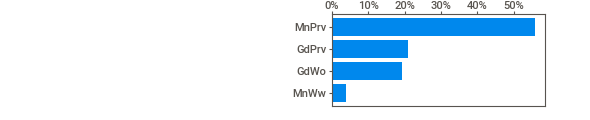
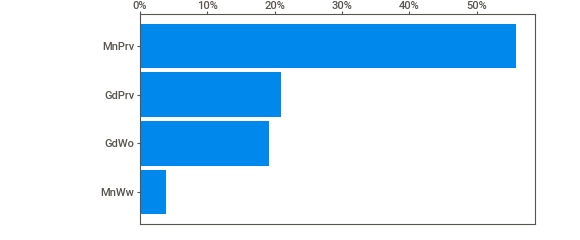
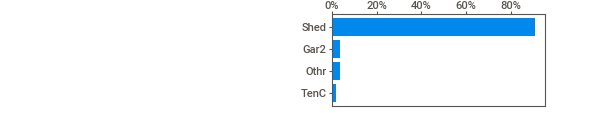
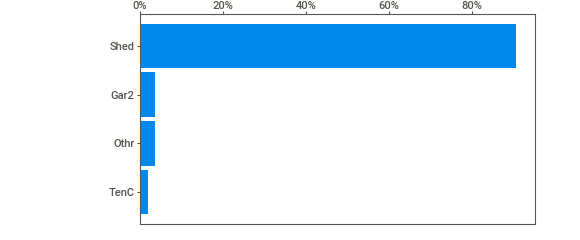
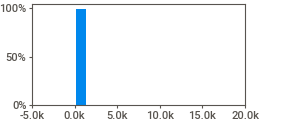
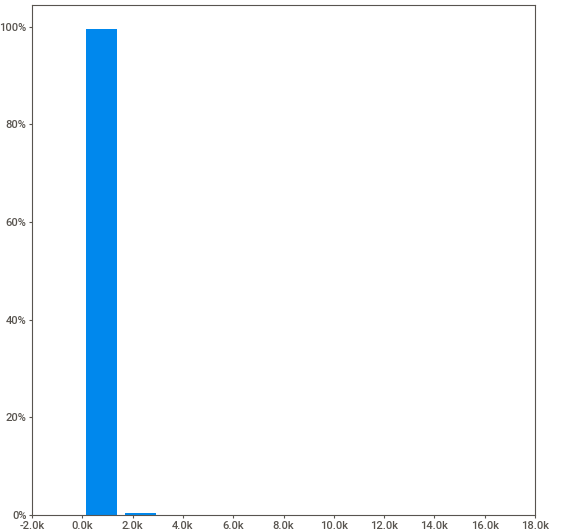
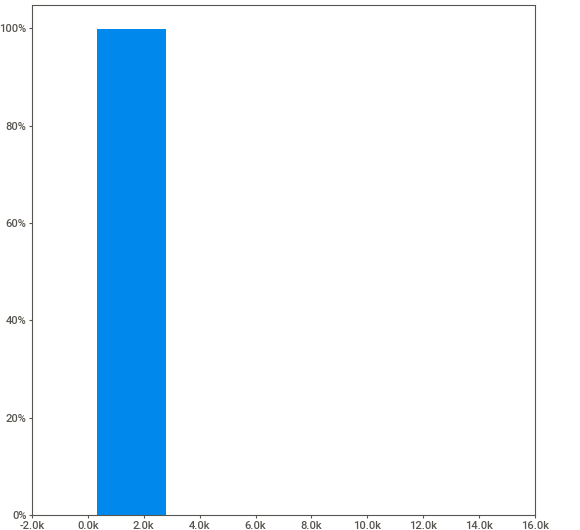
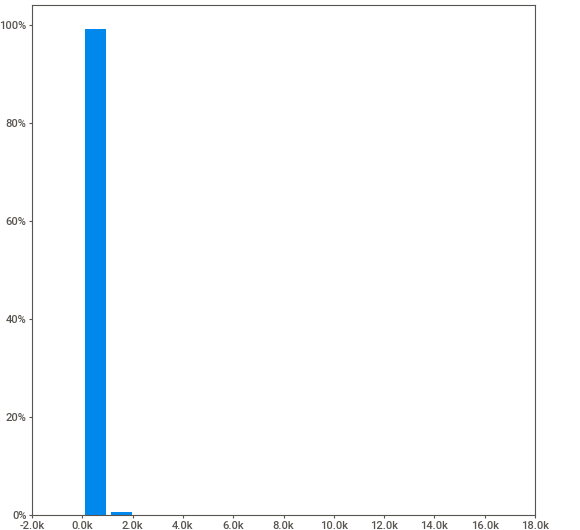
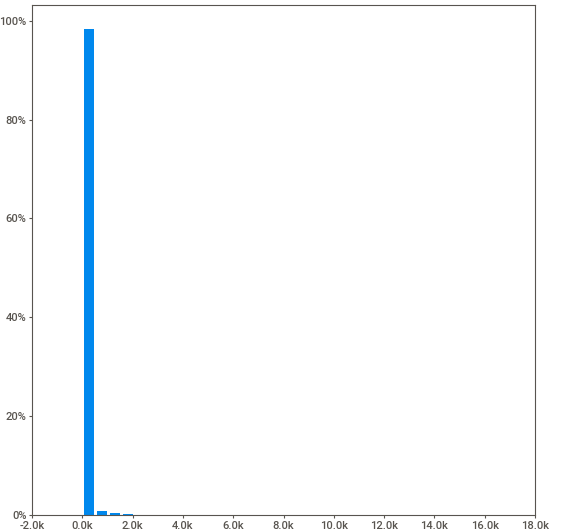
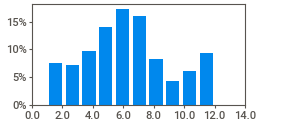
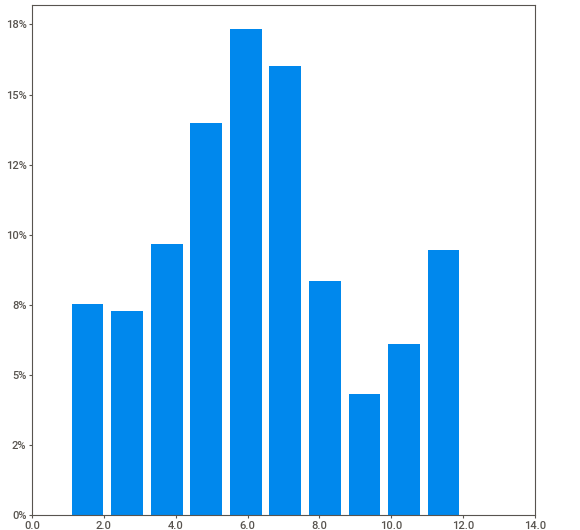
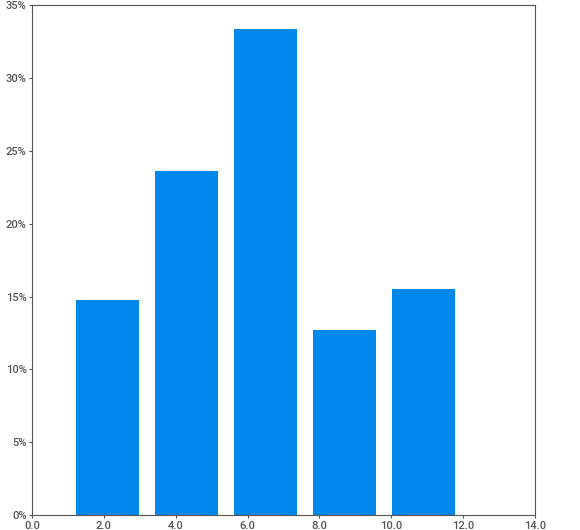
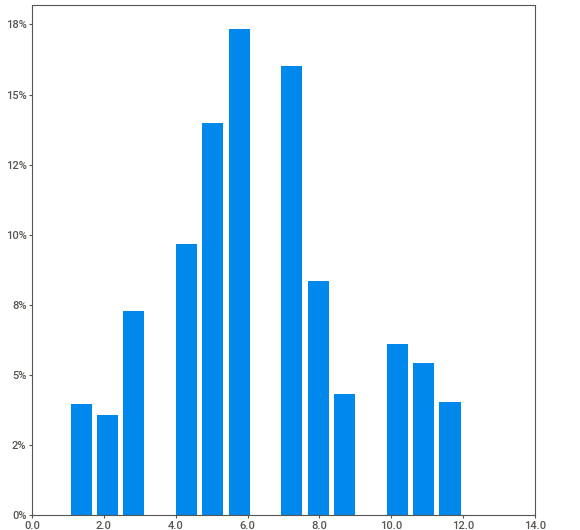
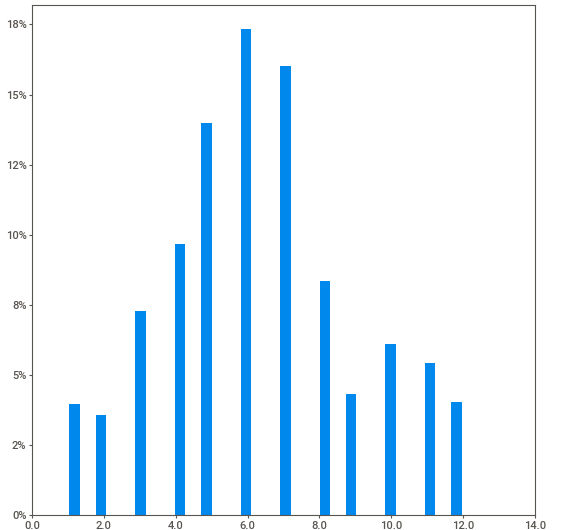
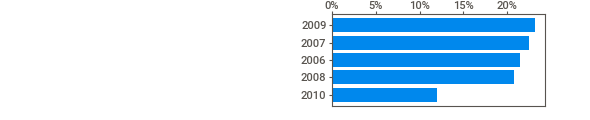
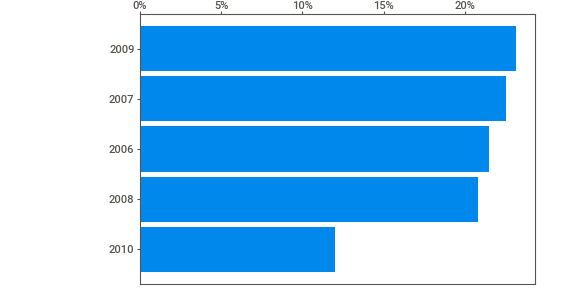
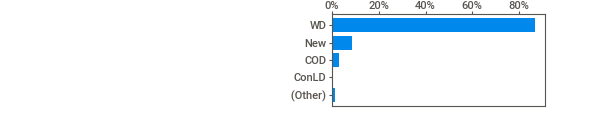
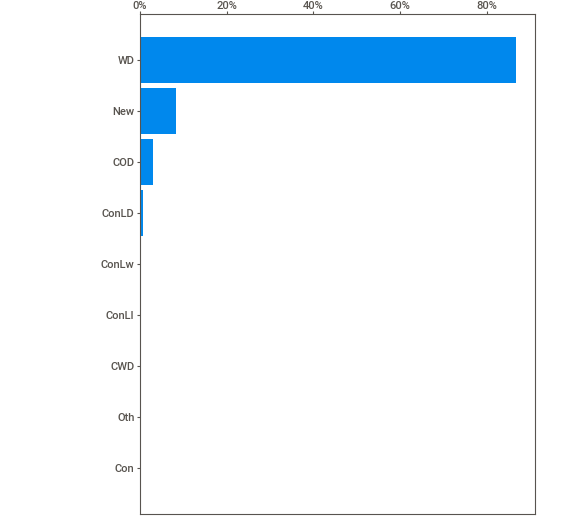
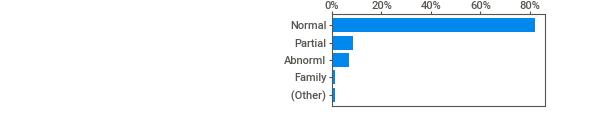
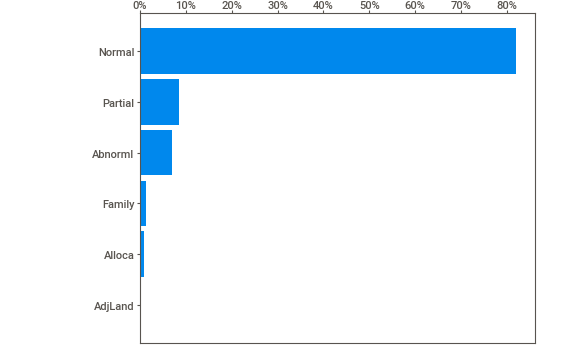
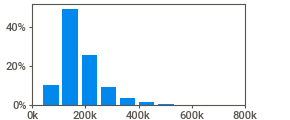
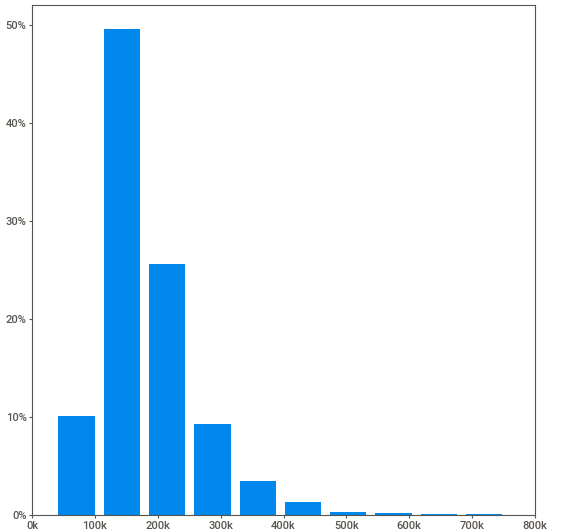
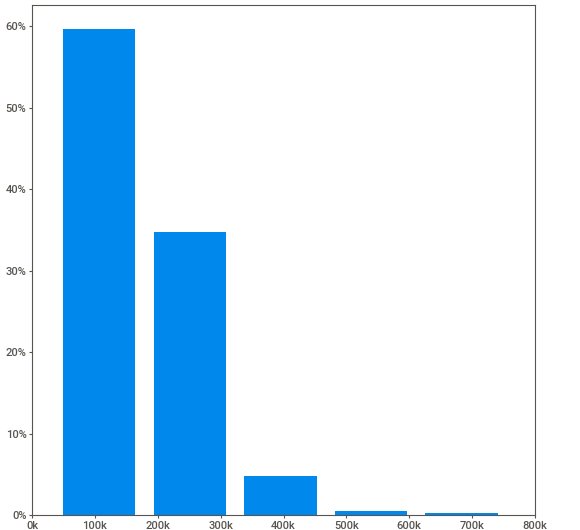
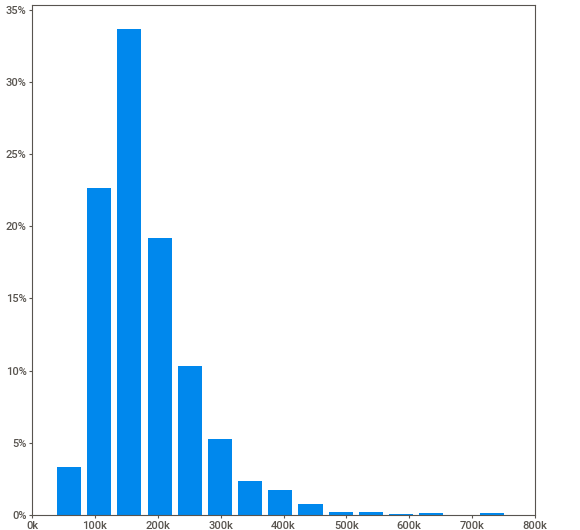
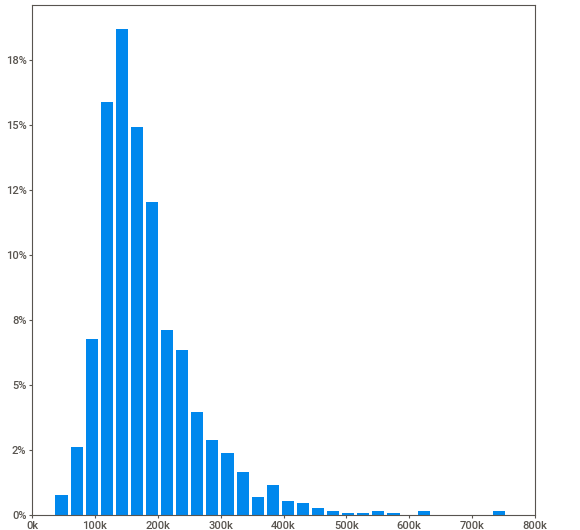
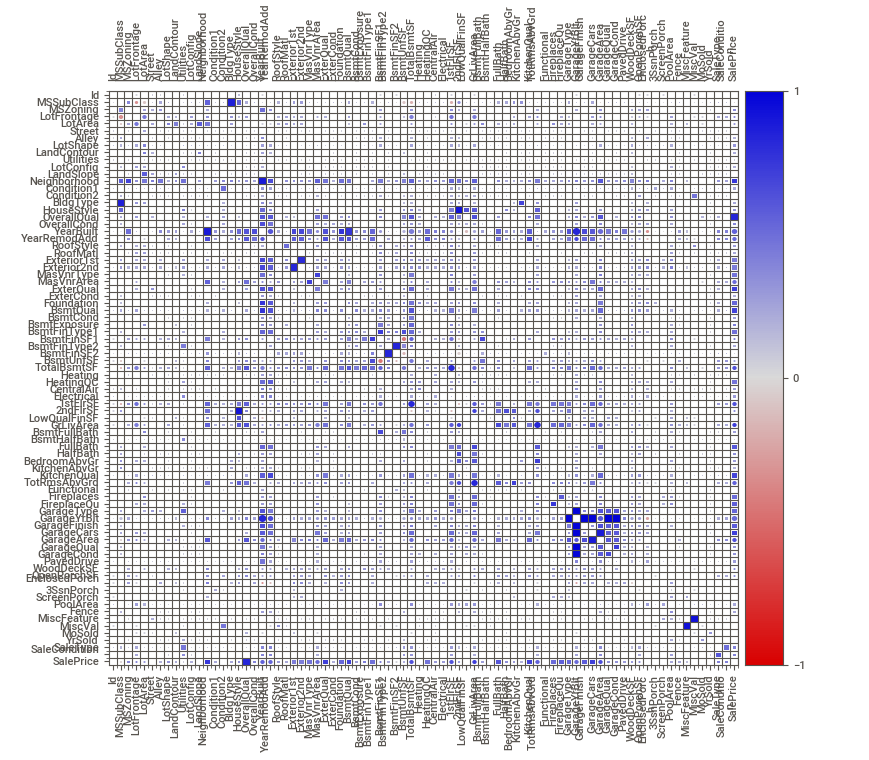
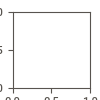

In [9]:
usedcars_report = sw.analyze(house_df)
usedcars_report.show_notebook(layout='vertical')

You can notice a few things:
* We have features that are roughly **normally distributed** (such as ```1stFlrSF```, ```TotRmsAbvGrd``` and ```GarageArea```)

* Features that maintain a **high** correlation between them and the target variable (```OverallQual```, ```GrLivArea```, ```GarageArea```, ```GarageCars```, etc.)

* Features that maintain a **really low** correlation between them and the target variable (```OverallCond```, ```BsmtFinSF2```, ```LowQualFinSF```, ```BsmtHalfBath```, etc.)

* Features that they have **one most common value** - more than 90% (```Street```, ```Utilities```, ```LandSlop```, ```Condition2```, etc.)

So I decided to **drop** those features that **have one most common value** (more than 90%), and variables that **do not maintain correlation** between them and the target variable or are very low (less than 0.1).


In [10]:
# will drop them later
to_drop = ['Street', 'LandContour', 'LandSlope', 'Condition1', 'Condition2', 
'BsmtFinType2', 'BsmtFinSF2', 'Heating', 'CentralAir', 'Electrical', 'LowQualFinSF', 'BsmtHalfBath', 
'KitchenAbvGr', 'Functional', 'PavedDrive', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 
'MiscFeature', 'MiscVal', 'MoSold', 'YrSold']


Let's identify the ordinal features.

In [11]:
ordinal_features = ['OverallQual', 'OverallCond', 'LotShape', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 
                    'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 
                    'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenQual', 'GarageCars', 
                    'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 
                    'GarageCond']

## Categorical Against the Target Variable

Calculating box-plots:   0%|          | 0/43 [00:00<?, ?it/s]

Removing unused axes:   0%|          | 0/6 [00:00<?, ?it/s]

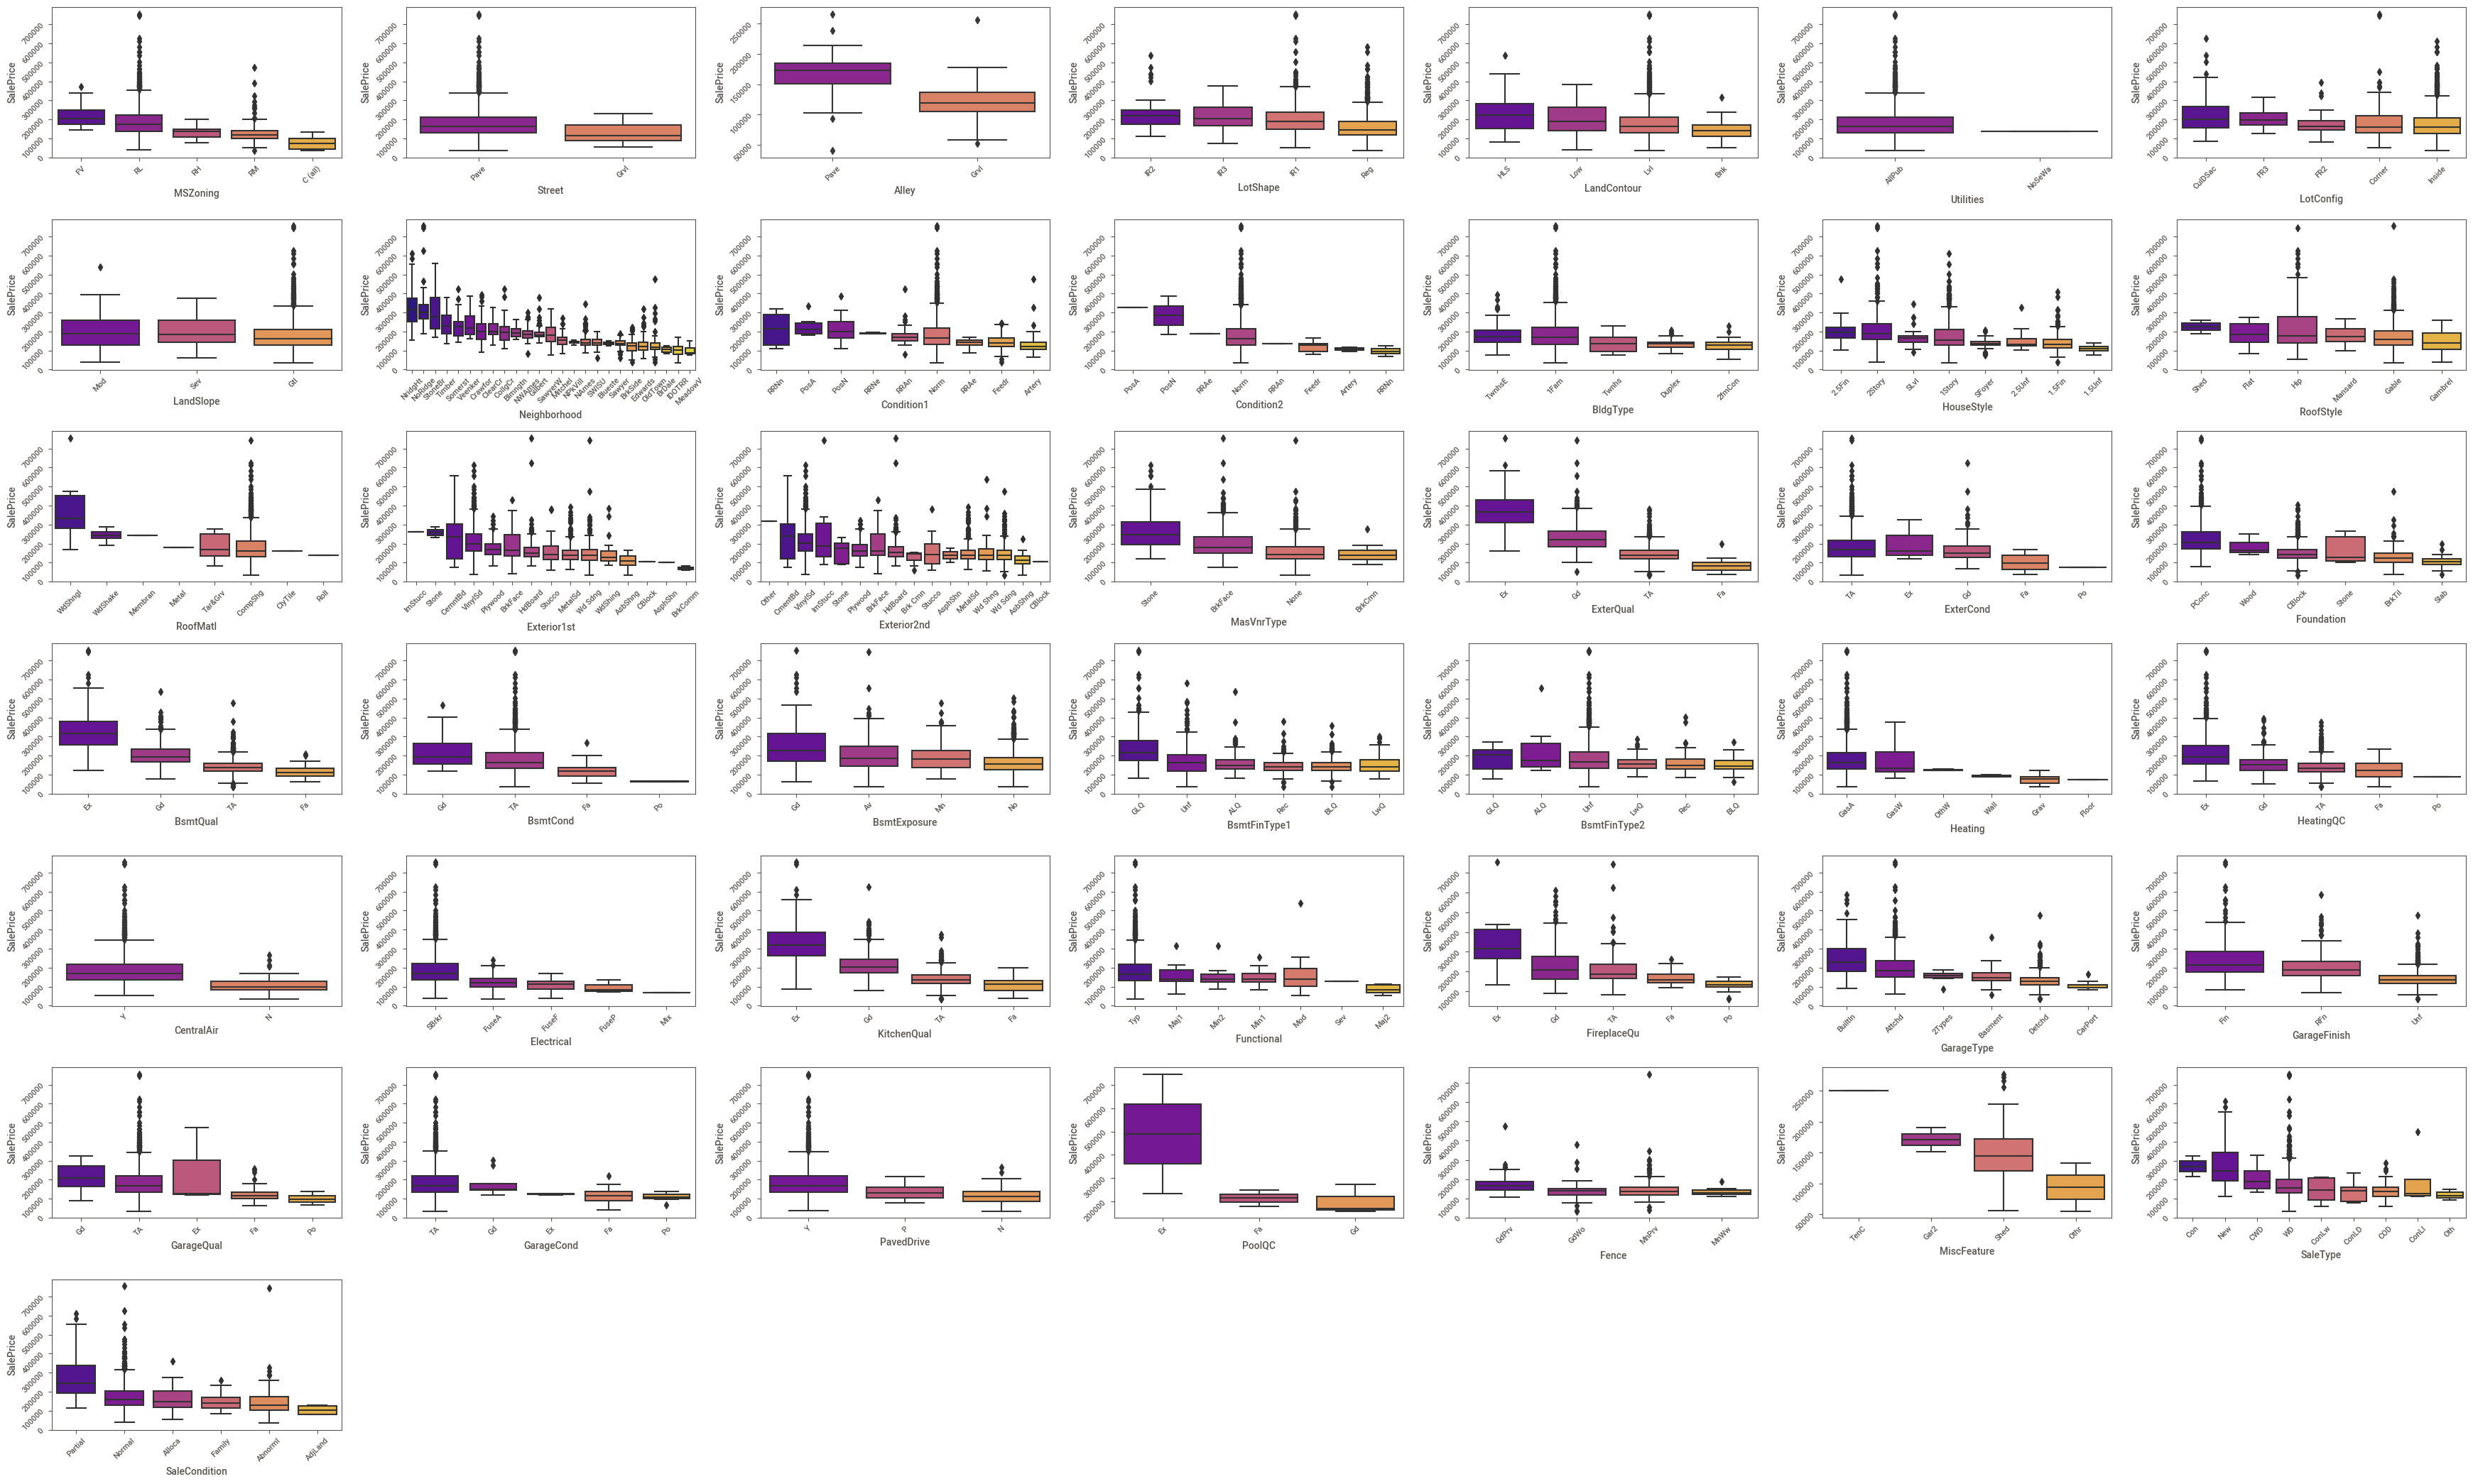

In [12]:
def plot_boxplots_by_features(df, feature, all_features):
  nrows = math.ceil(math.sqrt(len(all_features)))
  ncols = math.ceil((len(all_features)/nrows))

  fig, axes = plt.subplots(nrows, ncols, figsize=(ncols*5, nrows*3))
  axes = axes.flatten()

  pbar = tqdm(zip(all_features, axes), total=len(all_features), desc='Calculating box-plots')

  for i, j in pbar:
    sortd = df.groupby([i])[feature].median().sort_values(ascending=False)
    sns.boxplot(x=i, y=feature, data=df, palette='plasma', order=sortd.index, ax=j)
    j.tick_params(labelrotation=45)
    plt.tight_layout()
    pbar.set_description(f'Calculating box-plot {i} by {feature}')

  # remove unused axes
  for i in tqdm(range(len(all_features), nrows*ncols), total=nrows*ncols - len(all_features), desc='Removing unused axes'):
    fig.delaxes(axes[i])

numerical_features, categorical_features = determine_dtypes(house_df)

plot_boxplots_by_features(house_df, 'SalePrice', categorical_features)

Pay attention for 3 kinds of those features:
* Features that do not so much affect the price of the house, such as ```LotShape```, ```LandContour```, ```BsmtExposure```, etc.   
That is, from now on we can conclude that there is no high correlation between them and the target variable.

* Features that do affect the target variable like ```BsmtQual```, ```KitchenQual```, ```PoolQC```, ```MiscFeature```, etc.

* Features we do not have much information about. Like ```Utilities``` and ```Heating```.

## Correlation

Since we have a lot of features, so to make it more readble, let's take a look only on the highest correlations.  
I assuming higher correlation is greater than 0.6.

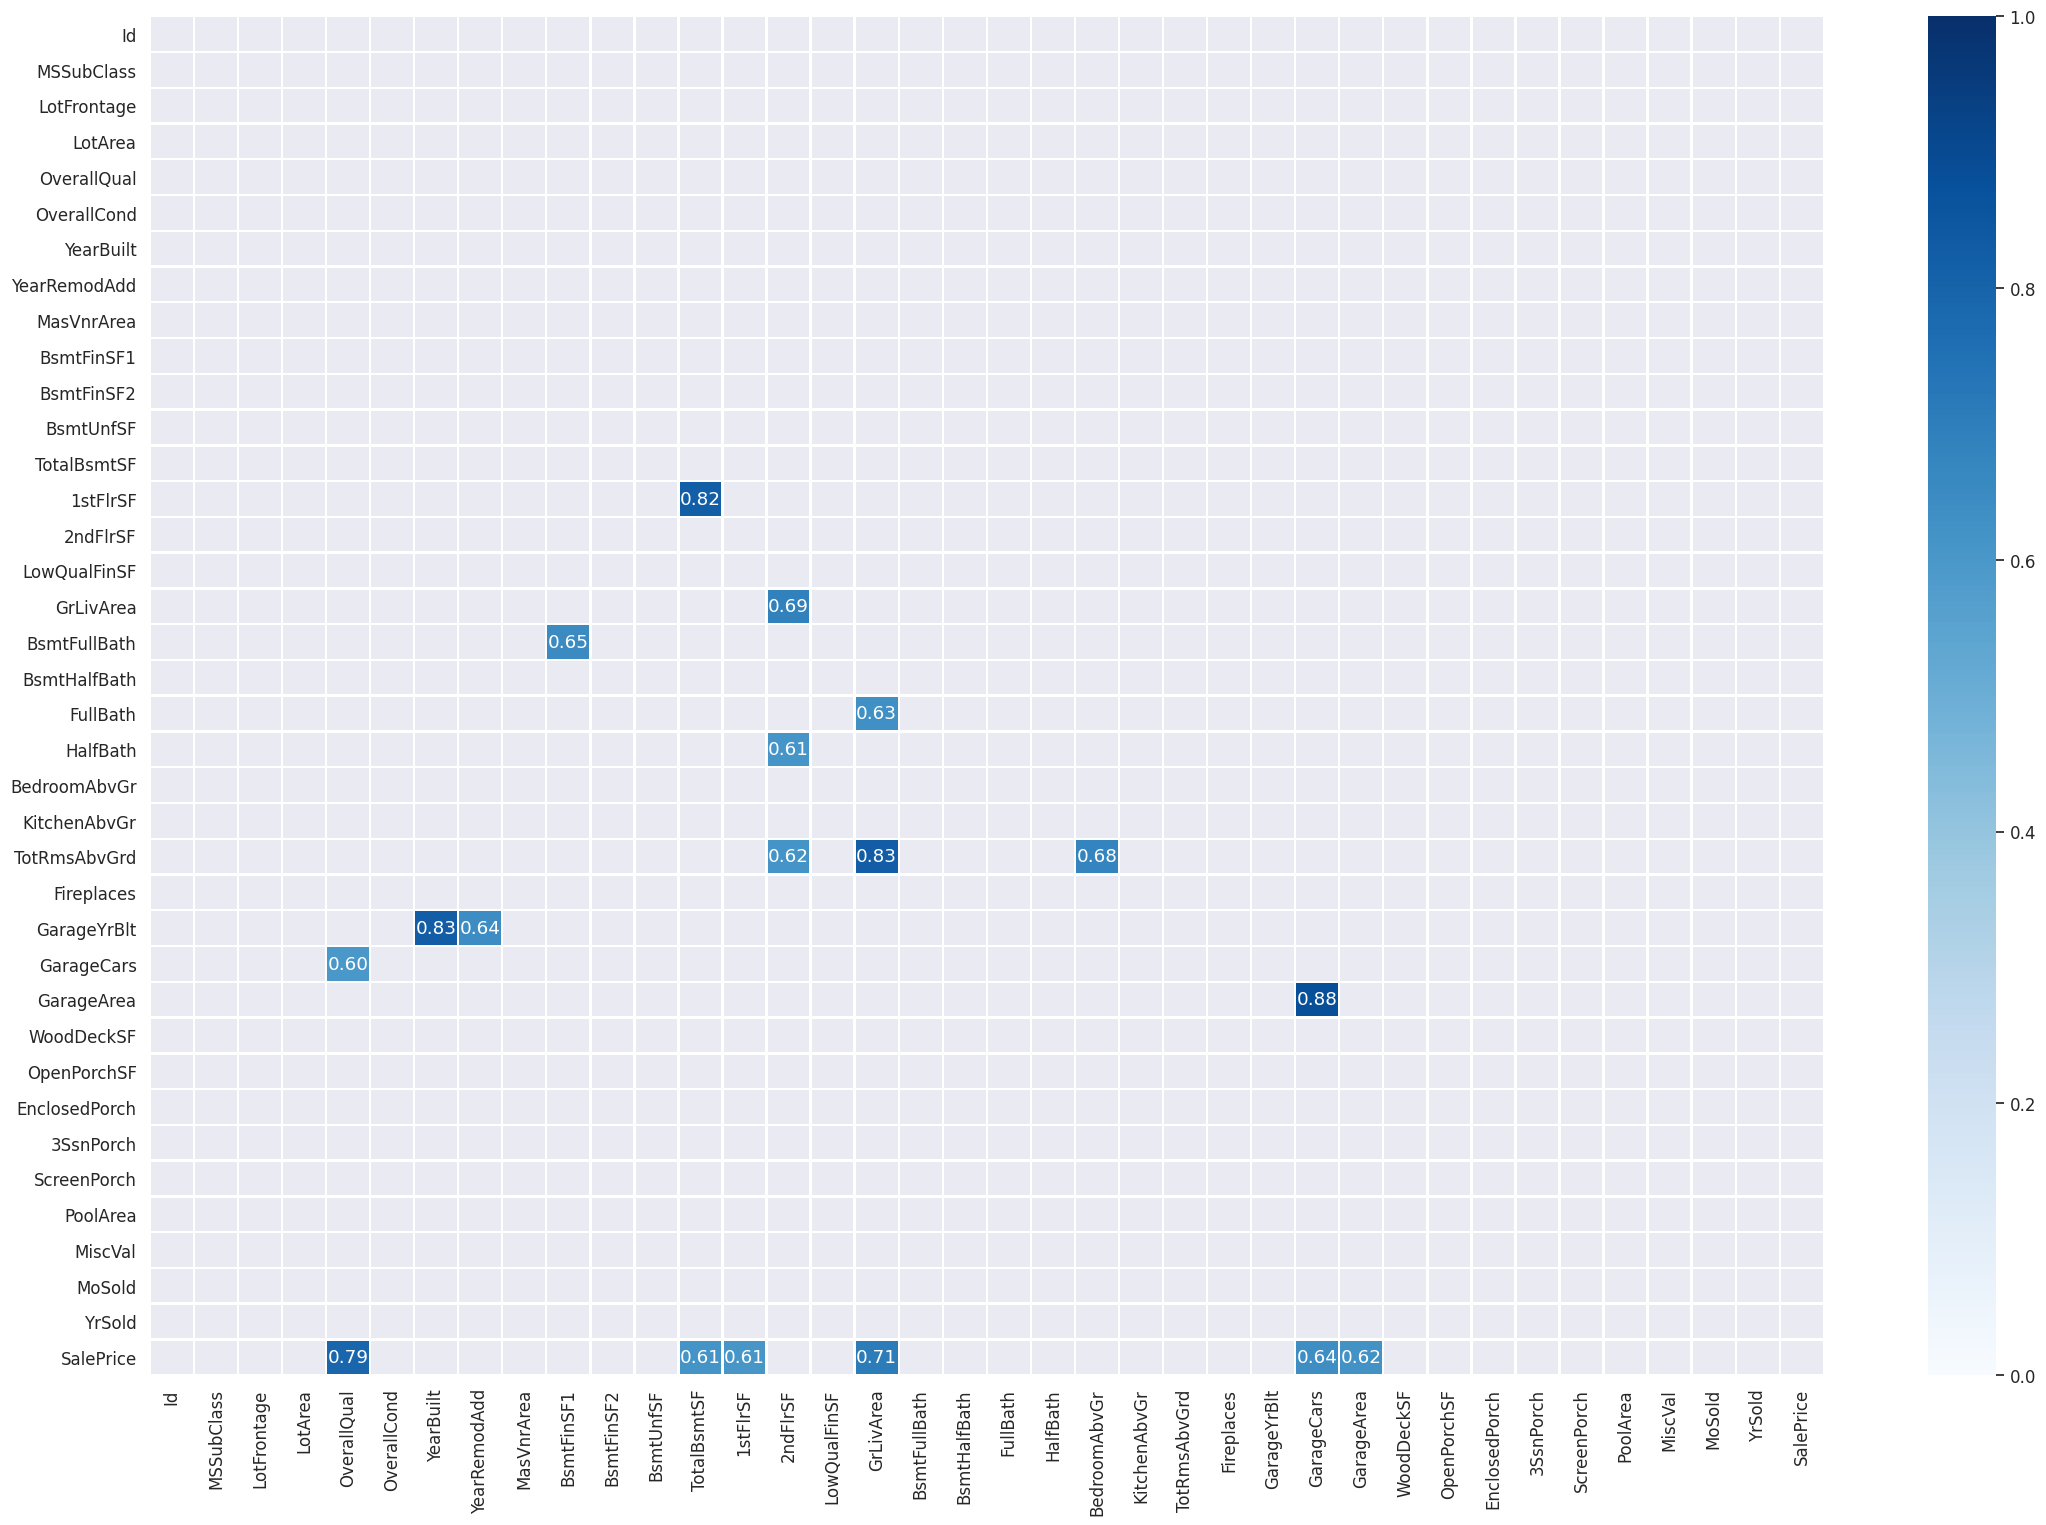

In [13]:
def plot_correlation_greater_than(df, greater_than):
  sns.set(font_scale=1.1)
  corr = np.abs(df.corr())[np.abs(df.corr()) >= greater_than]
  mask = np.triu(corr.corr())
  plt.figure(figsize=(27, 18))
  
  ax = sns.heatmap(corr, annot=True, fmt='.2f', cmap='Blues', square=False, linewidth=1, cbar=True, vmin=0, vmax=1, mask=mask)
  # format x and y labels
  ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=12)
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=12)

  # set the x labels and ticks on top
  # ax.xaxis.tick_top()
  # ax.xaxis.set_label_position('top')
  plt.show()

def plot_correlation_greater_than_by_feature(df, feature, greater_than):
  corr = np.abs(df.corr())[df.corr() > greater_than][feature].dropna().drop(feature).to_frame()
  ax = sns.heatmap(corr, annot=True, fmt='.2f', cmap='Blues', square=False, linewidth=1, cbar=True, vmin=0, vmax=1)
  plt.show()

plot_correlation_greater_than(house_df, 0.6)

As we can see, ```1stFlrSF``` is highly correlated with ```TotalBsmtSF``` (0.82), which it means that probably the first floor and the basement have about the same size.  
```GarageArea``` has highly correlated with```GarageCars``` (0.88), so that means there is no unused area, the larger the area the more cars there are.

```GarageYrBlt``` is highly correlated with ```YearBuilt``` (0.83), which it means the house and the garage are probably built in the same year, so let's take the maximum of there features.

We can also sum up the total bathrooms in the house and the total porches squared feet to one feature.


In [14]:
def change_features_based_on_corr(df):
  df['GarageArea_mul_cars'] = df['GarageArea'] * df['GarageCars']
  df['TotalSF'] = df['BsmtFinSF1'] + df['BsmtFinSF2'] + df['1stFlrSF'] + df['2ndFlrSF']
  df['TotalBathrooms'] = df['FullBath'] + 0.5 * df['HalfBath'] + df['BsmtFullBath'] + 0.5 * df['BsmtHalfBath']
  df['TotalPorchSF'] = df['OpenPorchSF'] + df['3SsnPorch'] + df['EnclosedPorch'] + df['ScreenPorch'] + df['WoodDeckSF']
  df["YearLstCnst"] = df[["YearBuilt", "YearRemodAdd"]].max(axis=1)

  to_drop.extend(['BsmtFinSF1', '1stFlrSF', '2ndFlrSF', 'BsmtFullBath', 'HalfBath', 'FullBath', 'OpenPorchSF', 'EnclosedPorch', 'WoodDeckSF', 'YearRemodAdd', 'YearBuilt'])

The target variable ```SalePrice``` has highly correlated with ```OverallQual```, ```TotalBsmSF```, ```1stFlrSF```, ```GrLivArea```, ```GarageCars``` and ```GarageArea```.  
Let's see the distribution of there features with the target.

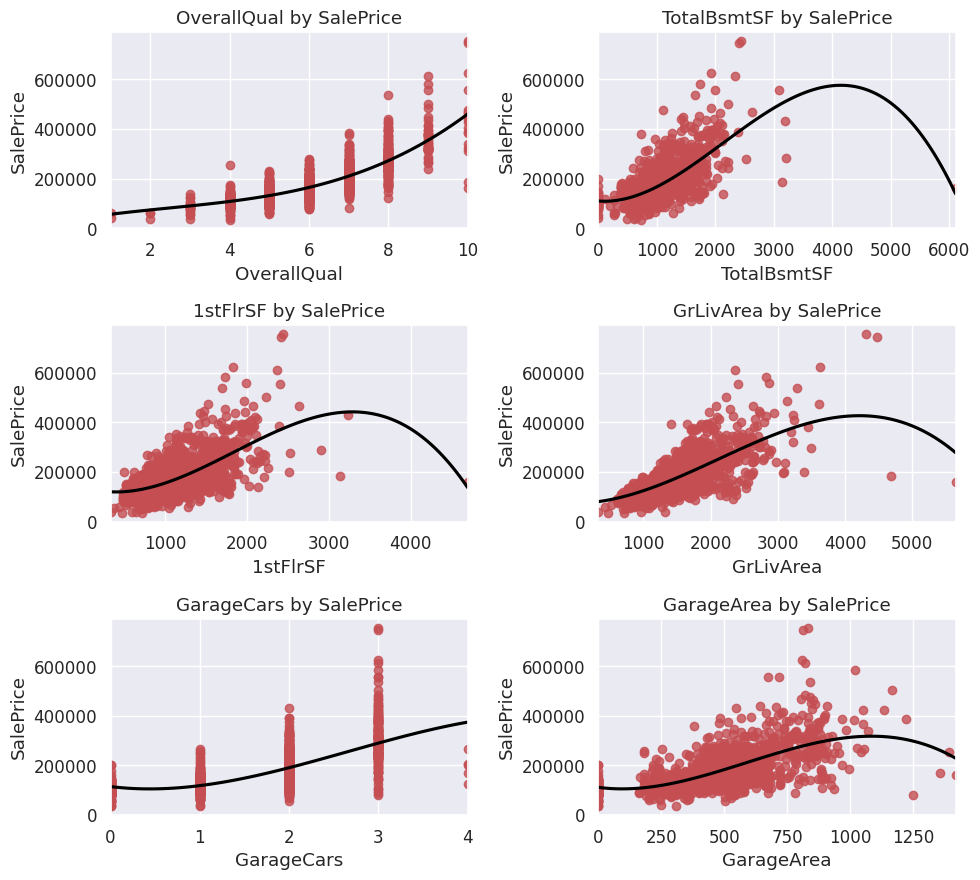

In [15]:
def plot_regplots_high_corr_by_feature(df, feature, high_corr):
  corr = np.abs(df.corr())[np.abs(df.corr()) > high_corr]
  corr_indexes = corr.loc[feature].dropna().drop(feature).index

  nrows = math.ceil(math.sqrt(len(corr_indexes)))
  ncols = math.ceil((len(corr_indexes)/nrows))

  fig, axes = plt.subplots(nrows, ncols, figsize=(ncols*5, nrows*3))
  axes = axes.flatten()

  for i, j in zip(corr_indexes, axes):
    sns.regplot(x=i, y=feature, data=df, ax=j, order=3, ci=None,  color='r',line_kws={'color':'black'})
    j.set_title(f'{i} by {feature}')
  
  # remove unused axes
  for i in range(len(corr_indexes), nrows*ncols):
    fig.delaxes(axes[i])

  plt.tight_layout()
  plt.show()


plot_regplots_high_corr_by_feature(house_df, 'SalePrice', 0.6)

We can see we have some outliers on those features which have high correlation with ```SalePrice```, so we can remove them.

In [16]:
def remove_outliers(df):
  df.drop(df[(df['OverallQual'] < 5) & (df['SalePrice'] > 200000)].index, inplace=True)
  df.drop(df[(df['GrLivArea'] > 4000) & (df['SalePrice'] < 200000)].index, inplace=True)
  df.drop(df[(df['GarageArea'] > 1200) & (df['SalePrice'] < 200000)].index, inplace=True)
  df.drop(df[(df['TotalBsmtSF'] > 3000) & (df['SalePrice'] > 320000)].index, inplace=True)
  df.drop(df[(df['1stFlrSF'] < 3000) & (df['SalePrice'] > 600000)].index, inplace=True)
  df.drop(df[(df['1stFlrSF'] > 3000) & (df['SalePrice'] < 200000)].index, inplace=True)
  df.drop(df[(df['GarageCars'] < 4) & (df['SalePrice'] > 620000)].index, inplace=True)
  df.reset_index(inplace=True, drop=True)

remove_outliers(house_df)

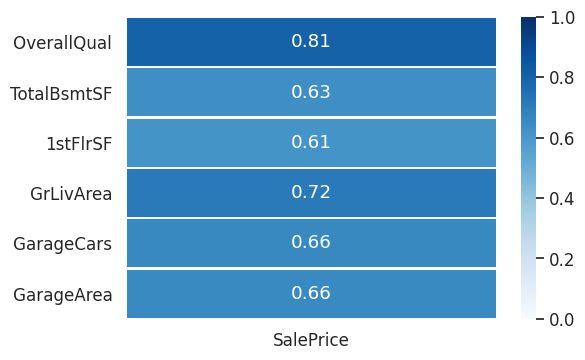

In [17]:
plot_correlation_greater_than_by_feature(house_df, 'SalePrice', 0.6)

We were able to increace a little bit the correlation between ```GarageCars``` and ```GarageArea``` with the target variable.  
So it seems about right to remove those outliers.

# Feature Engineering

## Missing values

NOTE: Although ```train``` and ```test``` are two different data, filling the missing values is **done exactly the same**, so we will do them together in a data called ```all_df```

In [18]:
all_df = pd.concat([house_df, house_df_test], keys=['train', 'test']).drop(columns='SalePrice')
display(all_df)
print(all_df.shape)

Id  MSSubClass MSZoning  ...  YrSold  SaleType SaleCondition
train 0        1          60       RL  ...    2008        WD        Normal
      1        2          20       RL  ...    2007        WD        Normal
      2        3          60       RL  ...    2008        WD        Normal
      3        4          70       RL  ...    2006        WD       Abnorml
      4        5          60       RL  ...    2008        WD        Normal
...          ...         ...      ...  ...     ...       ...           ...
test  1454  2915         160       RM  ...    2006        WD        Normal
      1455  2916         160       RM  ...    2006        WD       Abnorml
      1456  2917          20       RL  ...    2006        WD       Abnorml
      1457  2918          85       RL  ...    2006        WD        Normal
      1458  2919          60       RL  ...    2006        WD        Normal

[2908 rows x 80 columns]

(2908, 80)


We have 2908 samples at all (after removing the outliers).

Now we need to check if we have NaN values.  
there are 3 different kinds of NaN values:  
1. ```''``` - an empty string
2. ```None``` - an empty value of python
3. ```np.NaN``` - a numpy empty value

To do so, since we don't know how look a nan values on this dataset, we would like to change all empty values to ```np.NaN``` value.

In [19]:
def change_NaNs(df):
  df.replace('', np.NaN, inplace=True)
  df.fillna(np.NaN, inplace=True)

change_NaNs(all_df)

Let's see in which features has NaN values at all.

In [20]:
def check_NaNs_values(df):
  all = df.isnull().sum().sort_values(ascending=False)
  count = all[all != 0]
  percent = (count/len(df)) * 100
  dtypes = df.dtypes[count.index]

  return pd.concat([count, percent, dtypes], axis=1, keys=['count', 'percent', 'dtype'])
  # return pd.concat([count, percent], axis=1, keys=['count', 'percent'])

check_NaNs_values(all_df)

count    percent    dtype
PoolQC         2900  99.724897   object
MiscFeature    2804  96.423659   object
Alley          2710  93.191197   object
Fence          2338  80.398900   object
FireplaceQu    1419  48.796424   object
LotFrontage     483  16.609354  float64
GarageCond      159   5.467675   object
GarageQual      159   5.467675   object
GarageYrBlt     159   5.467675  float64
GarageFinish    159   5.467675   object
GarageType      157   5.398900   object
BsmtCond         82   2.819807   object
BsmtExposure     82   2.819807   object
BsmtQual         81   2.785420   object
BsmtFinType2     80   2.751032   object
BsmtFinType1     79   2.716644   object
MasVnrType       24   0.825309   object
MasVnrArea       23   0.790922  float64
MSZoning          4   0.137552   object
BsmtHalfBath      2   0.068776  float64
Utilities         2   0.068776   object
Functional        2   0.068776   object
BsmtFullBath      2   0.068776  float64
BsmtFinSF1        1   0.034388  float64
Exterior1st       1   0.034388   object
Exterior2nd       1   0.034388   object
BsmtFinSF2        1   0.034388  float64
BsmtUnfSF         1   0.034388  float64
TotalBsmtSF       1   0.034388  float64
SaleType          1   0.034388   object
Electrical        1   0.034388   object
KitchenQual       1   0.034388   object
GarageArea        1   0.034388  float64
GarageCars        1   0.034388  float64

### PoolQC

Let's take a look on this pie chart:

In [21]:
def plot_sunburst_with_NaNs(df, col1, col2):
  # col1 has NaN values
  cp = df.copy()
  cp[col1] = cp[col1].apply(lambda x: 'NaN' if x is np.NaN else x) # because sunburst can't work with np.NaN
  # all_df_cp.insert(len(all_df_cp.columns), "count", 1, True)

  fig = px.sunburst(cp, path=[col1, col2], width=500, height=500)
  # fig.update_layout(margin=dict(t=10, l=10, r=10, b=10))
  fig.show()

plot_sunburst_with_NaNs(all_df, 'PoolQC', 'PoolArea')

As we see, on this dataset we have 2900 unkown values on ```PoolQC``` featrue against 2897 with no pool at all (the pool area is zero).  
So, according to ```data_description.txt``` file from kaggel if there are no pool, the value of ```PoolQC``` supposed to be ```NA``` (which it means 'No Pool').  
For the rest 3 values, we will fill them randomly.

Set ```NA``` for correct samples:

In [22]:
all_df.loc[((all_df['PoolQC'].isnull()) & (all_df['PoolArea'] == 0)), 'PoolQC'] = 'NA'

Those smapels we need to fill randomly.

In [23]:
display(all_df[['PoolQC', 'PoolArea']][all_df['PoolQC'].isnull()])

PoolQC  PoolArea
test 960     NaN       368
     1043    NaN       444
     1139    NaN       561

Pay attention those 3 samples are from the test set, so it won't change the evaluation.

Define two methods who fill NaNs values, the first one fill from specific column, the second one fill from specific list.

In [24]:
def fill_na_random_pick_column_distribution(df, column_name):
    df_not_null = df[~df[column_name].isnull()]
    df[column_name] = df[column_name].apply(lambda x: np.random.choice(df_not_null[column_name]) if pd.isnull(x) else x)

def fill_na_random_from_list(df, column_name, fill_from):
  df[column_name] = df[column_name].apply(lambda x: np.random.choice(fill_from) if pd.isnull(x) else x)

options = ['Ex', 'Fa', 'Gd']
fill_na_random_from_list(all_df, 'PoolQC', options)

Now we don't have NaN values in this feature.

In [25]:
# fig = px.sunburst(all_df, path=['PoolQC', 'PoolArea'])
# fig.update_layout(margin=dict(t=10, l=10, r=10, b=10))
# fig.show()
# print(all_df['PoolQC'].isnull().any())

plot_sunburst_with_NaNs(all_df, 'PoolQC', 'PoolArea')
print(all_df['PoolQC'].isnull().any())

False


### MiscFeature

Let's take a look on this pie chart:

In [26]:
plot_sunburst_with_NaNs(all_df, 'MiscFeature', 'MiscVal')

As we see, on this dataset we have 2814 unkown values on ```MiscFeature``` featrue against 2813 with no value at all (the misc values is zero).  
So, according to ```data_description.txt``` file from kaggel if there are no misc value, the value of ```MiscFeature``` supposed to be ```NA``` (which it means 'None').  
For the rest 1 value, we will fill it randomly.

Set ```NA``` for correct samples:

In [27]:
all_df.loc[((all_df['MiscFeature'].isnull()) & (all_df['MiscVal'] == 0)), 'MiscFeature'] = 'NA'

This smaple we need to fill randomly.

In [28]:
display(all_df[['MiscFeature', 'MiscVal']][all_df['MiscFeature'].isnull()])

MiscFeature  MiscVal
test 1089         NaN    17000

Pay attention those 3 samples are from the test set, so it won't change the evaluation.

In [29]:
options = ['Elev', 'Gar2', 'Othr', 'Shed', 'TenC']
fill_na_random_from_list(all_df, 'MiscFeature', options)

Now we don't have NaN values in this feature.

In [30]:
plot_sunburst_with_NaNs(all_df, 'MiscFeature', 'MiscVal')
print(all_df['MiscFeature'].isnull().any())

False


### Alley

According to ```data_description.txt``` file from kaggel if there are no ```Alley``` value, the value of ```Alley``` supposed to be ```NA``` (which it means no alley access at all).  
So let's fill all the NaN values by  ```NA```.  

In [31]:
all_df['Alley'] = all_df['Alley'].fillna('NA')

### Fence

According to ```data_description.txt``` file from kaggel if there are no ```Fence``` value, the value of ```Fence``` supposed to be ```NA``` (which it means no fence at all).  
So let's fill all the NaN values by  ```NA```.  

In [32]:
all_df['Fence'] = all_df['Fence'].fillna('NA')

### FireplaceQu

According to ```data_description.txt``` file from kaggel if there are no ```FireplaceQu``` value, the value of ```FireplaceQu``` supposed to be ```NA``` (which it means no fireplace at all).  
So let's fill all the NaN values by  ```NA```.  

In [33]:
all_df['FireplaceQu'] = all_df['FireplaceQu'].fillna('NA')

### LotFrontage

Since the area of each street connected to the house property, most likely have a similar area to other houses in its neighborhood.  
Let's fill in missing values by the **median LotFrontage of the neighborhood.**

In [34]:
#Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
all_df["LotFrontage"] = all_df.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

### GarageType, GarageFinish, GarageQual and GarageCond

According to ```data_description.txt``` file from kaggel if there are no values in ```GarageType```, ```GarageFinish```, ```GarageQual``` and ```GarageCond```, the values of thos features supposed to be ```NA``` (which it means no garage at all).  
So let's fill all the NaN values by  ```NA```.  

In [35]:
for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    all_df[col] = all_df[col].fillna('NA')

### GarageYrBlt, GarageArea and GarageCars

Since there are no garage when the value ```GarageType``` is ```NA```, its mean no cars in such garage.  
So let's fill all the NaN values by  ```0```. 


In [36]:
for col in ['GarageYrBlt', 'GarageArea', 'GarageCars']:
    all_df[col] = all_df[col].fillna(0)

### BsmtExposure, BsmtCond, BsmtQual ,BsmtFinType2 and BsmtFinType1

According to ```data_description.txt``` file from kaggel if there are no values in ```BsmtExposure```, ```BsmtCond```, ```BsmtQual```, ```BsmtFinType2``` and ```BsmtFinType1``` the values of thos features supposed to be ```NA``` (which it means no basemant at all).  
So let's fill all the NaN values by  ```NA```.  

In [37]:
for col in ['BsmtExposure', 'BsmtCond', 'BsmtQual', 'BsmtFinType2', 'BsmtFinType1']:
    all_df[col] = all_df[col].fillna('NA')

### BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath and BsmtHalfBath

Since are no values in ```BsmtExposure```, ```BsmtCond```, ```BsmtQual```, ```BsmtFinType2``` or ```BsmtFinType1``` it means there are no basement at all.  
So let's fill all the NaN values by  ```0```. 


In [38]:
for col in ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath']:
    all_df[col] = all_df[col].fillna(0)

### MasVnrArea and MasVnrType

According to ```data_description.txt``` file from kaggel if there are no values in ```MasVnrArea``` the values of this feature supposed to be ```None``` (which it means no Masonry veneer type at all).  
So let's fill all the NaN values in ```MasVnrArea``` by  ```None```, and all the NaN values in ```MasVnrArea``` by ```0```.  

In [39]:
all_df['MasVnrType'] = all_df['MasVnrType'].fillna('None')
all_df['MasVnrArea'] = all_df['MasVnrArea'].fillna(0)

### MSZoning, Functional, Electrical, Exterior1st, Exterior2nd, KitchenQual and SaleType

For all these features there are between 1 and 2 NaN values, and there is no instruction in the ```data_description.txt``` file.  
So let's fill them randomly.

In [40]:
for col in ['MSZoning', 'Functional', 'Electrical', 'Exterior1st', 'Exterior2nd', 'KitchenQual', 'SaleType']:
  fill_na_random_pick_column_distribution(all_df, col)

### Utilities

Let's take a look on this pie chart:

In [41]:
def create_pie_chart_of_count(df, column_name):
    df_not_null = df[~df[column_name].isnull()]
    fig = px.pie(df_not_null.groupby([column_name]).size().reset_index(name='count'), names=column_name, values='count', 
                 width=400, height=400)
    fig.show()

create_pie_chart_of_count(all_df, 'Utilities')

We can see there is only one values with ```NoSeWa``` and the rest is ```AllPub```.   
The only one ```NoSeWa``` is from ```house_df``` (the train set):

In [42]:
create_pie_chart_of_count(house_df, 'Utilities')

So, we can understand that since the house with ```NoSeWa``` is on the train set, **this feature won't help us to predict the target**.  
So let's remove it.

In [43]:
all_df.drop(labels='Utilities', axis=1, inplace=True)

Now we don't have missing values at all. (Except the ```SalePrice``` from the train set)

In [44]:
check_NaNs_values(all_df)

Empty DataFrame
Columns: [count, percent, dtype]
Index: []

Now we don't have missing values at all!

## Prepare the Data and Create New Features

In [45]:
print(all_df.isnull().sum().sum())
print(all_df.shape)

0
(2908, 79)


Let's create more features based on different approaches.

Create a boolean features which ```1``` is availble ```and``` 0 is not.

In [46]:
def create_boolean_features(df):
  df['HasPool'] = df['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
  df['Has2ndFloor'] = df['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
  df['HasGarage'] = df['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
  df['HasBsmt'] = df['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
  df['HasFireplace'] = df['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

  to_drop.extend(['Fireplaces'])

Convert some numerical features that actually categorical .

In [47]:
def set_as_categorical(df):
  df['MSSubClass'] = df['MSSubClass'].apply(str)
  df['OverallCond'] = df['OverallCond'].astype(str)
  df['YrSold'] = df['YrSold'].astype(str)
  df['MoSold'] = df['MoSold'].astype(str)

Create features based on sum of quality and conditions.

In [48]:
def features_based_on_quality_and_conditions(df):
  df['TotalExtQual'] = (df['ExterQual'] + df['ExterCond'])
  df['TotalBsmQual'] = df['BsmtQual'] + df['BsmtCond']
  df['TotalGrgQual'] = df['GarageQual'] + df['GarageCond']
  df['TotalQual'] = df['OverallQual'] + df['TotalExtQual'] + df['TotalBsmQual'] + df['TotalGrgQual'] + df['KitchenQual'] + df['HeatingQC']

  ordinal_features.extend(['TotalExtQual', 'TotalBsmQual', 'TotalGrgQual', 'TotalQual'])
  to_drop.extend(['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 
                  'GarageQual', 'GarageCond', 'KitchenQual', 'HeatingQC'])

Let's split back the data and remove the unneunnecessary variable ```Id```.

In [49]:
house_df_train_not_null = all_df.loc['train'].copy().join(house_df['SalePrice'])
house_df_test_not_null = all_df.loc['test'].copy()

id_train = house_df['Id']
id_test = house_df_test['Id']

house_df_train_not_null.drop(columns='Id', inplace=True)
house_df_test_not_null.drop(columns='Id', inplace=True)

Convert the ordinal features:

In [50]:
def ordinal_encode(df, ord_features):
  oe = OrdinalEncoder(dtype=np.int64)
  oe_df = pd.DataFrame(oe.fit_transform(df.loc[:, ord_features]), columns=ord_features)
  return pd.concat([df.drop(columns=ord_features), oe_df], axis=1)

house_df_train_not_null = ordinal_encode(house_df_train_not_null, ordinal_features)
house_df_test_not_null = ordinal_encode(house_df_test_not_null, ordinal_features)

In [51]:
print(house_df_train_not_null.isnull().sum().sum())
print(house_df_train_not_null.shape)
print('\n')
print(house_df_test_not_null.isnull().sum().sum())
print(house_df_test_not_null.shape)

0
(1449, 79)


0
(1459, 78)


So let's execute all our preparing:

In [52]:
def feature_engineering(df):
  change_features_based_on_corr(df)
  create_boolean_features(df)
  set_as_categorical(df)
  features_based_on_quality_and_conditions(df)

  df.drop(columns=to_drop, inplace=True)

feature_engineering(house_df_train_not_null)
feature_engineering(house_df_test_not_null)

In [53]:
print(house_df_train_not_null.isnull().sum().sum())
print(house_df_train_not_null.shape)
print('\n')
print(house_df_test_not_null.isnull().sum().sum())
print(house_df_test_not_null.shape)

0
(1449, 49)


0
(1459, 48)


# Modeling

Let's start to build our model.

In [54]:
X = house_df_train_not_null.drop(columns='SalePrice')
t = house_df_train_not_null['SalePrice']

# encode a given dataframe
def encode(df):
  numerical_cols, categorical_cols = determine_dtypes(df)

  ct_enc_std = ColumnTransformer([
            ("encoding", OrdinalEncoder(), categorical_cols),
            ("standard", StandardScaler(), numerical_cols)])

  df_encoded = pd.DataFrame(ct_enc_std.fit_transform(df))
  return df_encoded

In [55]:
print(X.isnull().sum().sum())
print(X.shape)

0
(1449, 48)


Define a method that calculate the CV. (A bit changed from Aviad's notebook)

In [56]:
def get_cv_score_and_loss(X, t, model_name, model, k=None, show_score_loss_graphs=False, use_pbar=True):
    scores_losses_df = pd.DataFrame(columns=['fold_id', 'split', 'score', 'loss'])

    if k is not None:
        cv = KFold(n_splits=k, shuffle=True, random_state=1)
    else:
        raise ValueError('you need to specify k in order for the cv to work')

    if use_pbar:
        pbar = tqdm(desc=f'Computing Model {model_name}', total=cv.get_n_splits(X))

    for i, (train_ids, val_ids) in enumerate(cv.split(X)):
        X_train = X.iloc[train_ids]
        t_train = t.iloc[train_ids]
        X_val = X.iloc[val_ids]
        t_val = t.iloc[val_ids]

        model.fit(X_train, t_train)

        y_train = model.predict(X_train)
        y_val = model.predict(X_val)
        scores_losses_df.loc[len(scores_losses_df)] = [i, 'train', model.score(X_train, t_train), mean_squared_error(t_train, y_train, squared=False)]
        scores_losses_df.loc[len(scores_losses_df)] = [i, 'val', model.score(X_val, t_val), mean_squared_error(t_val, y_val, squared=False)]

        if use_pbar:
            pbar.update()

    if use_pbar:
        pbar.close()

    val_scores_losses_df = scores_losses_df[scores_losses_df['split']=='val']
    train_scores_losses_df = scores_losses_df[scores_losses_df['split']=='train']

    mean_val_score = val_scores_losses_df['score'].mean()
    mean_val_loss = val_scores_losses_df['loss'].mean()
    mean_train_score = train_scores_losses_df['score'].mean()
    mean_train_loss = train_scores_losses_df['loss'].mean()


    fig_score = px.line(scores_losses_df, x='fold_id', y='score', color='split', title=f'Model name: {model_name}, Mean Val Score: {mean_val_score:.2f}, Mean Train Score: {mean_train_score:.2f}')
    fig_loss = px.line(scores_losses_df, x='fold_id', y='loss', color='split', title=f'Model name: {model_name}, Mean Val Loss: {mean_val_loss:.2f}, Mean Train Loss: {mean_train_loss:.2f}')
    if show_score_loss_graphs:
        fig_loss.show()
        fig_score.show()

    return mean_val_score, mean_val_loss, mean_train_score, mean_train_loss, fig_score, fig_loss

## Pick an Estimator

Let's begin with find the best algorithm for our data.

In [57]:
# all models
hp_models = {
             'SGD Regressor': SGDRegressor(random_state=1, ), 
             'LinearRegression': LinearRegression(), 
             'Ridge': make_pipeline(RobustScaler(), Ridge()), 
             'Lasso': make_pipeline(RobustScaler(), Lasso(random_state=1)), 
             'Elastic Net': make_pipeline(RobustScaler(), ElasticNet(random_state=1, alpha=0.05)),
             'Gradient Boosting Regressor': GradientBoostingRegressor(n_estimators=100, learning_rate=0.05,
                                                                       max_depth=4, max_features='sqrt',
                                                                       min_samples_leaf=15, min_samples_split=10, 
                                                                       loss='huber', random_state =5)
             }

In [58]:
%%time
def get_models_score_and_loss(X, t, models, numerical_cols, categorical_cols):
  # a DataFrame to save results
  results = pd.DataFrame(columns=['mean val score', 'mean val loss', 'mean train score', 'mean train loss', 'fig_score', 'fig_loss'], 
                         index=hp_models.keys())

  pbar = tqdm(models.items(), total=len(models.keys()))

  for model_name, model in pbar:
    pbar.set_description(f'Calculating model {model_name}')
    preprocessor = ColumnTransformer([
                                      ("onehot", OneHotEncoder(sparse=False, handle_unknown='ignore'), categorical_cols),
                                      ("standard", StandardScaler(), numerical_cols)
    ])
    pipe = make_pipeline(preprocessor, model)

    val_score, val_loss, train_score, train_loss , fig_score, fig_loss = get_cv_score_and_loss(X, t, model_name, pipe, k=10, 
                                                                                               show_score_loss_graphs=False, use_pbar=False)
    results.loc[model_name] = [val_score, val_loss, train_score, train_loss, fig_score, fig_loss]
    
  return results

numerical_features, categorical_features = determine_dtypes(X)

res = get_models_score_and_loss(X, t, hp_models, numerical_features, categorical_features)


  0%|          | 0/6 [00:00<?, ?it/s]

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 195894588955.5289, tolerance: 704529210.9405098

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 194727189382.7591, tolerance: 698200780.974271

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 182319050872.43262, tolerance: 722691351.2660913

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 198032427043.66953, tolerance: 720561941.

CPU times: user 20.3 s, sys: 9.67 s, total: 29.9 s
Wall time: 19.5 s


These warnings are because we have reached the maximum number of iterations in ElasticNet model.

In [59]:
# show all results
display(res.iloc[:, :-2])

# show the graphs for the best one of val score
res.iloc[np.argmax(res['mean val score'])]['fig_score'].show()
res.iloc[np.argmax(res['mean val score'])]['fig_loss'].show()

mean val score  ... mean train loss
SGD Regressor                     0.897045  ...         21368.8
LinearRegression              -5.86465e+20  ...         20555.8
Ridge                             0.895622  ...         20600.6
Lasso                             0.891558  ...         20555.4
Elastic Net                       0.895702  ...         21965.9
Gradient Boosting Regressor       0.886081  ...           20950

[6 rows x 4 columns]

Pick from the table the best model (Relative to ```mean score val```).

In [60]:
best_model = hp_models[res.iloc[np.argmax(res['mean val score'])].to_frame().columns[0]]

best_model_name = res.iloc[np.argmax(res['mean val score'])].name

print(best_model_name)
print(best_model)

SGD Regressor
SGDRegressor(random_state=1)


As we can see the best result we got with ```SGDRegressor``` algorithm.  
So we will keep use it.

## Polynomial Degree

Let's see if we can get better results by increasing the degree.

In [61]:
%%time
# show graph of score and loss by plynomial degree of numerical features
def show_degree_graphs_cv_train(X, t, model_name, model, k=None, p=None, max_degree=10):
    numerical_cols, categorical_cols = determine_dtypes(X)
    
    val_train_score_loss_df = pd.DataFrame(columns=['degree', 'split', 'score', 'loss'])
    for i in tqdm(range(1, max_degree), desc='Poly Degree'):
        ct_enc_std_poly = ColumnTransformer([
            ("encoding", OneHotEncoder(sparse=False, handle_unknown='ignore'), categorical_cols),
            ("standard_poly", make_pipeline(PolynomialFeatures(degree=i), StandardScaler()), numerical_cols)])
        model_pipe = make_pipeline(ct_enc_std_poly, model)
        val_score, val_loss, train_score, train_loss , fig_score, fig_loss = get_cv_score_and_loss(X, t, model_name, model_pipe, k=k, show_score_loss_graphs=False, use_pbar=False)
        val_train_score_loss_df.loc[len(val_train_score_loss_df)] = [i, 'train', train_score, train_loss]
        val_train_score_loss_df.loc[len(val_train_score_loss_df)] = [i, 'cv', val_score, val_loss]

    fig = px.line(val_train_score_loss_df, x='degree', y='score', color='split')
    fig.show()
    fig = px.line(val_train_score_loss_df, x='degree', y='loss', color='split')
    fig.show()


show_degree_graphs_cv_train(X, t, best_model_name, best_model, k=10 ,max_degree=5)

Poly Degree:   0%|          | 0/4 [00:00<?, ?it/s]

CPU times: user 2min 15s, sys: 11.9 s, total: 2min 27s
Wall time: 2min 14s


Since we a lot of features, make them squared and even more caused a **dimensional explosion** and it's really bad for our data.  
So it's absolutely clear that we will stay with ```degree=1```.

## Feature Selection

We want to choose the best features of our data to get best results of prediction.  
We'll use ```RFE``` method from ```sklearn``` package that actually use **Backward Feature Selection** algorithm (i.e we start from the full feature set and remove features until we reach the number of minimum features or until we reach the best score).

So let's define a method who calculate a best number of features to select, and shows the appropriate graph.

In [62]:
%%time
def feature_selection(X, t, model_name, model):
  X_encoded = encode(X)

  results_df = pd.DataFrame(columns=['num_of_features', 'mean_val_score', 'mean_val_loss', 'mean_train_score', 'mean_train_loss', 'best_features'])
  
  pbar = tqdm(range(10, len(X_encoded.columns) + 1), total=len(X_encoded.columns)+1 - 10)
  for i in pbar:
    pbar.set_description(f'Calculating for {i} features')
    selector = RFE(model, n_features_to_select=i).fit(X_encoded, t)
    mean_val_score, mean_val_loss, mean_train_score, mean_train_loss, fig_score, fig_loss = get_cv_score_and_loss(X_encoded, t, model_name, selector, k=10, use_pbar=False)
    if mean_val_score < 0:
      break
    results_df.loc[len(results_df)] = [i, mean_val_score, mean_val_loss, mean_train_score, mean_train_loss, selector.support_]

  fig = go.Figure()
  fig.add_trace(go.Scatter(x=results_df['num_of_features'], y=results_df['mean_val_score']))
  fig.update_xaxes(title_text='Number of features selected')
  fig.update_yaxes(title_text='Cross validation score')
  fig.show()

  return results_df


results_scores = feature_selection(X, t, best_model_name, best_model)


  0%|          | 0/39 [00:00<?, ?it/s]

CPU times: user 6min, sys: 18.2 s, total: 6min 19s
Wall time: 6min


The algorithm founds that after 25 features we reach a negative score, so we stopped it.

In [63]:
display(results_scores.iloc[:, :-1])

num_of_features  mean_val_score  ...  mean_train_score  mean_train_loss
0               10        0.826357  ...          0.844086     29229.566804
1               11        0.832617  ...          0.847218     28933.202312
2               12        0.838027  ...          0.851121     28562.936267
3               13        0.835651  ...          0.850764     28600.750388
4               14        0.835944  ...          0.852460     28444.421842
5               15        0.840224  ...          0.856411     28060.909335
6               16        0.845123  ...          0.859312     27765.826535
7               17        0.847931  ...          0.861256     27571.268038
8               18        0.849462  ...          0.862047     27491.980521
9               19        0.849468  ...          0.862249     27472.457520
10              20        0.850597  ...          0.863715     27332.970699
11              21        0.850588  ...          0.863819     27321.911045
12              22        0.851243  ...          0.864669     27234.622058
13              23        0.848497  ...          0.862314     27437.713895
14              24        0.850405  ...          0.862779     27397.306397
15              25        0.848779  ...          0.861692     27491.718861

[16 rows x 5 columns]

Let's determine the best features and score ```RFE``` found.

In [64]:
best_features = results_scores.iloc[np.argmax(results_scores['mean_val_score'])]['best_features']
num_of_best_features = results_scores.iloc[np.argmax(results_scores['mean_val_score'])]['num_of_features']
best_score = results_scores['mean_val_score'].max()

X_best_features = X.loc[:, best_features]

print(f'There are {num_of_best_features} features that gives {best_score} score value.')
print('So our data now looks like:')
display(X_best_features)

There are 22 features that gives 0.8512427611044828 score value.
So our data now looks like:


MSZoning  LotFrontage LotConfig  ... HasGarage HasFireplace TotalQual
0          RL         65.0    Inside  ...         1            0        30
1          RL         80.0       FR2  ...         1            1        31
2          RL         68.0    Inside  ...         1            1        30
3          RL         60.0    Corner  ...         1            1        32
4          RL         84.0       FR2  ...         1            1        31
...       ...          ...       ...  ...       ...          ...       ...
1444       RL         62.0    Inside  ...         1            1        31
1445       RL         85.0    Inside  ...         1            1        35
1446       RL         66.0    Inside  ...         1            1        25
1447       RL         68.0    Inside  ...         1            0        33
1448       RL         75.0    Inside  ...         1            0        33

[1449 rows x 22 columns]

## Hyper-parameter Analysis

So let's try to change some of the hyper-parameters of our best model (which is ```SGRRegressor```).

### Learning Rate

In [65]:
# %%time
def learning_rate_selection(X, t):
  min_learning_rate = 0.0001
  max_learning_rate = 0.1
  delta = 0.0001

  X_encoded = encode(X)

  results_df = pd.DataFrame(columns=['learning_rate', 'mean_val_score', 'mean_val_loss', 'mean_train_score', 'mean_train_loss'])
  
  pbar = tqdm(np.arange(min_learning_rate, max_learning_rate+delta, delta), total=max_learning_rate // min_learning_rate)
  for i in pbar:
    pbar.set_description(f'Calculating for learning rate {i}')
    model = SGDRegressor(random_state=1, eta0=i, learning_rate="constant").fit(X_encoded, t)

    mean_val_score, mean_val_loss, mean_train_score, mean_train_loss, fig_score, fig_loss = get_cv_score_and_loss(X_encoded, t, 'SGDRegression', model, k=10, use_pbar=False)
    if mean_val_score < 0:
      break
    results_df.loc[len(results_df)] = [i, mean_val_score, mean_val_loss, mean_train_score, mean_train_loss]

  fig = go.Figure()
  fig.add_trace(go.Scatter(x=results_df['learning_rate'], y=results_df['mean_val_score']))
  fig.update_xaxes(title_text='Learning Rate')
  fig.update_yaxes(title_text='Cross validation score (no. of correct classifications)')
  fig.show()

  return results_df


results_learning_rate = learning_rate_selection(X_best_features, t)

  0%|          | 0/1000.0 [00:00<?, ?it/s]

The algorithm founds that in learning rate of 0.0044 we reach a negative score, and probably we're down in the score, so we stopped it.

In [66]:
display(results_learning_rate)

learning_rate  mean_val_score  ...  mean_train_score  mean_train_loss
0          0.0001        0.813720  ...          0.828234     30692.487868
1          0.0002        0.817657  ...          0.833359     30229.063909
2          0.0003        0.812259  ...          0.830484     30463.207477
3          0.0004        0.823965  ...          0.835950     29988.700039
4          0.0005        0.824851  ...          0.834913     30085.214735
5          0.0006        0.825055  ...          0.836442     29939.827272
6          0.0007        0.824558  ...          0.835930     29978.846060
7          0.0008        0.823482  ...          0.835001     30050.110857
8          0.0009        0.821911  ...          0.833740     30144.532696
9          0.0010        0.822155  ...          0.836103     29914.645831
10         0.0011        0.817803  ...          0.832409     30223.628076
11         0.0012        0.828278  ...          0.838827     29703.400884
12         0.0013        0.828214  ...          0.839950     29586.540535
13         0.0014        0.826166  ...          0.837061     29843.507414
14         0.0015        0.824743  ...          0.835682     29950.921955
15         0.0016        0.808390  ...          0.816611     31415.209172
16         0.0017        0.786440  ...          0.798700     32838.471132
17         0.0018        0.805558  ...          0.812477     31691.170018
18         0.0019        0.818546  ...          0.825318     30777.225811
19         0.0020        0.816362  ...          0.823135     30941.880648
20         0.0021        0.814920  ...          0.820389     31265.726477
21         0.0022        0.782068  ...          0.781975     33811.722281
22         0.0023        0.784726  ...          0.785655     33477.294888
23         0.0024        0.785314  ...          0.803282     32543.737839
24         0.0025        0.771843  ...          0.791823     33461.813368
25         0.0026        0.786833  ...          0.797784     32938.974293
26         0.0027        0.781436  ...          0.792034     33361.142028
27         0.0028        0.775533  ...          0.785693     33819.927952
28         0.0029        0.799005  ...          0.804307     32538.531528
29         0.0030        0.794137  ...          0.798491     32971.261921
30         0.0031        0.788817  ...          0.792089     33437.734130
31         0.0032        0.783044  ...          0.785093     33936.758978
32         0.0033        0.761371  ...          0.756661     35660.746229
33         0.0034        0.720245  ...          0.720706     38099.031171
34         0.0035        0.638053  ...          0.654774     42538.811266
35         0.0036        0.646523  ...          0.671641     41459.963631
36         0.0037        0.653708  ...          0.683058     40490.493075
37         0.0038        0.643066  ...          0.670700     41045.173947
38         0.0039        0.588176  ...          0.610785     44484.546126
39         0.0040        0.555313  ...          0.581316     45881.227963
40         0.0041        0.510933  ...          0.541878     47633.357289
41         0.0042        0.290966  ...          0.351786     56204.703421
42         0.0043        0.306009  ...          0.372171     54277.006505
43         0.0044        0.089284  ...          0.181032     60871.441403

[44 rows x 5 columns]

Let's determine the best learning rate and score.

In [67]:
best_learning_rate = results_learning_rate.iloc[np.argmax(results_learning_rate['mean_val_score'])]['learning_rate']
best_score_learning_rate = results_learning_rate['mean_val_score'].max()

print(f'The best learning rate is {best_learning_rate} and gained {best_score_learning_rate} of score.')

The best learning rate is 0.0012000000000000001 and gained 0.8282776298789323 of score.


### Max Iterations

Because until now every time we run the model and did not pass the maximum number of iterations (we would get an warning then), we can conclude that **there is no effect** on the result on this hyper-parameter. So we'll keep use the default max iterations which is 1000.

### Regularization Term

In [68]:
%%time
def alpha_selection(X, t):
  min_alpha = 0.001
  max_alpha = 0.1
  delta = 0.001

  X_encoded = encode(X)

  results_df = pd.DataFrame(columns=['alpha', 'mean_val_score', 'mean_val_loss', 'mean_train_score', 'mean_train_loss'])
  
  pbar = tqdm(np.arange(min_alpha, max_alpha+delta, delta), total=max_alpha // min_alpha)
  for i in pbar:
    pbar.set_description(f'Calculating for alpha {i}')
    model = SGDRegressor(random_state=1, eta0=best_learning_rate, learning_rate='constant', alpha=i).fit(X_encoded, t)
    mean_val_score, mean_val_loss, mean_train_score, mean_train_loss, fig_score, fig_loss = get_cv_score_and_loss(X_encoded, t, 'SGDRegression', model, k=10, use_pbar=False)
    if mean_val_score < 0:
      break
    results_df.loc[len(results_df)] = [i, mean_val_score, mean_val_loss, mean_train_score, mean_train_loss]

  fig = go.Figure()
  fig.add_trace(go.Scatter(x=results_df['alpha'], y=results_df['mean_val_score']))
  fig.update_xaxes(title_text='Alphas')
  fig.update_yaxes(title_text='Cross validation score (no. of correct classifications)')
  fig.show()

  return results_df


results_alpha = alpha_selection(X_best_features, t)

  0%|          | 0/100.0 [00:00<?, ?it/s]

CPU times: user 58.1 s, sys: 38.6 s, total: 1min 36s
Wall time: 54.3 s


In [69]:
display(results_alpha)

alpha  mean_val_score  mean_val_loss  mean_train_score  mean_train_loss
0   0.001        0.828368   29699.189134          0.838905     29696.192919
1   0.002        0.828462   29691.485817          0.838986     29688.755010
2   0.003        0.828549   29684.327987          0.839061     29681.881451
3   0.004        0.830863   29535.219886          0.841677     29439.459762
4   0.005        0.830904   29531.154496          0.841715     29435.842030
..    ...             ...            ...               ...              ...
95  0.096        0.837243   29200.872169          0.844650     29194.120603
96  0.097        0.837220   29203.465424          0.844615     29197.443174
97  0.098        0.837197   29206.071701          0.844580     29200.776814
98  0.099        0.837174   29208.690922          0.844545     29204.121419
99  0.100        0.837150   29211.323009          0.844509     29207.476889

[100 rows x 5 columns]

In [70]:
best_alpha = results_alpha.iloc[np.argmax(results_alpha['mean_val_score'])]['alpha']
best_score_alpha = results_alpha['mean_val_score'].max()

print(f'The best alpha is {best_alpha} and gained {best_score_alpha} of score.')

The best alpha is 0.09 and gained 0.8373791832261418 of score.


# Prediction

Let's take a look on our final model.

In [71]:
numerical_cols, categorical_cols = determine_dtypes(X_best_features)

final_model = SGDRegressor(random_state=1, eta0=best_learning_rate, learning_rate='constant', alpha=best_alpha)

preprocessor = ColumnTransformer([
                                  ("encoding", OrdinalEncoder(), categorical_cols),
                                  ("standard", StandardScaler(), numerical_cols)
])
pipe = make_pipeline(preprocessor, final_model)
set_config(display='diagram')
display(pipe)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('encoding', OrdinalEncoder(),
                                                  Index(['MSZoning', 'LotConfig', 'Exterior1st', 'Exterior2nd', 'Foundation',
       'GarageType', 'SaleType', 'SaleCondition', 'OverallCond'],
      dtype='object')),
                                                 ('standard', StandardScaler(),
                                                  Index(['LotFrontage', 'BsmtUnfSF', 'GrLivArea', 'OverallQual', 'GarageCars',
       'GarageArea_mul_cars', 'TotalSF', 'TotalPorchSF', 'YearLstCnst',
       'Has2ndFloor', 'HasGarage', 'HasFireplace', 'TotalQual'],
      dtype='object'))])),
                ('sgdregressor',
                 SGDRegressor(alpha=0.09, eta0=0.0012000000000000001,
                              learning_rate='constant', random_state=1))])

In [72]:
pipe.fit(X_best_features, t)
house_df_test_best_features = house_df_test_not_null.loc[:, best_features]
preds = pipe.predict(house_df_test_best_features)

submission = pd.DataFrame({'Id': id_test, 'SalePrice': preds})
submission.to_csv('my_submision.csv', index=False)

# Summary

So in this copatition we were able to predict house prices in Ames, Iowa.
We dealt with a lot of different features, some are relevant and somne are not,
we researched the data and saw, we also applied common sense what can affect the price and what can not - and accordingly we droped features.  
This was the big problem in my opinion - to know which features can best predict the prices.  

We have seen that using the Linear Regression model gives very poor results on this data so we did not even try to change its parameters.
In addition, in the Elastic Net model, we received a warning that we had reached the maximum number of iterations (by deafult ```max_iter = 1000```) - so we did not use it either.

Finally we choosed SGD Regressor because it got the highest score value, and we changed its parameters accordingly.

# References

* [How to concat dataframes](https://www.datacamp.com/community/tutorials/joining-dataframes-pandas?utm_source=adwords_ppc&utm_campaignid=898687156&utm_adgroupid=48947256715&utm_device=c&utm_keyword=&utm_matchtype=b&utm_network=g&utm_adpostion=&utm_creative=332602034352&utm_targetid=aud-299261629574:dsa-429603003980&utm_loc_interest_ms=&utm_loc_physical_ms=1007998&gclid=Cj0KCQiAtqL-BRC0ARIsAF4K3WHHa3BX_kMfhRUKv9wX0h5rRSxxEdoRhI5ezqAjayPtGXRdZ2Mf0QAaAiLIEALw_wcB)

* [Pipeline representation as diagram](https://scikit-learn.org/stable/auto_examples/compose/plot_column_transformer_mixed_types.html#html-representation-of-pipeline)

* [More about ```set_config``` method from ```sklearn``` package](https://scikit-learn.org/stable/modules/generated/sklearn.set_config.html#sklearn.set_config)

* [More information about ElasticNet model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)

* [Learn more about RobustScalar()](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html)

In [ ]:
# convert to html file
%%shell
jupyter nbconvert --to html '/content/HW2_ML_Nisan_Dalva.ipynb'